In [1]:
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
import matplotlib.axes as axe
import pandas as pd
import datetime as dt
import gurobipy as gp
from gurobipy import GRB
import cvxpy as cp

import random
from itertools import chain, combinations, tee
import time



# Budget vs Discount - Theory

## 1 Eligible group, 0 Ineligible group (Theory)

In [2]:
def F_01(val, ell, tau, alpha):
    return ell(val) + (1 - alpha) * tau - ell(1 - val)

def y_star_01(ell, tau, alpha, lb_init = 0.0, ub_init = 1.0, num_iters = 20):
    # Searches for y^\star satisfying ell(y^\star) + (1 - \alpha) \tau = ell(1 - y^\star)
    assert tau < ell(ub_init) - ell(lb_init), "We must have tau < ell(1.0) - ell(0.0), else is trivial"
    assert 0.0 <= alpha <= 1.0, "We must have 0.0 <= alpha <= 1.0"
    assert ell(lb_init) + (1.0 - alpha) * tau < ell(ub_init)
    
    lb = lb_init
    ub = ub_init
    mid_val = (lb + ub)/2
    
    for k in range(num_iters):
#         print("F:", F_01(mid_val, ell, tau, alpha))
#         print("lb:", lb)
#         print("ub:", ub)
#         print("mid_val:", mid_val)
#         print()
        
        if F_01(mid_val, ell, tau, alpha) < 0:
            lb = mid_val
        else:
            ub = mid_val
        mid_val = (lb + ub)/2
    
    return (lb + ub)/2

# def fixed_point_eqn():
    


In [3]:
t_1 = time.time()

ell = lambda x: x**4
# ell = lambda x: np.log(1 + np.exp(x))

tau = 0.6
# alpha = 0.0

num_alphas = 100 # Should be even
alpha_vals = np.linspace(0, 1.0, num = num_alphas + 1)

alpha_1 = y_star_01(ell, tau, alpha = 0.0, lb_init = 0.0, ub_init = 1.0)
# print("alpha_1:", alpha_1)

y_star_vals_discount = np.array([y_star_01(ell, tau, alpha, lb_init = 0.0, ub_init = 1.0) for alpha in alpha_vals])
y_star_vals_budget = np.ones(int((y_star_vals_discount.shape[0] - 1) / 2)) * alpha_1
index_min = min([k for k in list(range(num_alphas)) if alpha_vals[k] >= alpha_1])
# print("index_min:", index_min)
# print("alpha_vals[index_min]:", alpha_vals[index_min])
# print("y_star_vals_budget:", y_star_vals_budget)
# print()

for k in range(y_star_vals_budget.shape[0]):
    if k >= index_min:
        y_star_vals_budget[k] = alpha_vals[k]

print()
# print("y_star_vals_budget:", y_star_vals_budget)

y_star_vals_budget = np.concatenate((y_star_vals_budget, \
                                      np.ones(int((y_star_vals_discount.shape[0] - 1) / 2 + 1)) * 0.5))
# print("y_star_vals_budget:", y_star_vals_budget)


t_2 = time.time()
print("Time:", t_2 - t_1)


Time: 0.004250049591064453


In [4]:
print("alpha_1:", alpha_1)

alpha_2_index = max([k for k in range(len(y_star_vals_discount)) if y_star_vals_discount[k] > alpha_vals[k]])
alpha_2 = (y_star_vals_discount[alpha_2_index] + y_star_vals_discount[alpha_2_index+1])/2

print("alpha_2:", alpha_2)

plt.rcParams['text.usetex'] = True
# plt.rcParams['text.usetex'] = False

alpha_1: 0.1198124885559082
alpha_2: 0.15593242645263672


Text(0, 0.5, '$\\displaystyle y^C, y^D$')

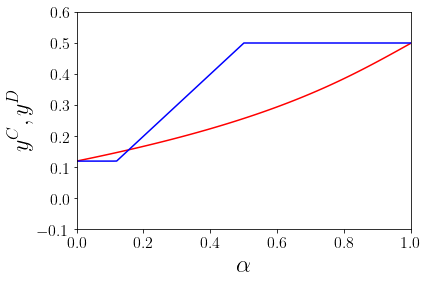

In [5]:
plt.plot(alpha_vals, y_star_vals_discount, 'red')
plt.plot(alpha_vals, y_star_vals_budget, 'blue')
plt.xlim([0, 1])
plt.ylim([-0.1, 0.6])

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel(r'$\displaystyle \alpha$', fontsize=24)
plt.ylabel(r'$\displaystyle y^C, y^D$', fontsize=24)
# plt.ylabel(r'$\displaystyle \ln(L^t - L^\star)$', fontsize=16)

## 1 Eligible group, 1 Ineligible group (Theory)

In [ ]:
def F_11(val, ell, tau, alpha):
    return ell(val) + (1 - alpha) * tau - ell(2 - val)

def y_star_11(ell, tau, alpha, lb_init = 0.0, ub_init = 2.0, num_iters = 20):
    # Searches for y^\star satisfying ell(y^\star) + (1 - \alpha) \tau = ell(2 - y^\star)
    
    assert tau < ell(ub_init) - ell(lb_init), "We must have tau < ell(2.0) - ell(0.0), else is trivial."
    assert 0.0 <= alpha <= 1.0, "We must have 0.0 <= alpha <= 1.0"
    assert ell(lb_init) + (1.0 - alpha) * tau < ell(ub_init)
    
    lb = lb_init
    ub = ub_init
    mid_val = (lb + ub)/2
    
    for k in range(num_iters):
#         print("F:", F_11(mid_val, ell, tau, alpha))
#         print("lb:", lb)
#         print("ub:", ub)
#         print("mid_val:", mid_val)
#         print()
        
        if F_11(mid_val, ell, tau, alpha) < 0:
            lb = mid_val
        else:
            ub = mid_val
        mid_val = (lb + ub)/2
    
    return (lb + ub)/2

# def fixed_point_eqn():
    


In [ ]:
t_1 = time.time()

ell = lambda x: x**2 / 4
# ell = lambda x: np.log(1 + np.exp(x))
# alpha = 0.0

# Case 1: 
tau = 0.4
v_E = 1
v_I = 1.25

# # Case 2: 
# tau = 0.7
# v_E = 1
# v_I = 1.25

# # Case 3: 
# tau = 0.7
# v_E = 1
# v_I = 2.5

num_alphas = 200 # Should be even
alpha_vals = np.linspace(0, 1.0, num = num_alphas + 1)

y_star_zero = y_star_11(ell, tau, alpha = 0.0, lb_init = 0.0, ub_init = 2.0)
# print("y_star_zero:", y_star_zero)

y_star_vals = np.array([y_star_11(ell, tau, alpha, lb_init = 0.0, ub_init = 2.0) for alpha in alpha_vals])
y_star_vals_budget = alpha_vals
index_max = max([k for k in list(range(num_alphas)) if alpha_vals[k] <= 1 - v_E/v_I])
# print("index_min:", index_min)
# print("alpha_vals[index_min]:", alpha_vals[index_min])
# print("y_star_vals_budget:", y_star_vals_budget)
# print()

# print("y_star_vals:", y_star_vals)
# print()

y_star_vals_discount = np.copy(y_star_vals)
for k in range(y_star_vals_discount.shape[0]):
    if k <= index_max:
        y_star_vals_discount[k] = 0.0

tau_thresh_for_alpha_3 = 2 * v_E * (ell(1) - ell(1 - 1E-6)) / 1E-6
index_for_alpha_3 = max([k for k in list(range(num_alphas)) if y_star_vals[k] >= alpha_vals[k] ])
alpha_3 = (y_star_vals[index_for_alpha_3] + y_star_vals[index_for_alpha_3 + 1])/2

# print("y_star_vals_budget:", y_star_vals_budget)

# print("y_star_vals_budget:", y_star_vals_budget)


t_2 = time.time()
print("Time:", t_2 - t_1)

In [ ]:
print("1 - v^E / v^I:", 1 - v_E/v_I)
print("alpha_3:", alpha_3)

In [ ]:
plt.plot(alpha_vals, y_star_vals_discount, 'red')
plt.plot(alpha_vals, y_star_vals_budget, 'blue')
# plt.scatter(alpha_vals, y_star_vals_discount, marker = 'o', s = 0.5, color = 'purple')
# plt.scatter(alpha_vals, y_star_vals_budget, marker = 'o', s = 0.5, color = 'black')
plt.xlim([0, 1.0])
plt.ylim([-0.2, 1.2])

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel(r'$\displaystyle \alpha$', fontsize=24)
plt.ylabel(r'$\displaystyle y^C, y^D$', fontsize=24)
# plt.ylabel(r'$\displaystyle \ln(L^t - L^\star)$', fontsize=16)

# Sensitivity Analysis - 1 Eligible group, 1 Ineligible group

In [6]:
def _extract_solution_discount_b1(m):
    """
    Get solution from optimization model
    """
    users_in = [v.x for v in m.getVars() if v.VarName.find("ineligible_val") != -1]
    users_el = [v.x for v in m.getVars() if v.VarName.find("eligible_allocation") != -1]
    edge_flows = [v.x for v in m.getVars() if v.VarName.find("edge_flows") != -1]
    
    users_in = np.reshape(users_in, (3, T))
    users_el = np.reshape(users_el, (3, T))
    edge_flows = np.reshape(edge_flows, (2, T))

    solution = {
        "users_in": users_in,
        "users_el": users_el,
        "edge_flows": edge_flows
    }
    
    return solution

In [7]:
def _extract_solution_discount_d1(m):
    """
    Get solution from optimization model
    """
    users_in = [v.x for v in m.getVars() if v.VarName.find("ineligible_val") != -1]
    users_el = [v.x for v in m.getVars() if v.VarName.find("eligible_allocation") != -1]
    edge_flows = [v.x for v in m.getVars() if v.VarName.find("edge_flows") != -1]
    
    users_in = np.reshape(users_in, (2, T))
    users_el = np.reshape(users_el, (2, T))
    edge_flows = np.reshape(edge_flows, (2, T))

    solution = {
        "users_in": users_in,
        "users_el": users_el,
        "edge_flows": edge_flows
    }
    
    return solution

In [8]:
def avg_travel_times_1(solution_set, theta):
    
    users_in = solution_set["users_in"]
    users_el = solution_set["users_el"]
    edge_flows = solution_set["edge_flows"]
    
    avg_travel_time_in = sum( users_in[j, t] * (theta[j,0] + edge_flows[j, t] * theta[j,1]) for j in range(2) for t in range(T)) / T
    avg_travel_time_el = sum( users_el[j, t] * (theta[j,0] + edge_flows[j, t] * theta[j,1]) for j in range(2) for t in range(T)) / T
    avg_travel_time_all = sum( edge_flows[j, t] * (theta[j,0] + edge_flows[j, t] * theta[j,1]) for j in range(2) for t in range(T)) / (T*2)
    
    avg_travel_times = {
        "users_in": avg_travel_time_in,
        "users_el": avg_travel_time_el,
        "users_all": avg_travel_time_all
    }
    
    return avg_travel_times

# def percentage_users()


In [11]:
# Using \ell(x) = x**2 / 4.

def m_d1_solve(T, toll, vot_ineligible_vals, vot_eligible, discount_ratio, beta = 0.0, in_vot_perturb = 0.0):
#     a_1 = theta[0, 0]
#     b_1 = theta[0, 1]
#     a_2 = theta[1, 0]
#     b_2 = theta[1, 1]

    if type(vot_ineligible_vals) is float:
        vot_ineligible_vals = vot_ineligible_vals * np.ones(T)
    
    # Initialize model
    m_d1 = gp.Model()

    users_in = m_d1.addVars(2, T, name = 'ineligible_val', lb = -10000.0, ub = 10000.0)
    users_el = m_d1.addVars(2, T, name = 'eligible_allocation', lb = -10000.0, ub = 10000.0)
    edge_flows = m_d1.addVars(2, T, name = 'edge_flows', lb = -10000.0, ub = 10000.0)
    
#     vot_ineligible_vals = vot_ineligible + in_vot_perturb * np.random.uniform(-1.0, 1.0, T)

    ## Add constraints to Model 

    # Total edge flow, express and general purpose lanes:
    m_d1.addConstrs((edge_flows[j, t] == users_in[j, t] + users_el[j, t] for j in range(2) for t in range(T)))

    # Non-negativity of flows, and zero flow for "eligible users in ineligible groups":
    m_d1.addConstrs((users_in[j, t]>=0 for j in range(2) for t in range(T)))
    m_d1.addConstrs((users_el[j, t]>=0 for j in range(2) for t in range(T)))

    # Every eligible and ineligible user is assigned to one of three options: \
    # (express paying, express with credit, non-express)
    m_d1.addConstrs((sum(users_in[j, t] for j in range(2)) == 1 + beta for t in range(T)))
    m_d1.addConstrs((sum(users_el[j, t] for j in range(2)) == 1 for t in range(T)))

    ## To edit below:
    # Set Objective
    m_d1.setObjective(sum( (edge_flows[0, t]**2)/4 + (edge_flows[1, t]**2)/4 
                        + toll*users_in[0,t]/vot_ineligible_vals[t]
                        + (1 - discount_ratio)*toll*users_el[0,t]/vot_eligible 
        for t in range(T)), GRB.MINIMIZE)
    
    m_d1.update()

    m_d1.optimize()
    
    solution_set_d1 = _extract_solution_discount_d1(m_d1)

    return solution_set_d1

In [12]:
# Using \ell(x) = x**2 / 4.

def m_b1_solve(T, toll, vot_ineligible_vals, vot_eligible, budget, beta = 0.0, in_vot_perturb = 0.0):
#     a_1 = theta[0, 0]
#     b_1 = theta[0, 1]
#     a_2 = theta[1, 0]
#     b_2 = theta[1, 1]

    if type(vot_ineligible_vals) is float:
        vot_ineligible_vals = vot_ineligible_vals * np.ones(T)
    
    
    # Initialize model
    m_b1 = gp.Model()

    users_in = m_b1.addVars(3, T, name = 'ineligible_val', lb = -10000.0, ub = 10000.0)
    users_el = m_b1.addVars(3, T, name = 'eligible_allocation', lb = -10000.0, ub = 10000.0)
    edge_flows = m_b1.addVars(2, T, name = 'edge_flows', lb = -10000.0, ub = 10000.0)

#     vot_ineligible_vals = vot_ineligible + in_vot_perturb * np.random.uniform(-1.0, 1.0, T)
#     print("vot_ineligible_vals:\n", vot_ineligible_vals)
#     print()
    
    ## Add constraints to Model 

    # Total edge flow, express and general purpose lanes:
    m_b1.addConstrs((edge_flows[0, t] == users_in[0, t] + users_el[0, t] + users_in[1, t] + users_el[1, t] for t in range(T)))
    m_b1.addConstrs((edge_flows[1, t] == users_in[2, t] + users_el[2, t] for t in range(T)))

    # Non-negativity of flows, and zero flow for "eligible users in ineligible groups":
    m_b1.addConstrs((users_in[j, t] >= 0 for j in range(3) for t in range(T)))
    m_b1.addConstrs((users_el[j, t] >= 0 for j in range(3) for t in range(T)))
    m_b1.addConstrs((users_in[0, t] == 0 for t in range(T)))
    
    # Budget constraint satisfaction:
    if toll != 0:
        m_b1.addConstr((sum(toll * users_el[0, t] for t in range(T)) <= budget))
    m_b1.addConstrs((users_in[0, t] == 0 for t in range(T)))

    # Every eligible and ineligible user is assigned to one of three options: \
    # (express paying, express with credit, non-express)
    m_b1.addConstrs((sum(users_in[j, t] for j in range(3)) == 1 + beta for t in range(T)))
    m_b1.addConstrs((sum(users_el[j, t] for j in range(3)) == 1 for t in range(T)))

    ## To edit below:
    # Set Objective
    m_b1.setObjective(sum( (edge_flows[0, t]**2)/4 + (edge_flows[1, t]**2)/4 
                        + toll * users_in[1,t]/vot_ineligible_vals[t]
                        + toll * users_el[1,t]/vot_eligible
        for t in range(T)), GRB.MINIMIZE)
    
    m_b1.update()
    m_b1.optimize()
    
    solution_set_b1 = _extract_solution_discount_b1(m_b1)

    return solution_set_b1

## Sensitivity 1, w.r.t. Ineligible Users' VoT:

In [13]:
num_in_VoT_perturb = 6
in_VoT_perturb_magnitude = 0.1
in_VoT_perturb_vals = in_VoT_perturb_magnitude * np.arange(num_in_VoT_perturb)
in_VoT_perturb_vals

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5])

In [77]:
time_1 = time.time()

# \ell(x) = x**4 / 16

T = 5
toll = 0.4
num_alphas = 100 # Should be even
alpha_vals = np.linspace(0, 1.0, num = num_alphas + 1)
# num_betas = 5
# beta_vals = np.linspace(-0.5, 0.0, num = num_betas + 1)

vot_eligible = 1.0

vot_ineligible_base = 1.25
in_vot_incr = 0.25
num_vots_ineligible_avg = 4
vots_ineligible_avg = vot_ineligible_base + in_vot_incr * np.arange(num_vots_ineligible_avg)
in_vot_perturb = 0.1

solution_set_array_at_toll_d1 = []
solution_set_array_at_toll_b1 = []
users_el_d1 = np.zeros((num_alphas + 1, num_vots_ineligible_avg))
users_in_d1 = np.zeros((num_alphas + 1, num_vots_ineligible_avg))
users_el_b1 = np.zeros((num_alphas + 1, num_vots_ineligible_avg))
users_in_b1 = np.zeros((num_alphas + 1, num_vots_ineligible_avg))

for vot_idx, vot_ineligible_val in enumerate(vots_ineligible_avg):
    
    vot_ineligible_vals = vot_ineligible_val + in_vot_perturb * np.random.uniform(-1.0, 1.0, T)
    
    for alpha_idx, alpha in enumerate(alpha_vals):
        
        ### EDIT BELOW:

# for in_VoT_perturb in [0.5]:
#     for alpha in [0.5]:
    
        print()
        print("alpha:", alpha)
        print("vot_ineligible_val:", vot_ineligible_val)
        print()
    
        solution_set_d1 = m_d1_solve(T, toll, vot_ineligible_vals, vot_eligible, alpha)
        solution_set_b1 = m_b1_solve(T, toll, vot_ineligible_vals, vot_eligible, alpha * toll * T)

        # To edit:
        users_el_d1[alpha_idx][vot_idx] = np.mean(solution_set_d1["users_el"][0, :])
        users_el_b1[alpha_idx][vot_idx] = np.mean(solution_set_b1["users_el"][0, :]) \
                                            + np.mean(solution_set_b1["users_el"][1, :])
        
    #     users_in_d1.append(solution_set_d1["users_in"][0][0])
    #     users_in_b1.append(solution_set_b1["users_in"][0][0] + solution_set_b1["users_in"][1][0])
        solution_set_array_at_toll_d1.append(solution_set_d1)
        solution_set_array_at_toll_b1.append(solution_set_b1)

time_2 = time.time()
print("Time: ", time_2 - time_1)



alpha: 0.0
vot_ineligible_val: 1.25

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x65166a8d
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dua

   1   2.16608867e+01 -5.17006740e+06  7.12e+00 3.61e-01  1.30e+05     0s
   2   4.31208237e+00 -1.19629861e+04  7.12e-06 3.61e-07  2.99e+02     0s
   3   4.31063329e+00 -1.10702151e+01  2.03e-09 1.04e-10  3.85e-01     0s
   4   4.01842918e+00  3.42640197e+00  2.73e-11 1.82e-12  1.48e-02     0s
   5   3.95133477e+00  3.86265590e+00  3.64e-12 1.67e-16  2.22e-03     0s
   6   3.88782441e+00  3.88623630e+00  1.82e-12 9.09e-13  3.97e-05     0s
   7   3.88764178e+00  3.88764017e+00  0.00e+00 9.09e-13  4.07e-08     0s
   8   3.88764160e+00  3.88764157e+00  1.82e-12 9.09e-13  4.07e-11     0s

Barrier solved model in 8 iterations and 0.04 seconds (0.00 work units)
Optimal objective 3.88764160e+00

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0x257fc

  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [8e-02, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.64739030e+06 -1.80555331e+08  7.43e+03 3.24e+02  3.50e+06     0s
   1   4.41182213e+01 -3.74575320e+06  7.35e+00 4.56e-01  6.18e+04     0s
   2   4.31611142e+00 -4.97035162e+03  5.88e-06 4.56e-07  8.16e+01     0s
   3   4.30745533e+00 -7.82182208e+00  8.04e-09 6.24e-10  1.99e-01     0s
   4   3.93362296e+00  3.60570797e+00  2.27e-13 9.09e-13  5.38e-03     0s
   5   3.84676159e+00  3.80383992e+00  2.27e-13 

   7   3.78527138e+00  3.78522694e+00  2.27e-13 9.09e-13  7.29e-07     0s
   8   3.78526160e+00  3.78526157e+00  2.27e-13 9.09e-13  7.30e-10     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.78526160e+00


alpha: 0.07
vot_ineligible_val: 1.25

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0xea0fb496
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.14761717e+07 -1.68078724e+08  8.79e+03 4.65e+02  4.70e+06     0s
   1   2.27023461e+01 -5.33000872e+06  7.29e+00 3.86e-01  1.34e+05     0s
   2   4.24211777e+00 -1.21774890e+04  7.29e-06 3.86e-07  3.05e+02     0s
   3   4.24079479e+00 -1.11408744e+01  1.92e-09 1.02e-10  3.85e-01     0s
   4   3.97378738e+00  3.40452463e+00  2.36e-11 1.82e-12  1.42e-02     0s
   5   3.92814810e+00  3.86398450e+00  3.64e-12 9.09e-13  1.60e-03     0s
   6   3.88796280e+00  3.88453607e+00  0.00e+00 1.11e-16  8.57e-05     0s
   7   3.88764197e+00  3.88763762e+00  0.00e+00 9.09e-13  1.10e-07     0s
   8   3.88764156e+00  3.88764162e+00  0.00e+00 9.09e-13  1.10e-10     0s

Barrier solved model in 8 iterations and 

   7   3.88764289e+00  3.88763529e+00  1.82e-12 1.11e-16  1.89e-07     0s
   8   3.88764164e+00  3.88764161e+00  1.82e-12 9.09e-13  1.89e-10     0s

Barrier solved model in 8 iterations and 0.11 seconds (0.00 work units)
Optimal objective 3.88764164e+00

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0x6954d2dc
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [2e-01, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ    

  Bounds range     [1e+04, 1e+04]
  RHS range        [3e-01, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.64739952e+06 -1.80555444e+08  7.43e+03 3.24e+02  3.50e+06     0s
   1   4.33128872e+01 -3.74291783e+06  7.17e+00 4.50e-01  6.17e+04     0s
   2   4.27280554e+00 -5.13144078e+03  5.80e-06 4.50e-07  8.42e+01     0s
   3   4.26348761e+00 -8.42118847e+00  8.09e-09 6.28e-10  2.08e-01     0s
   4   3.81403121e+00  3.17454189e+00  1.97e-10 1.55e-11  1.05e-02     0s
   5   3.71739555e+00  3.61214247e+00  1.96e-11 1.82e-12  1.73e-03     0s
   6   3.67862013e+00  3.65288246e+00  4.0

   1   4.31346599e+01 -3.74228775e+06  7.13e+00 4.49e-01  6.17e+04     0s
   2   4.26353112e+00 -5.16578088e+03  5.79e-06 4.49e-07  8.48e+01     0s
   3   4.25406796e+00 -8.55228054e+00  8.10e-09 6.28e-10  2.10e-01     0s
   4   3.78838390e+00  3.07797268e+00  2.37e-10 1.91e-11  1.16e-02     0s
   5   3.68184534e+00  3.58590260e+00  1.60e-11 1.82e-12  1.57e-03     0s
   6   3.64790529e+00  3.61898506e+00  4.36e-12 9.09e-13  4.74e-04     0s
   7   3.63680294e+00  3.62767875e+00  1.25e-12 9.09e-13  1.50e-04     0s
   8   3.63214567e+00  3.63190368e+00  2.27e-13 9.09e-13  3.97e-06     0s
   9   3.63204184e+00  3.63204157e+00  2.27e-13 9.09e-13  5.71e-09     0s
  10   3.63204166e+00  3.63204175e+00  2.27e-13 9.09e-13  5.71e-12     0s

Barrier solved model in 10 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.63204166e+00


alpha: 0.16
vot_ineligible_val: 1.25

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM)

  10   3.59830728e+00  3.59830716e+00  2.27e-13 8.88e-13  1.70e-10     0s

Barrier solved model in 10 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.59830728e+00


alpha: 0.18
vot_ineligible_val: 1.25

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x732c9362
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+0

  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.22304263e+07 -1.71381508e+08  8.94e+03 4.91e+02  4.74e+06     0s
   1   2.38418234e+01 -5.47235645e+06  7.45e+00 4.09e-01  1.37e+05     0s
   2   4.13216621e+00 -1.23665103e+04  7.45e-06 4.09e-07  3.09e+02     0s
   3   4.13101382e+00 -1.12648831e+01  1.82e-09 1.01e-10  3.85e-01     0s
   4   3.89713699e+00  3.36297501e+00  2.18e-11 1.82e-12  1.34e-02     0s
   5   3.86322845e+00  3.82924799e+00  1.82e-12 9.09e-13  8.50e-04     0s
   6   3

   2   4.11217406e+00 -1.23665308e+04  7.45e-06 4.09e-07  3.09e+02     0s
   3   4.11104885e+00 -1.12849466e+01  1.82e-09 1.00e-10  3.85e-01     0s
   4   3.88233334e+00  3.34903929e+00  2.18e-11 1.82e-12  1.33e-02     0s
   5   3.84634837e+00  3.80079433e+00  1.82e-12 9.09e-13  1.14e-03     0s
   6   3.81742611e+00  3.81363538e+00  1.82e-12 9.09e-13  9.48e-05     0s
   7   3.81664187e+00  3.81662431e+00  1.82e-12 9.09e-13  4.40e-07     0s
   8   3.81664005e+00  3.81663999e+00  1.82e-12 9.09e-13  4.41e-10     0s
   9   3.81663993e+00  3.81664002e+00  1.82e-12 9.09e-13  4.41e-13     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.81663993e+00

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0x41322

Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0x32797cf3
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [5e-01, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.64741078e+06 -1.80555582e+08  7.43e+03 3.24e+02  3.50e+06     0s
   1   4.23359472e+01 -3.73945241e+06  6.95e+00 4.43e-01  6.17e+04     0s
   2 

   0   8.64741283e+06 -1.80555607e+08  7.43e+03 3.24e+02  3.50e+06     0s
   1   4.21591911e+01 -3.73882234e+06  6.91e+00 4.42e-01  6.17e+04     0s
   2   4.21476585e+00 -5.34537262e+03  5.70e-06 4.42e-07  8.77e+01     0s
   3   4.20451301e+00 -9.25616640e+00  8.16e-09 6.33e-10  2.21e-01     0s
   4   3.65742800e+00  2.76896587e+00  3.04e-10 2.36e-11  1.46e-02     0s
   5   3.49557358e+00  3.38739792e+00  1.78e-11 1.82e-12  1.77e-03     0s
   6   3.45434803e+00  3.43321091e+00  1.87e-12 9.09e-13  3.47e-04     0s
   7   3.44765625e+00  3.44479448e+00  2.27e-13 9.09e-13  4.69e-05     0s
   8   3.44663438e+00  3.44621959e+00  2.27e-13 9.09e-13  6.80e-06     0s
   9   3.44650883e+00  3.44648489e+00  2.27e-13 5.02e-16  3.92e-07     0s
  10   3.44650176e+00  3.44650179e+00  2.27e-13 9.09e-13  3.94e-10     0s

Barrier solved model in 10 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.44650176e+00


alpha: 0.27
vot_ineligible_val: 1.25

Gurobi Optimizer version 11.0.0 build v


Barrier solved model in 10 iterations and 0.17 seconds (0.00 work units)
Optimal objective 3.41295910e+00


alpha: 0.29
vot_ineligible_val: 1.25

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x1a603b6d
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.04s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    :

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.22310821e+07 -1.71381508e+08  8.94e+03 4.91e+02  4.74e+06     0s
   1   2.42779581e+01 -5.47235672e+06  7.45e+00 4.09e-01  1.37e+05     0s
   2   4.02220697e+00 -1.23666234e+04  7.45e-06 4.09e-07  3.09e+02     0s
   3   4.02119518e+00 -1.13752434e+01  1.82e-09 1.01e-10  3.85e-01     0s
   4   3.81228793e+00  3.28343115e+00  2.55e-11 1.82e-12  1.32e-02     0s
   5   3.75219426e+00  3.66843021e+00  3.64e-12 9.09e-13  2.09e-03     0s
   6   3.68965123e+00  3.68795306e+00  0.00e+00 1.11e-16  4.25e-05     0s
   7   3.68955997e+00  3.68955842e+00  0.00e+00 9.09e-13  4.26e-08     0s
   8   3.68955997e+00  3.68956000e+00  1.82e-12 9.09e-13  4.26e-11     0s

Barrier solved model in 8 iterations and 

   7   3.66044011e+00  3.66043874e+00  1.82e-12 9.09e-13  3.35e-08     0s
   8   3.66044006e+00  3.66044003e+00  1.82e-12 9.09e-13  3.36e-11     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.66044006e+00

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0xc2416ff3
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [7e-01, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ    

Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.64742205e+06 -1.80555720e+08  7.43e+03 3.24e+02  3.50e+06     0s
   1   4.13670995e+01 -3.73598703e+06  6.73e+00 4.36e-01  6.16e+04     0s
   2   4.17765871e+00 -5.48087497e+03  5.62e-06 4.36e-07  8.99e+01     0s
   3   4.16677430e+00 -9.81165603e+00  8.21e-09 6.37e-10  2.29e-01     0s
   4   3.58487341e+00  2.63900986e+00  3.11e-10 2.46e-11  1.55e-02     0s
   5   3.33325982e+00  3.24035511e+00  1.71e-12 9.09e-13  1.52e-03     0s
   6   3.30393568e+00  3.28409159e+00  2.27e-13 9.09e-13  3.25e-04     0s
   7   3.29708818e+00  3.29340029e+0

   5   3.30148050e+00  3.20648763e+00  2.27e-13 9.09e-13  1.56e-03     0s
   6   3.27056530e+00  3.24982494e+00  2.27e-13 8.88e-16  3.40e-04     0s
   7   3.26328245e+00  3.26031971e+00  5.55e-17 9.09e-13  4.86e-05     0s
   8   3.26262370e+00  3.26187182e+00  2.70e-14 4.88e-16  1.23e-05     0s
   9   3.26235360e+00  3.26235062e+00  2.27e-13 9.09e-13  4.81e-08     0s
  10   3.26235283e+00  3.26235274e+00  2.27e-13 9.09e-13  4.81e-11     0s

Barrier solved model in 10 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.26235283e+00


alpha: 0.38
vot_ineligible_val: 1.25

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x5dba3a4d
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Object

Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x5c44ef01
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.05s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.22316187e+07 -1.71381508e+08  8.94e+03 4.91e+02  4.74e+06     0s
   1   2.46347942e+01 -5.47235694e+06  7.45e+00 4.09e-01  1.37e+05     0s
   2  

 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.22317380e+07 -1.71381508e+08  8.94e+03 4.91e+02  4.74e+06     0s
   1   2.47140909e+01 -5.47235699e+06  7.45e+00 4.09e-01  1.37e+05     0s
   2   3.91224143e+00 -1.23667365e+04  7.45e-06 4.09e-07  3.09e+02     0s
   3   3.91134933e+00 -1.14856307e+01  1.82e-09 1.00e-10  3.85e-01     0s
   4   3.71896387e+00  3.19555182e+00  2.91e-11 1.82e-12  1.31e-02     0s
   5   3.57590214e+00  3.49808881e+00  5.46e-12 9.09e-13  1.95e-03     0s
   6   3.52549667e+00  3.52480948e+00  1.82e-12 9.09e-13  1.72e-05     0s
   7   3.52544001e+00  3.52543939e+00  1.82e-12 9.09e-13  1.72e-08     0s
   8   3.52544004e+00  3.52544001e+00  1.82e-12 9.09e-13  1.72e-11     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.52544004e+00

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)



Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.49455997e+00

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0x6c2a86bd
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [9e-01, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective        

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.64743331e+06 -1.80555858e+08  7.43e+03 3.24e+02  3.50e+06     0s
   1   4.04063439e+01 -3.73252168e+06  6.51e+00 4.29e-01  6.16e+04     0s
   2   4.13566208e+00 -5.63292638e+03  5.53e-06 4.29e-07  9.24e+01     0s
   3   4.12402573e+00 -1.04691465e+01  8.27e-09 6.42e-10  2.39e-01     0s
   4   3.47841725e+00  2.51966110e+00  2.72e-10 2.18e-11  1.57e-02     0s
   5   3.15433744e+00  3.04079631e+00  2.27e-13 4.44e-16  1.86e-03     0s
   6   3.12250307e+00  3.10061956e+00  2.27e-13 4.44e-16  3.59e-04     0s
   7   3.11596525e+00  3.10847378e+00  2.27e-13 8.88e-16  1.23e-04     0s
   8   3.11297822e+00  3.11241716e+00  2.27e-13 9.09e-13  9.20e-06     0s
   9   3.11283448e+00  3.11283288e+00  2.2

   7   3.08266991e+00  3.07571006e+00  2.27e-13 9.09e-13  1.14e-04     0s
   8   3.08034718e+00  3.07902464e+00  2.08e-16 4.44e-16  2.17e-05     0s
   9   3.07973421e+00  3.07971972e+00  2.27e-13 9.09e-13  2.38e-07     0s
  10   3.07973039e+00  3.07973036e+00  2.27e-13 9.09e-13  2.38e-10     0s

Barrier solved model in 10 iterations and 0.10 seconds (0.00 work units)
Optimal objective 3.07973039e+00


alpha: 0.49
vot_ineligible_val: 1.25

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x4aff771f
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 


Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x2688b9b4
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.22322746e+07 -1.71381508e+08  8.94e+03 4.91e+02  4.74e+06     0s
   1   2.50709255e+01 -5.47235721e+06  7.45e+00 4.09e-01  1.37e+05     0s
   2   3.82226513e+00 -1.23668291e+04  7.45e-06 4.09e-07  3.09e+02     0s
   3   3.8

Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.22323938e+07 -1.71381508e+08  8.94e+03 4.91e+02  4.74e+06     0s
   1   2.51502219e+01 -5.47235726e+06  7.45e+00 4.09e-01  1.37e+05     0s
   2   3.80226988e+00 -1.23668496e+04  7.45e-06 4.09e-07  3.09e+02     0s
   3   3.80147645e+00 -1.15960453e+01  1.82e-09 1.01e-10  3.85e-01     0s
   4   3.61689797e+00  3.06014788e+00  3.46e-11 2.73e-12  1.39e-02     0s
   5   3.35477624e+00  3.32181007e+00  1.82e-12 9.09e-13  8.24e-04     0s
   6   3.35164342e+00  3.35158807e+00  1.82e-12 9.09e-13  1.38e-06     0s
   7   3.35163996e+00  3.35163996e+00  1.82e-12 9.09e-13  1.38e-09     0s

Barrier solved model in 7 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.35163996e+00

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a 

Optimal objective 3.31900006e+00

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0xcda078fd
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual  

 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.64744458e+06 -1.80555997e+08  7.43e+03 3.24e+02  3.50e+06     0s
   1   3.94536804e+01 -3.72905637e+06  6.29e+00 4.22e-01  6.15e+04     0s
   2   4.09729618e+00 -5.77051037e+03  5.44e-06 4.22e-07  9.47e+01     0s
   3   4.08493313e+00 -1.11084213e+01  8.35e-09 6.48e-10  2.49e-01     0s
   4   3.38787258e+00  2.40647879e+00  2.49e-10 2.00e-11  1.61e-02     0s
   5   2.97550708e+00  2.84306616e+00  2.27e-13 9.09e-13  2.17e-03     0s
   6   2.94420472e+00  2.92811492e+00  2.27e-13 9.09e-13  2.64e-04     0s
   7   2.93268356e+00  2.92995581e+00  8.33e-17 9.09e-13  4.47e-05     0s
   8   2.93235767e+00  2.93234795e+00  2.27e-13 9.09e-13  1.60e-07     0s
   9   2.93235657e+00  2.93235666e+00  2.27e-13 9.09e-13  1.83e-10     0s

Barrier solved model in 9 iterati


Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.90029165e+00


alpha: 0.6
vot_ineligible_val: 1.25

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x6ffebd83
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.22329304e+07 -1.71381509e+08  8.94e+03 4.91e+02  4.74e+06     0s
   1   2.55070547e+01 -5.47235747e+06  7.45e+00 4.09e-01  1.37e+05     0s
   2   3.71228839e+00 -1.23669422e+04  7.45e-06 4.09e-07  3.09e+02     0s
   3   3.71156041e+00 -1.16864045e+01  1.82e-09 1.00e-10  3.85e-01     0s
   4   3.52650101e+00  2.95199285e+00  3.82e-11 2.73e-12  1.44e-02     0s
   5   3.20666380e+00  3.17449759e+00  1.82e-12 9.09e-13  8.04e-04     0s
   6   3.20224456e+00  3.20208157e+00  1.82e-12 9.09e-13  4.08e-06     0s
   7   3.20224000e+00  3.20223982e+00  1.82e-12 9.09e-13  4.08e-09     0s
   8   3.20224003e+00  3.20224000e+00  1.82e-12 9.09e-13  4.09e-12     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.20224003e+00

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)



Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.16815999e+00

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0x75309a8d
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective        

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.64745380e+06 -1.80556110e+08  7.43e+03 3.24e+02  3.50e+06     0s
   1   3.86802470e+01 -3.72622114e+06  6.11e+00 4.16e-01  6.14e+04     0s
   2   4.06856087e+00 -5.87265024e+03  5.37e-06 4.16e-07  9.63e+01     0s
   3   4.05562404e+00 -1.16229820e+01  8.41e-09 6.53e-10  2.57e-01     0s
   4   3.32419863e+00  2.32533097e+00  2.34e-10 1.82e-11  1.64e-02     0s
   5   2.82998699e+00  2.69791982e+00  2.27e-13 9.09e-13  2.17e-03     0s
   6   2.79427672e+00  2.78319642e+00  3.05e-16 9.09e-13  1.82e-04     0s
   7   2.78915689e+00  2.78797522e+00  4.14e-15 9.09e-13  1.94e-05     0s
   8   2.78809148e+00  2.78792521e+00  2.27e-13 9.09e-13  2.72e-06     0s
   9   2.78806400e+00  2.78806383e+00  2.2

   7   2.75675371e+00  2.75575599e+00  2.27e-13 9.09e-13  1.64e-05     0s
   8   2.75605497e+00  2.75598741e+00  2.27e-13 9.09e-13  1.11e-06     0s
   9   2.75600299e+00  2.75599933e+00  3.19e-13 9.09e-13  6.03e-08     0s
  10   2.75600022e+00  2.75599998e+00  3.64e-12 8.82e-13  4.72e-09     0s
  11   2.75600001e+00  2.75600001e+00  5.68e-12 9.09e-13  6.86e-11     0s

Barrier solved model in 11 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.75600001e+00


alpha: 0.6900000000000001
vot_ineligible_val: 1.25

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0xe3d24a8a
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 3e-01]
  QObjective range [5e-01, 5e-01]


Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.22334670e+07 -1.71381509e+08  8.94e+03 4.91e+02  4.74e+06     0s
   1   2.58638862e+01 -5.47235769e+06  7.45e+00 4.09e-01  1.37e+05     0s
   2   3.62230282e+00 -1.23670348e+04  7.45e-06 4.09e-07  3.09e+02     0s
   3   3.62162607e+00 -1.17767819e+01  1.82e-09 1.01e-10  3.85e-01     0s
   4   3.43029060e+00  2.81542738e+00  4.18e-11 2.73e-12  1.54e-

   5   3.01324064e+00  2.96524749e+00  1.82e-12 5.55e-17  1.20e-03     0s
   6   3.01085777e+00  3.01005582e+00  1.82e-12 9.09e-13  2.00e-05     0s
   7   3.01084001e+00  3.01083897e+00  1.82e-12 5.92e-13  2.55e-08     0s
   8   3.01084007e+00  3.01083998e+00  1.82e-12 9.09e-13  2.55e-11     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.01084007e+00

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0xf1c3511e
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01

Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.64746301e+06 -1.80556223e+08  7.43e+03 3.24e+02  3.50e+06     0s
   1   3.79122304e+01 -3.72338594e+06  5.93e+00 4.10e-01  6.14e+04     0s
   2   4.04217687e+00 -5.96568063e+03  5.29e-06 4.10e-07  9.79e+01     0s
   3   4.02868644e+00 -1.21351788e+01  8.49e-09 6.59e-10  2.65e-01     0s
   4   3.25359410e+00  2.25147560e+00  2.18e-10 1.73e-11  1.64e-02     0s
   5   2.70613790e+00  2.58087865e+00  2.38e-12 9.09e-13  2.05e-03     0s
   6   2.66214448e+00  2.65435678e+00  2.27e-13 9.09e-13  1.28e-04     0s
   7   2.65635046e+00  2.65624365e+0

   7   2.63228822e+00  2.63224670e+00  2.27e-13 4.44e-16  6.79e-07     0s
   8   2.63225004e+00  2.63224995e+00  2.27e-13 9.09e-13  6.79e-10     0s
   9   2.63225013e+00  2.63224995e+00  2.27e-13 8.88e-16  6.79e-13     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.63225013e+00


alpha: 0.78
vot_ineligible_val: 1.25

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x6d58b730
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [9e-02, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.22340036e+07 -1.71381509e+08  8.94e+03 4.91e+02  4.74e+06     0s
   1   2.62207164e+01 -5.47235791e+06  7.45e+00 4.09e-01  1.37e+05     0s
   2   3.53231310e+00 -1.23671273e+04  7.45e-06 4.09e-07  3.09e+02     0s
   3   3.53167364e+00 -1.18671774e+01  1.82e-09 1.01e-10  3.85e-01     0s
   4   3.32763195e+00  2.65443882e+00  4.73e-11 3.64e-12  1.68e-02     0s
   5   2.88861626e+00  2.83361080e+00  1.82e-12 9.09e-13  1.38e-03     0s
   6   2.88407087e+00  2.88226047e+00  1.82e-12 9.09e-13  4.53e-05     0s
   7   2.88400000e+00  2.88399276e+00  0.00e+00 9.09e-13  1.83e-07     0s
   8   2.88400006e+00  2.88399997e+00  1.82e-12 9.09e-13  1.83e-10     0s

Barrier solved model in 8 iterations and 


CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0x5541311b
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.64747018e+06 -1.80556311e+08  7.43e+03 3.24e+02  3.50e+06     0s
   1   3.73186288e+01 -3.7

   1   3.71496302e+01 -3.72055076e+06  5.75e+00 4.05e-01  6.13e+04     0s
   2   4.01810855e+00 -6.04985620e+03  5.22e-06 4.05e-07  9.92e+01     0s
   3   4.00408572e+00 -1.26509166e+01  8.59e-09 6.67e-10  2.73e-01     0s
   4   3.20194000e+00  2.19803706e+00  2.08e-10 1.64e-11  1.65e-02     0s
   5   2.60125041e+00  2.49378842e+00  5.58e-12 9.09e-13  1.76e-03     0s
   6   2.56563300e+00  2.56270895e+00  2.27e-13 9.09e-13  4.79e-05     0s
   7   2.56400189e+00  2.56399873e+00  2.27e-13 8.88e-16  5.21e-08     0s
   8   2.56399992e+00  2.56400004e+00  2.27e-13 9.09e-13  5.21e-11     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.56399992e+00


alpha: 0.85
vot_ineligible_val: 1.25

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 


Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0xbc62a10e
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e-02, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.22344210e+07 -1.71381509e+08  8.94e+03 4.91e+02  4.74e+06     0s
   1   2.64982500e+01 -5.47235808e+06  7.45e+00 4.09e-01  1.37e+05     0s
   2   3.46231813e+00 -1.23671993e+04  7.45e-06 4.09e-07  3.09e+02     0s
   3   3.4

   3   3.44170311e+00 -1.19575911e+01  1.83e-09 1.01e-10  3.85e-01     0s
   4   3.21873328e+00  2.42987922e+00  6.00e-11 3.64e-12  1.97e-02     0s
   5   2.72365746e+00  2.66046128e+00  3.64e-12 9.09e-13  1.58e-03     0s
   6   2.71553663e+00  2.71217355e+00  1.82e-12 9.09e-13  8.41e-05     0s
   7   2.71516231e+00  2.71502266e+00  1.82e-12 9.09e-13  3.49e-06     0s
   8   2.71515995e+00  2.71515987e+00  0.00e+00 9.09e-13  3.45e-09     0s
   9   2.71516001e+00  2.71515998e+00  1.82e-12 9.09e-13  3.45e-12     0s

Barrier solved model in 9 iterations and 0.08 seconds (0.00 work units)
Optimal objective 2.71516001e+00

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0x718b5da1
Model has 10 quadratic objective terms
Coefficient statistics:
  Matri

Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.64752799e+06 -1.80556765e+08  7.43e+03 3.24e+02  3.50e+06     0s
   1   3.65603941e+01 -3.71836307e+06  5.61e+00 4.00e-01  6.13e+04     0s
   2   4.00096685e+00 -6.10938430e+03  5.16e-06 4.00e-07  1.00e+02     0s
   3   3.98654536e+00 -1.30589561e+01  8.68e-09 6.74e-10  2.79e-01     0s
   4   3.16668305e+00  2.17804706e+00  1.95e-10 1.55e-11  1.62e-

   5   2.51984358e+00  2.48449838e+00  2.27e-13 9.09e-13  5.79e-04     0s
   6   2.51228678e+00  2.51177114e+00  2.22e-16 8.88e-16  8.45e-06     0s
   7   2.51225007e+00  2.51224944e+00  2.27e-13 9.09e-13  8.59e-09     0s
   8   2.51224998e+00  2.51225001e+00  2.27e-13 9.09e-13  8.59e-12     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.51224998e+00


alpha: 0.9400000000000001
vot_ineligible_val: 1.25

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x6342d7ea
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-02, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolv

  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.22349576e+07 -1.71381509e+08  8.94e+03 4.91e+02  4.74e+06     0s
   1   2.68550776e+01 -5.47235830e+06  7.45e+00 4.09e-01  1.37e+05     0s
   2   3.37232106e+00 -1.23672919e+04  7.45e-06 4.09e-07  3.09e+02     0s
   3   3.37171360e+00 -1.20279254e+01  1.83e-09 1.01e-10  3.85e-01     0s
   4   3.13001524e+00  2.24292188e+00  7.09e-11 4.55e-12  2.22e-02     0s
   5   2.59212874e+00  2.52374374e+00  3.64e-12 9.09e-13  1.71e-03     0s
   6   2.58068715e+00  2.57609453e+00  1.82e-12 9.09e-13  1.15e-04     0s
  

   4   3.10410688e+00  2.19649328e+00  7.28e-11 4.55e-12  2.27e-02     0s
   5   2.55435629e+00  2.48462243e+00  3.64e-12 9.09e-13  1.74e-03     0s
   6   2.54163013e+00  2.53684301e+00  0.00e+00 1.67e-16  1.20e-04     0s
   7   2.53999839e+00  2.53934378e+00  1.82e-12 9.09e-13  1.64e-05     0s
   8   2.53984560e+00  2.53977580e+00  0.00e+00 9.09e-13  1.75e-06     0s
   9   2.53984002e+00  2.53983817e+00  0.00e+00 9.09e-13  4.62e-08     0s
  10   2.53984008e+00  2.53983999e+00  1.82e-12 9.09e-13  4.60e-11     0s

Barrier solved model in 10 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.53984008e+00

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0x50afa33f
Model has 10 quadratic objective terms
Coefficient statistics:
  Matr

  12   2.50000012e+00  2.49999997e+00  0.00e+00 9.09e-13  9.66e-10     0s
  13   2.50000003e+00  2.50000000e+00  1.82e-12 9.09e-13  1.37e-10     0s

Barrier solved model in 13 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.50000003e+00

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0xff21d1cc
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ   

  Bounds range     [1e+04, 1e+04]
  RHS range        [2e-02, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.13882314e+06 -1.76895524e+08  7.21e+03 2.94e+02  3.46e+06     0s
   1   4.96078717e+01 -3.56151813e+06  7.19e+00 4.15e-01  5.88e+04     0s
   2   4.19752097e+00 -9.75955033e+03  1.25e-02 5.88e-04  1.61e+02     0s
   3   4.15424258e+00 -1.32411581e+01  8.09e-09 5.88e-10  2.85e-01     0s
   4   3.81416571e+00  3.45354858e+00  2.27e-13 9.09e-13  5.91e-03     0s
   5   3.62636420e+00  3.60537338e+00  2.27e-13 9.09e-13  3.44e-04     0s
   6   3.62329540e+00  3.62112206e+00  2.2

   8   3.59489507e+00  3.59489504e+00  2.27e-13 8.88e-16  3.83e-11     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.59489507e+00


alpha: 0.04
vot_ineligible_val: 1.5

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0xc165797e
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01


Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.11071697e+07 -1.66441371e+08  8.72e+03 4.53e+02  4.68e+06     0s
   1   2.29223684e+01 -5.25950893e+06  7.22e+00 3.75e-01  1.32e+05     0s
   2   4.09398375e+00 -1.20834150e+04  7.22e-06 3.75e-07  3.02e+02     0s
   3   4.09283704e+00 -1.12872028e+01  1.97e-09 1.03e-10  3.85e-01     0s
   4   3.84887934e+00  3.28731511e+00  3.09e-11 1.82e-12  1.40e-02     0s
   5   3.69206119e+00  3.60735980e+00  5.46e-12 9.09e-13  2.12e-03     0s
   6   3.63710911e+00  3.63632474e+00  1.82e-12 9.09e-13  1.96e-05     0s
   7   3.63704631e+00  3.63704548e+00  1.82e-12 9.09e-13  1.96e-08     0s
   8   3.63704617e+00  3.63704622e+00  0.00e+00 9.09e-13  1.96e-11     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.63704617e+00

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 

Model fingerprint: 0xe96d9793
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [2e-01, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.13863195e+06 -1.76894181e+08  7.21e+03 2.94e+02  3.46e+06     0s
   1   4.89207425e+01 -3.55921079e+06  7.05e+00 4.11e-01  5.88e+04     0s
   2   4.11758307e+00 -4.86035446e+03  5.66e-06 4.11e-07  7.97e+01     0s
   3   4.10989827e+00 -7.75814935e+00  7.83e-09 5.68e-10  1.95e-01   

   6   3.49689687e+00  3.49454022e+00  2.27e-13 9.09e-13  3.86e-05     0s
   7   3.49654514e+00  3.49653396e+00  2.27e-13 9.09e-13  1.84e-07     0s
   8   3.49654231e+00  3.49654237e+00  2.27e-13 9.09e-13  1.84e-10     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.49654231e+00


alpha: 0.11
vot_ineligible_val: 1.5

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x5d0dfac5
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 

Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.20002216e+07 -1.70374452e+08  8.90e+03 4.83e+02  4.73e+06     0s
   1   2.40484588e+01 -5.42893521e+06  7.40e+00 4.02e-01  1.36e+05     0s
   2   4.02401733e+00 -1.23091840e+04  7.40e-06 4.02e-07  3.08e+02     0s
   3   4.02298936e+00 -1.13681845e+01  1.85e-09 1.01e-10  3.85e-01     0s
   4   3.80666225e+00  3.26372626e+00  2.73e-11 1.82e-12  1.36e-02     0s
   5   3.69575288e+00  3.61279764e+00  3.64e-12 9.09e-13  2.07e-03     0s
   6   3.63712242e+00  3.63594507e+00  1.82e-12 9.09e-13  2.94e-05     0s
   7   3.63704627e+00  3.63704508e+00  1.82e-12 9.09e-13  2.95e-08     0s
  

   8   3.63704626e+00  3.63704623e+00  1.82e-12 9.09e-13  3.33e-11     0s

Barrier solved model in 8 iterations and 0.07 seconds (0.00 work units)
Optimal objective 3.63704626e+00

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0xe76d2391
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [3e-01, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 

 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.13863980e+06 -1.76894286e+08  7.21e+03 2.94e+02  3.46e+06     0s
   1   4.80430921e+01 -3.55633625e+06  6.87e+00 4.06e-01  5.87e+04     0s
   2   4.07561699e+00 -5.01614898e+03  5.59e-06 4.06e-07  8.23e+01     0s
   3   4.06735239e+00 -8.34568092e+00  7.87e-09 5.72e-10  2.03e-01     0s
   4   3.62847042e+00  2.92850879e+00  2.30e-10 1.73e-11  1.15e-02     0s
   5   3.41682139e+00  3.29662734e+00  2.27e-13 9.09e-13  1.97e-03     0s
   6   3.40157211e+00  3.39585689e+00  5.55e-17 8.88e-16  9.37e-05     0s
   7   3.39989028e+00  3.39915830e+00  2.27e-13 8.88e-16  1.20e-05     0s
   8   3.39980448e+00  3.39980161e+00  2.27e-13 9.09e-13  4.70e-08     0s
   9   3.39980373e+00  3.39980385e+00  2.27e-13 9.04e-13  4.70e-11     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.37299922e+00


alpha: 0.2
vot_ineligible_val: 1.5

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0xcbf9e1f9
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1



 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.33184186e+07 -1.76069546e+08  9.16e+03 5.27e+02  4.79e+06     0s
   1   2.56878125e+01 -5.67467090e+06  7.66e+00 4.41e-01  1.42e+05     0s
   2   3.93405664e+00 -1.26322886e+04  7.66e-06 4.41e-07  3.16e+02     0s
   3   3.93316641e+00 -1.15023263e+01  1.70e-09 9.82e-11  3.86e-01     0s
   4   3.74776939e+00  3.23467386e+00  2.18e-11 1.82e-12  1.28e-02     0s
   5   3.69497547e+00  3.61007184e+00  3.64e-12 9.09e-13  2.12e-03     0s
   6   3.63726175e+00  3.63431320e+00  1.82e-12 9.09e-13  7.37e-05     0s
   7   3.63704649e+00  3.63704339e+00  1.82e-12 9.09e-13  7.68e-08     0s
   8   3.63704619e+00  3.63704628e+00  1.82e-12 9.02e-13  7.68e-11     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.63704619e+00

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0x0aaab69d
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [5e-01, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.13864591e+06 -1.76894368e+08  7.21e+03 2.94e+02  3.46e+06     0s
   1   4.73642209e+01 -3.55410053e+06  6.73e+00 4.02e-01  5.87e+04     0s
   2 

   2   4.03620503e+00 -5.16108471e+03  5.52e-06 4.00e-07  8.47e+01     0s
   3   4.02737177e+00 -8.91298610e+00  7.92e-09 5.76e-10  2.12e-01     0s
   4   3.53736007e+00  2.67050451e+00  3.00e-10 2.18e-11  1.42e-02     0s
   5   3.32994375e+00  3.24033395e+00  4.77e-12 9.09e-13  1.47e-03     0s
   6   3.28461170e+00  3.27147353e+00  5.53e-13 9.09e-13  2.15e-04     0s
   7   3.28001821e+00  3.27771074e+00  2.27e-13 0.00e+00  3.78e-05     0s
   8   3.27918443e+00  3.27918115e+00  2.27e-13 9.09e-13  5.36e-08     0s
   9   3.27918336e+00  3.27918333e+00  2.27e-13 9.09e-13  5.36e-11     0s

Barrier solved model in 9 iterations and 0.11 seconds (0.00 work units)
Optimal objective 3.27918336e+00


alpha: 0.27
vot_ineligible_val: 1.5

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 7


CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x9d2ed379
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.45047666e+07 -1.81090565e+08  9.39e+03 5.65e+02  4.85e+06     0s
   1   2.71437438e+01 -5.89

 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.46412896e+07 -1.81662045e+08  9.42e+03 5.70e+02  4.86e+06     0s
   1   2.73637185e+01 -5.91630929e+06  7.92e+00 4.79e-01  1.48e+05     0s
   2   3.84409121e+00 -1.29454308e+04  7.92e-06 4.79e-07  3.24e+02     0s
   3   3.84332139e+00 -1.16619163e+01  1.57e-09 9.55e-11  3.88e-01     0s
   4   3.68347958e+00  3.21018065e+00  1.82e-11 1.82e-12  1.18e-02     0s
   5   3.65811539e+00  3.61268000e+00  1.82e-12 9.09e-13  1.14e-03     0s
   6   3.63539801e+00  3.63080839e+00  1.82e-12 9.09e-13  1.15e-04     0s
   7   3.63345305e+00  3.63337285e+00  0.00e+00 9.09e-13  2.00e-06     0s
   8   3.63343317e+00  3.63343311e+00  0.00e+00 7.17e-13  2.02e-09     0s
   9   3.63343320e+00  3.63343311e+00  1.82e-12 9.09e-13  2.02e-12     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.63343320e+00

Gurobi Opt

   7   3.62759748e+00  3.62740239e+00  1.82e-12 9.09e-13  4.88e-06     0s
   8   3.62757689e+00  3.62756806e+00  1.82e-12 9.09e-13  2.23e-07     0s
   9   3.62757584e+00  3.62757593e+00  1.82e-12 9.09e-13  2.31e-10     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.62757584e+00

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0x58727a51
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [7e-01, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadr

  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [7e-01, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.13865551e+06 -1.76894497e+08  7.21e+03 2.94e+02  3.46e+06     0s
   1   4.63040458e+01 -3.55058727e+06  6.51e+00 3.95e-01  5.86e+04     0s
   2   3.99930993e+00 -5.29544771e+03  5.44e-06 3.95e-07  8.69e+01     0s
   3   3.98992098e+00 -9.46098479e+00  7.96e-09 5.78e-10  2.21e-01     0s
   4   3.45402280e+00  2.52557954e+00  3.00e-10 2.18e-11  1.52e-02     0s
   5   3.21884889e+00  3.10667306e+00  9.27e-12 

   1   4.61121563e+01 -3.54994850e+06  6.47e+00 3.94e-01  5.86e+04     0s
   2   3.99144897e+00 -5.32389890e+03  5.43e-06 3.94e-07  8.73e+01     0s
   3   3.98193836e+00 -9.58035126e+00  7.97e-09 5.79e-10  2.22e-01     0s
   4   3.43628887e+00  2.50796616e+00  2.92e-10 2.18e-11  1.52e-02     0s
   5   3.18651068e+00  3.06947556e+00  8.66e-12 9.09e-13  1.92e-03     0s
   6   3.13936240e+00  3.12889707e+00  4.55e-13 9.09e-13  1.72e-04     0s
   7   3.13711837e+00  3.13636199e+00  2.27e-13 9.09e-13  1.24e-05     0s
   8   3.13689459e+00  3.13680583e+00  2.27e-13 0.00e+00  1.46e-06     0s
   9   3.13687128e+00  3.13687071e+00  2.27e-13 8.88e-16  9.41e-09     0s
  10   3.13687107e+00  3.13687116e+00  5.55e-17 9.08e-13  9.41e-12     0s

Barrier solved model in 10 iterations and 0.13 seconds (0.00 work units)
Optimal objective 3.13687107e+00


alpha: 0.38
vot_ineligible_val: 1.5

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) 

  10   3.11143968e+00  3.11143962e+00  2.27e-13 9.09e-13  3.07e-11     0s

Barrier solved model in 10 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.11143968e+00


alpha: 0.4
vot_ineligible_val: 1.5

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x36f03d2b
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01


  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.46419801e+07 -1.81662045e+08  9.42e+03 5.70e+02  4.86e+06     0s
   1   2.78344724e+01 -5.91630951e+06  7.92e+00 4.79e-01  1.48e+05     0s
   2   3.73412580e+00 -1.29455428e+04  7.92e-06 4.79e-07  3.24e+02     0s
   3   3.73347325e+00 -1.17723099e+01  1.57e-09 9.55e-11  3.88e-01     0s
   4   3.59717119e+00  3.13567207e+00  2.00e-11 1.82e-12  1.15e-02     0s
   5   3.56639594e+00  3.49396450e+00  3.64e-12 3.89e-16  1.81e-03     0s
   6   3.52567760e+00  3.52298594e+00  1.82e-12 9.09e-13  6.73e-05     0s
  

   5   3.53875360e+00  3.46655622e+00  3.64e-12 9.09e-13  1.80e-03     0s
   6   3.49477124e+00  3.49145981e+00  1.82e-12 9.09e-13  8.28e-05     0s
   7   3.49456027e+00  3.49455660e+00  1.82e-12 2.78e-17  9.15e-08     0s
   8   3.49456000e+00  3.49455997e+00  1.82e-12 9.02e-13  9.16e-11     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.49456000e+00

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0xf46373af
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [9e-01, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01

Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [9e-01, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.13866511e+06 -1.76894626e+08  7.21e+03 2.94e+02  3.46e+06     0s
   1   4.52519644e+01 -3.54707404e+06  6.29e+00 3.89e-01  5.85e+04     0s
   2   3.95757941e+00 -5.44572389e+03  5.35e-06 3.89e-07  8.93e+01     0s
   3   3.94753102e+00 -1.01078756e+01  8.02e-09 5.83e-10  2.30e-01     0s
   4   3.38918179e+00  2.43101916e+00  2.78e-10 2.09e-11  1.57e-

   1   4.50615464e+01 -3.54643528e+06  6.25e+00 3.87e-01  5.85e+04     0s
   2   3.95038477e+00 -5.47143543e+03  5.34e-06 3.87e-07  8.98e+01     0s
   3   3.94021902e+00 -1.02231694e+01  8.03e-09 5.83e-10  2.32e-01     0s
   4   3.37535575e+00  2.41443366e+00  2.72e-10 2.09e-11  1.58e-02     0s
   5   3.04950330e+00  2.91899222e+00  2.27e-13 9.09e-13  2.14e-03     0s
   6   2.99946606e+00  2.99171037e+00  2.27e-13 8.88e-16  1.27e-04     0s
   7   2.99730331e+00  2.99652654e+00  2.27e-13 4.44e-16  1.27e-05     0s
   8   2.99705819e+00  2.99693194e+00  2.27e-13 8.88e-16  2.07e-06     0s
   9   2.99702290e+00  2.99701360e+00  8.60e-16 9.09e-13  1.51e-07     0s
  10   2.99702040e+00  2.99702031e+00  2.27e-13 9.09e-13  1.70e-10     0s

Barrier solved model in 10 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.99702040e+00


alpha: 0.49
vot_ineligible_val: 1.5

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) 

Optimal objective 2.97160265e+00


alpha: 0.51
vot_ineligible_val: 1.5

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0xcc087b5e
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal  

 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.46426706e+07 -1.81662045e+08  9.42e+03 5.70e+02  4.86e+06     0s
   1   2.83052397e+01 -5.91630978e+06  7.92e+00 4.79e-01  1.48e+05     0s
   2   3.62415416e+00 -1.29456557e+04  7.92e-06 4.79e-07  3.24e+02     0s
   3   3.62359849e+00 -1.18827309e+01  1.57e-09 9.55e-11  3.88e-01     0s
   4   3.50219387e+00  3.03726587e+00  2.36e-11 1.82e-12  1.16e-02     0s
   5   3.39741520e+00  3.32376674e+00  3.64e-12 9.09e-13  1.84e-03     0s
   6   3.35169694e+00  3.35063994e+00  0.00e+00 9.09e-13  2.64e-05     0s
   7   3.35163999e+00  3.35163898e+00  0.00e+00 9.09e-13  2.68e-08     0s
   8   3.35164002e+00  3.35163999e+00  1.82e-12 9.09e-13  2.68e-11     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal obj

   8   3.31899997e+00  3.31900000e+00  1.82e-12 9.09e-13  2.00e-11     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.31899997e+00

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0xc4617b46
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 

Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.13867472e+06 -1.76894754e+08  7.21e+03 2.94e+02  3.46e+06     0s
   1   4.42079766e+01 -3.54356086e+06  6.07e+00 3.82e-01  5.85e+04     0s
   2   3.91948498e+00 -5.58114011e+03  5.26e-06 3.82e-07  9.16e+01     0s
   3   3.90880221e+00 -1.07349106e+01  8.08e-09 5.88e-10  2.40e-01     0s
   4   3.31394419e+00  2.34706575e+00  2.47e-10 1.82e-11  1.59e-02     0s
   5   2.93350506e+00  2.78358147e+00  2.27e-13 9.09e-13  2.46e-03     0s
   6   2.89220125e+00  2.87548447e+00  2.27e-13 9.09e-13  2.74e-04     0s
   7   2.88357011e+00  2.88105890e+0

   5   2.90581092e+00  2.75474733e+00  2.27e-13 9.09e-13  2.48e-03     0s
   6   2.86693165e+00  2.85055554e+00  2.27e-13 9.09e-13  2.68e-04     0s
   7   2.85778132e+00  2.85453892e+00  2.27e-13 9.09e-13  5.32e-05     0s
   8   2.85733325e+00  2.85686249e+00  2.27e-13 8.88e-16  7.72e-06     0s
   9   2.85723061e+00  2.85719758e+00  1.39e-16 9.09e-13  5.40e-07     0s
  10   2.85722283e+00  2.85722271e+00  2.27e-13 9.09e-13  6.38e-10     0s
  11   2.85722274e+00  2.85722277e+00  2.27e-13 9.09e-13  6.38e-13     0s

Barrier solved model in 11 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.85722274e+00


alpha: 0.6
vot_ineligible_val: 1.5

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0xf3e50675
Model has 10 quadratic objective 

Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0xc86df764
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.46432355e+07 -1.81662045e+08  9.42e+03 5.70e+02  4.86e+06     0s
   1   2.86904117e+01 -5.91631000e+06  7.92e+00 4.79e-01  1.48e+05     0s
   2  

   1   2.87760052e+01 -5.91631005e+06  7.92e+00 4.79e-01  1.48e+05     0s
   2   3.51417649e+00 -1.29457686e+04  7.92e-06 4.79e-07  3.24e+02     0s
   3   3.51369718e+00 -1.19931784e+01  1.57e-09 9.46e-11  3.88e-01     0s
   4   3.39825970e+00  2.90040118e+00  2.91e-11 2.73e-12  1.24e-02     0s
   5   3.17431480e+00  3.12750027e+00  3.64e-12 9.09e-13  1.17e-03     0s
   6   3.16816819e+00  3.16802410e+00  1.82e-12 9.09e-13  3.61e-06     0s
   7   3.16816002e+00  3.16815982e+00  1.82e-12 9.09e-13  3.61e-09     0s
   8   3.16816002e+00  3.16815999e+00  1.82e-12 9.09e-13  3.62e-12     0s

Barrier solved model in 8 iterations and 0.10 seconds (0.00 work units)
Optimal objective 3.16816002e+00

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0xba3c7

Model fingerprint: 0x67ceb7b1
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.13868257e+06 -1.76894859e+08  7.21e+03 2.94e+02  3.46e+06     0s
   1   4.33598242e+01 -3.54068646e+06  5.89e+00 3.77e-01  5.84e+04     0s
   2   3.89097387e+00 -5.68123518e+03  5.19e-06 3.77e-07  9.32e+01     0s
   3   3.87979266e+00 -1.12381868e+01  8.15e-09 5.92e-10  2.48e-01   

   4   3.24173758e+00  2.27718407e+00  2.28e-10 1.73e-11  1.58e-02     0s
   5   2.78233838e+00  2.63558746e+00  2.27e-13 8.88e-16  2.41e-03     0s
   6   2.74940074e+00  2.74125761e+00  1.53e-16 9.09e-13  1.33e-04     0s
   7   2.74562904e+00  2.74349359e+00  2.27e-13 9.09e-13  3.50e-05     0s
   8   2.74413744e+00  2.74404767e+00  5.55e-17 9.09e-13  1.47e-06     0s
   9   2.74412018e+00  2.74412015e+00  2.27e-13 9.09e-13  1.47e-09     0s
  10   2.74412018e+00  2.74412024e+00  2.27e-13 9.09e-13  1.47e-12     0s

Barrier solved model in 10 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.74412018e+00


alpha: 0.6900000000000001
vot_ineligible_val: 1.5

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x32efbd81
Model has 10 quadr

Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x55286417
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.46438004e+07 -1.81662045e+08  9.42e+03 5.70e+02  4.86e+06     0s
   1   2.90755822e+01 -5.91631022e+06  7.92e+00 4.79e-01  1.48e+05     0s
   2  

   0   2.46439260e+07 -1.81662045e+08  9.42e+03 5.70e+02  4.86e+06     0s
   1   2.91611756e+01 -5.91631027e+06  7.92e+00 4.79e-01  1.48e+05     0s
   2   3.42419017e+00 -1.29458610e+04  7.92e-06 4.79e-07  3.24e+02     0s
   3   3.42375816e+00 -1.20835644e+01  1.57e-09 9.55e-11  3.88e-01     0s
   4   3.30631463e+00  2.78940065e+00  3.27e-11 1.82e-12  1.29e-02     0s
   5   3.01389081e+00  2.97873918e+00  1.82e-12 5.55e-17  8.79e-04     0s
   6   3.01084418e+00  3.01055444e+00  0.00e+00 9.09e-13  7.24e-06     0s
   7   3.01084001e+00  3.01083971e+00  1.82e-12 7.76e-13  7.51e-09     0s
   8   3.01084004e+00  3.01084001e+00  0.00e+00 9.09e-13  7.51e-12     0s

Barrier solved model in 8 iterations and 0.04 seconds (0.00 work units)
Optimal objective 3.01084004e+00

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a 


CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0x80bb4006
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.13869043e+06 -1.76894965e+08  7.21e+03 2.94e+02  3.46e+06     0s
   1   4.25170897e+01 -3.5

 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.13869217e+06 -1.76894988e+08  7.21e+03 2.94e+02  3.46e+06     0s
   1   4.23305511e+01 -3.53717335e+06  5.67e+00 3.70e-01  5.84e+04     0s
   2   3.85931686e+00 -5.79092188e+03  5.10e-06 3.70e-07  9.50e+01     0s
   3   3.84755373e+00 -1.18490288e+01  8.24e-09 5.98e-10  2.57e-01     0s
   4   3.17488224e+00  2.22584576e+00  2.13e-10 1.64e-11  1.56e-02     0s
   5   2.67678920e+00  2.54051042e+00  3.89e-12 9.09e-13  2.23e-03     0s
   6   2.63835895e+00  2.62849847e+00  2.27e-13 9.09e-13  1.62e-04     0s
   7   2.63278517e+00  2.63218147e+00  2.27e-13 9.09e-13  9.90e-06     0s
   8   2.63225913e+00  2.63224977e+00  2.27e-13 9.09e-13  1.55e-07     0s
   9   2.63224998e+00  2.63224995e+00  2.27e-13 8.88e-16  1.58e-10     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.63224998e+00


alpha: 0.

Optimal objective 2.61025018e+00


alpha: 0.8
vot_ineligible_val: 1.5

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x3039414b
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [8e-02, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.00s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal   

Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.46444909e+07 -1.81662045e+08  9.42e+03 5.70e+02  4.86e+06     0s
   1   2.95463446e+01 -5.91631050e+06  7.92e+00 4.79e-01  1.48e+05     0s
   2   3.33419989e+00 -1.29459534e+04  7.92e-06 4.79e-07  3.24e+02     0s
   3   3.33380141e+00 -1.21739681e+01  1.57e-09 9.55e-11  3.88e-01     0s
   4   3.20806463e+00  2.62109186e+00  3.64e-11 2.73e-12  1.47e-02     0s
   5   2.84997563e+00  2.80384560e+00  1.82e-12 2.64e-16  1.15e-03     0s
   6   2.84708740e+00  2.84591629e+00  1.82e-12 9.09e-13  2.93e-05     0s
   7   2.84704007e+00  2.84703632e+00  0.00e+00 9.09e-13  9.23e-08     0s
   8   2.84703999e+00  2.84704002e+00  1.82e-12 9.09e-13  9.23e-11     0s

Barrier solved model in 8 iterations and 0.01 seconds (0.00 work units)
Optimal objective 2.84703999e+00

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 


CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0x81c0038f
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.04s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.13869828e+06 -1.76895070e+08  7.21e+03 2.94e+02  3.46e+06     0s
   1   4.16797725e+01 -3.5

   2   3.83598125e+00 -5.87063650e+03  5.02e-06 3.65e-07  9.63e+01     0s
   3   3.82376564e+00 -1.23524035e+01  8.33e-09 6.06e-10  2.65e-01     0s
   4   3.12924862e+00  2.20580867e+00  1.88e-10 1.36e-11  1.51e-02     0s
   5   2.58444351e+00  2.50203738e+00  6.19e-12 9.09e-13  1.35e-03     0s
   6   2.55148071e+00  2.54652977e+00  2.27e-13 9.09e-13  8.12e-05     0s
   7   2.54900477e+00  2.54899720e+00  2.27e-13 9.09e-13  1.26e-07     0s
   8   2.54900009e+00  2.54900000e+00  2.19e-15 9.09e-13  1.26e-10     0s

Barrier solved model in 8 iterations and 0.03 seconds (0.00 work units)
Optimal objective 2.54900009e+00


alpha: 0.87
vot_ineligible_val: 1.5

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0xde33e446
Model has 10 quadratic objective 

Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [4e-02, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.00s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.46449303e+07 -1.81662045e+08  9.42e+03 5.70e+02  4.86e+06     0s
   1   2.98459195e+01 -5.91631067e+06  7.92e+00 4.79e-01  1.48e+05     0s
   2   3.26420448e+00 -1.29460253e+04  7.92e-06 4.79e-07  3.24e+02     0s
   3   3.26382268e+00 -1.22442945e+01  1.57e-09 9.55e-11  3.88e-01     0s
   4   3.12686801e+00  2.

   4   3.10304939e+00  2.43033590e+00  4.55e-11 3.64e-12  1.68e-02     0s
   5   2.68279814e+00  2.63046345e+00  3.64e-12 9.09e-13  1.31e-03     0s
   6   2.67705425e+00  2.67459690e+00  1.82e-12 9.09e-13  6.14e-05     0s
   7   2.67676189e+00  2.67665392e+00  1.82e-12 9.09e-13  2.70e-06     0s
   8   2.67676007e+00  2.67675986e+00  1.82e-12 8.85e-13  2.67e-09     0s
   9   2.67675998e+00  2.67676001e+00  0.00e+00 9.09e-13  2.67e-12     0s

Barrier solved model in 9 iterations and 0.03 seconds (0.00 work units)
Optimal objective 2.67675998e+00

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0xd54bd55b
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective 

  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.13878192e+06 -1.76895722e+08  7.21e+03 2.94e+02  3.46e+06     0s
   1   4.08481467e+01 -3.53209097e+06  5.35e+00 3.60e-01  5.83e+04     0s
   2   3.81940219e+00 -5.92661089e+03  4.97e-06 3.60e-07  9.72e+01     0s
   3   3.80685005e+00 -1.27510507e+01  8.42e-09 6.12e-10  2.71e-01     0s
   4   3.09916178e+00  2.21658331e+00  1.55e-10 1.18e-11  1.45e-02     0s
   5   2.51745358e+00  2.48552853e+00  2.27e-13 

   5   2.51440868e+00  2.48079720e+00  2.27e-13 9.09e-13  5.51e-04     0s
   6   2.50626987e+00  2.50566823e+00  2.27e-13 9.09e-13  9.86e-06     0s
   7   2.50625006e+00  2.50624934e+00  2.27e-13 5.55e-13  1.16e-08     0s
   8   2.50625003e+00  2.50625000e+00  2.27e-13 9.09e-13  1.16e-11     0s

Barrier solved model in 8 iterations and 0.16 seconds (0.00 work units)
Optimal objective 2.50625003e+00


alpha: 0.96
vot_ineligible_val: 1.5

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x6d147c5a
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-02, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 ro

  Matrix range     [1e+00, 1e+00]
  Objective range  [8e-03, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.00s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.46454952e+07 -1.81662045e+08  9.42e+03 5.70e+02  4.86e+06     0s
   1   3.02310864e+01 -5.91631089e+06  7.92e+00 4.79e-01  1.48e+05     0s
   2   3.17420677e+00 -1.29461177e+04  7.92e-06 4.79e-07  3.24e+02     0s
   3   3.17383407e+00 -1.23347299e+01  1.57e-09 9.55e-11  3.88e-01     0s
   4   3.01781772e+00  2.26116968e+00  5.09e-11 3.64e-12  1.89e-02     0s
   5   2.55063

   0   2.46456208e+07 -1.81662045e+08  9.42e+03 5.70e+02  4.86e+06     0s
   1   3.03166788e+01 -5.91631094e+06  7.92e+00 4.79e-01  1.48e+05     0s
   2   3.15420664e+00 -1.29461382e+04  7.92e-06 4.79e-07  3.24e+02     0s
   3   3.15383420e+00 -1.23548290e+01  1.57e-09 9.55e-11  3.88e-01     0s
   4   2.99280086e+00  2.21381644e+00  5.28e-11 3.64e-12  1.95e-02     0s
   5   2.51245761e+00  2.45270354e+00  3.64e-12 9.09e-13  1.49e-03     0s
   6   2.50165650e+00  2.49819029e+00  1.82e-12 9.09e-13  8.67e-05     0s
   7   2.50023106e+00  2.49974698e+00  0.00e+00 5.55e-17  1.21e-05     0s
   8   2.50003249e+00  2.49996492e+00  1.82e-12 9.09e-13  1.69e-06     0s
   9   2.50000450e+00  2.49999508e+00  1.82e-12 5.55e-17  2.38e-07     0s
  10   2.50000072e+00  2.49999932e+00  1.82e-12 9.09e-13  3.36e-08     0s
  11   2.50000009e+00  2.49999994e+00  1.82e-12 8.65e-13  4.74e-09     0s
  12   2.50000009e+00  2.49999991e+00  1.82e-12 9.09e-13  6.70e-10     0s
  13   2.50000000e+00  2.50000003e+00 

   6   3.51089946e+00  3.51074147e+00  1.82e-12 9.09e-13  3.95e-06     0s
   7   3.51087803e+00  3.51087797e+00  1.82e-12 9.09e-13  3.95e-09     0s
   8   3.51087803e+00  3.51087806e+00  1.82e-12 5.55e-17  3.95e-12     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.51087803e+00

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0xe36545ac
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [2e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [2e-02, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadr

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   7.69986164e+06 -1.73669561e+08  7.01e+03 2.68e+02  3.43e+06     0s
   1   5.08617344e+01 -3.39984612e+06  6.95e+00 3.77e-01  5.62e+04     0s
   2   4.05793827e+00 -4.61006619e+03  5.54e-06 3.77e-07  7.56e+01     0s
   3   4.05106782e+00 -7.10427801e+00  7.60e-09 5.18e-10  1.83e-01     0s
   4   3.68315377e+00  3.26399573e+00  9.20e-11 6.37e-12  6.87e-03     0s
   5   3.47860797e+00  3.45592242e+00  5.40e-13 9.09e-13  3.72e-04     0s
   6   3.47519585e+00  3.47126188e+00  2.27e-13 9.09e-13  6.45e-05     0s
   7   3.47471093e+00  3.47470467e+00  2.27e-13 9.09e-13  1.03e-07     0s
   8   3.47471010e+00  3.47470998e+00  2.27e-13 4.44e-16  1.03e-10     0s

Barrier solved model in 8 iterations and 


CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x0355d914
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.00s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.11076556e+07 -1.66441371e+08  8.72e+03 4.53e+02  4.68e+06     0s
   1   2.32412393e+01 -5.25

   3   3.98935016e+00 -1.13923735e+01  1.94e-09 1.03e-10  3.85e-01     0s
   4   3.76252513e+00  3.19053517e+00  3.46e-11 2.73e-12  1.43e-02     0s
   5   3.54375340e+00  3.47717609e+00  3.64e-12 9.09e-13  1.66e-03     0s
   6   3.51091118e+00  3.51064785e+00  1.82e-12 9.09e-13  6.58e-06     0s
   7   3.51087804e+00  3.51087783e+00  0.00e+00 9.09e-13  6.58e-09     0s
   8   3.51087801e+00  3.51087804e+00  0.00e+00 5.55e-17  6.59e-12     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.51087801e+00

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0x9f65fe90
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [2e-01, 4e-01]
  QObjective 

  Bounds range     [1e+04, 1e+04]
  RHS range        [2e-01, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   7.69986680e+06 -1.73669637e+08  7.01e+03 2.68e+02  3.43e+06     0s
   1   5.01532947e+01 -3.39758192e+06  6.81e+00 3.73e-01  5.61e+04     0s
   2   4.02401864e+00 -4.73677074e+03  5.49e-06 3.73e-07  7.77e+01     0s
   3   4.01671549e+00 -7.56284426e+00  7.63e-09 5.18e-10  1.90e-01     0s
   4   3.61649029e+00  3.26241611e+00  2.64e-11 2.73e-12  5.80e-03     0s
   5   3.39350038e+00  3.34757473e+00  2.27e-13 9.09e-13  7.53e-04     0s
   6   3.39060610e+00  3.38868397e+00  2.7

   7   3.36622312e+00  3.36599462e+00  2.27e-13 9.09e-13  3.75e-06     0s
   8   3.36620595e+00  3.36620577e+00  2.27e-13 9.09e-13  3.86e-09     0s
   9   3.36620595e+00  3.36620595e+00  3.05e-16 9.09e-13  3.86e-12     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.36620595e+00


alpha: 0.13
vot_ineligible_val: 1.75

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x3b632ecd
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30

Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.22758767e+07 -1.71573808e+08  8.95e+03 4.92e+02  4.74e+06     0s
   1   2.47248920e+01 -5.48065018e+06  7.46e+00 4.10e-01  1.37e+05     0s
   2   3.92040605e+00 -1.23776815e+04  7.46e-06 4.10e-07  3.10e+02     0s
   3   3.91949794e+00 -1.14788271e+01  1.82e-09 1.01e-10  3.85e-01     0s
   4   3.72133017e+00  3.19009152e+00  2.91e-11 1.82e-12  1.33e-02     0s
   5   3.55676610e+00  3.47887162e+00  3.64e-12 9.09e-13  1.95e-03     0s
   6   3.51093516e+00  3.51034072e+00  1.82e-12 9.09e-13  1.49e-05     0s
   7   3.51087812e+00  3.51087749e+00  1.82e-12 9.09e-13  1.49e-08     0s
  

   8   3.51087799e+00  3.51087808e+00  1.82e-12 9.09e-13  1.86e-11     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.51087799e+00

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0x6ea110b3
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [2e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [3e-01, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 

 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   7.69987345e+06 -1.73669735e+08  7.01e+03 2.68e+02  3.43e+06     0s
   1   4.92472606e+01 -3.39467082e+06  6.63e+00 3.68e-01  5.61e+04     0s
   2   3.98271065e+00 -4.88957007e+03  5.41e-06 3.68e-07  8.02e+01     0s
   3   3.97486561e+00 -8.14092932e+00  7.67e-09 5.22e-10  1.99e-01     0s
   4   3.53346019e+00  2.85749619e+00  2.10e-10 1.55e-11  1.11e-02     0s
   5   3.29200967e+00  3.19337024e+00  2.27e-13 6.66e-16  1.62e-03     0s
   6   3.28478517e+00  3.28010755e+00  2.27e-13 9.09e-13  7.67e-05     0s
   7   3.28327184e+00  3.28265904e+00  5.55e-17 9.09e-13  1.00e-05     0s
   8   3.28316318e+00  3.28316124e+00  2.27e-13 9.09e-13  3.23e-08     0s
   9   3.28316285e+00  3.28316291e+00  2.27e-13 9.09e-13  3.23e-11     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.


Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.25977020e+00


alpha: 0.22
vot_ineligible_val: 1.75

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x42f2fe96
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 

 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.36420783e+07 -1.77446668e+08  9.22e+03 5.37e+02  4.81e+06     0s
   1   2.64332845e+01 -5.73414861e+06  7.73e+00 4.50e-01  1.44e+05     0s
   2   3.83044420e+00 -1.27098538e+04  7.73e-06 4.50e-07  3.18e+02     0s
   3   3.82966937e+00 -1.16212542e+01  1.67e-09 9.73e-11  3.86e-01     0s
   4   3.66389433e+00  3.16008402e+00  2.55e-11 1.82e-12  1.26e-02     0s
   5   3.56488881e+00  3.48643045e+00  5.46e-12 9.09e-13  1.96e-03     0s
   6   3.51094849e+00  3.50978206e+00  1.82e-12 9.09e-13  2.92e-05     0s
   7   3.51087824e+00  3.51087690e+00  1.82e-12 9.09e-13  2.94e-08     0s
   8   3.51087810e+00  3.51087807e+00  1.82e-12 9.07e-13  2.94e-11     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.51087810e+00

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)



CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0xfbddaec4
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [2e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [5e-01, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   7.69987862e+06 -1.73669811e+08  7.01e+03 2.68e+02  3.43e+06     0s
   1   4.85463138e+01 -3.3

   1   4.83466454e+01 -3.39175975e+06  6.45e+00 3.63e-01  5.60e+04     0s
   2   3.94395717e+00 -5.03128184e+03  5.34e-06 3.63e-07  8.25e+01     0s
   3   3.93558147e+00 -8.69776664e+00  7.71e-09 5.24e-10  2.07e-01     0s
   4   3.45202540e+00  2.63423442e+00  2.65e-10 1.82e-11  1.34e-02     0s
   5   3.20130994e+00  3.12063154e+00  2.27e-13 9.09e-13  1.32e-03     0s
   6   3.17976068e+00  3.17311298e+00  2.27e-13 9.09e-13  1.09e-04     0s
   7   3.17808317e+00  3.17698880e+00  2.27e-13 9.09e-13  1.79e-05     0s
   8   3.17789741e+00  3.17789127e+00  2.27e-13 9.09e-13  1.01e-07     0s
   9   3.17789610e+00  3.17789604e+00  2.27e-13 9.09e-13  1.01e-10     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.17789610e+00


alpha: 0.29
vot_ineligible_val: 1.75

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processo


CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0xd5d1256e
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.48746236e+07 -1.82634686e+08  9.46e+03 5.77e+02  4.87e+06     0s
   1   2.79541927e+01 -5.95

   1   2.84249594e+01 -6.02742572e+06  8.04e+00 4.96e-01  1.51e+05     0s
   2   3.74047800e+00 -1.30880877e+04  8.04e-06 4.96e-07  3.27e+02     0s
   3   3.73982032e+00 -1.18056932e+01  1.51e-09 9.28e-11  3.89e-01     0s
   4   3.60108181e+00  3.13481926e+00  2.00e-11 1.82e-12  1.17e-02     0s
   5   3.55659329e+00  3.48617576e+00  3.64e-12 9.09e-13  1.76e-03     0s
   6   3.51116632e+00  3.50812875e+00  1.82e-12 5.55e-17  7.59e-05     0s
   7   3.51087828e+00  3.51087497e+00  1.82e-12 9.09e-13  8.49e-08     0s
   8   3.51087807e+00  3.51087804e+00  0.00e+00 9.09e-13  8.50e-11     0s

Barrier solved model in 8 iterations and 0.03 seconds (0.00 work units)
Optimal objective 3.51087807e+00

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0x6ae9f

Model fingerprint: 0x227e4ba7
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [2e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [7e-01, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   7.69988526e+06 -1.73669909e+08  7.01e+03 2.68e+02  3.43e+06     0s
   1   4.76499133e+01 -3.38949560e+06  6.31e+00 3.59e-01  5.60e+04     0s
   2   3.91555663e+00 -5.13402999e+03  5.28e-06 3.59e-07  8.42e+01     0s
   3   3.90677737e+00 -9.11702190e+00  7.74e-09 5.27e-10  2.14e-01   

   4   3.37341737e+00  2.48400467e+00  2.82e-10 2.00e-11  1.46e-02     0s
   5   3.12383666e+00  3.02161743e+00  9.04e-12 9.09e-13  1.68e-03     0s
   6   3.07840469e+00  3.06839105e+00  6.82e-13 9.09e-13  1.64e-04     0s
   7   3.07472085e+00  3.07411822e+00  2.27e-13 2.22e-16  9.88e-06     0s
   8   3.07454764e+00  3.07454698e+00  2.27e-13 9.09e-13  1.07e-08     0s
   9   3.07454737e+00  3.07454746e+00  2.27e-13 9.08e-13  1.07e-11     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.07454737e+00


alpha: 0.38
vot_ineligible_val: 1.75

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x17ce5d4a
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objecti


Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x393e11d9
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 2e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.66718191e+07 -1.90027959e+08  9.80e+03 6.33e+02  4.95e+06     0s
   1   3.01562674e+01 -6.27808674e+06  8.30e+00 5.36e-01  1.57e+05     0s
   2   3.67050132e+00 -1.34067211e+04  8.30e-06 5.36e-07  3.35e+02     0s
   3   3.6

   1   3.02469075e+01 -6.27808672e+06  8.30e+00 5.36e-01  1.57e+05     0s
   2   3.65050715e+00 -1.34067404e+04  8.30e-06 5.36e-07  3.35e+02     0s
   3   3.64994868e+00 -1.19989735e+01  1.39e-09 9.00e-11  3.91e-01     0s
   4   3.53263792e+00  3.11514401e+00  1.46e-11 1.82e-12  1.04e-02     0s
   5   3.51639139e+00  3.48858454e+00  1.82e-12 9.09e-13  6.95e-04     0s
   6   3.50358128e+00  3.50052556e+00  1.82e-12 9.09e-13  7.64e-05     0s
   7   3.50245517e+00  3.50236856e+00  1.82e-12 9.09e-13  2.17e-06     0s
   8   3.50243785e+00  3.50243765e+00  0.00e+00 9.09e-13  2.20e-09     0s
   9   3.50243779e+00  3.50243776e+00  0.00e+00 9.09e-13  2.20e-12     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.50243779e+00

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a 


CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0x2ff3e25d
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [2e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [9e-01, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   7.69989190e+06 -1.73670006e+08  7.01e+03 2.68e+02  3.43e+06     0s
   1   4.67589314e+01 -3.3

Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   7.69989338e+06 -1.73670028e+08  7.01e+03 2.68e+02  3.43e+06     0s
   1   4.65616714e+01 -3.38593768e+06  6.09e+00 3.53e-01  5.59e+04     0s
   2   3.87395831e+00 -5.28264705e+03  5.19e-06 3.53e-07  8.67e+01     0s
   3   3.86456250e+00 -9.75426362e+00  7.79e-09 5.30e-10  2.23e-01     0s
   4   3.30193584e+00  2.40253474e+00  2.59e-10 1.82e-11  1.47e-02     0s
   5   3.01592251e+00  2.91316067e+00  5.13e-12 9.09e-13  1.68e-03     0s
   6   2.97428330e+00  2.96605404e+00  2.27e-13 9.09e-13  1.35e-04     0s
   7   2.97218381e+00  2.97126695e+00  2.27e-13 4.44e-16  1.50e-05     0s
   8   2.97205778e+00  2.97202848e+00  2.27e-13 9.09e-13  4.78e-07     0s
   9   2.97204982e+00  2.97204994e+00  2.27e-13 8.46e-13  6.95e-10     0s
  10   2.97205003e+00  2.97204997e+00  2.27e-13 9.09e-13  6.95e-13     0s

Barrier solved model in 10 iterations and 0.04 seconds (0.00 work units)
Optimal objective 2.97205003e+00


alp

   9   2.94984343e+00  2.94984241e+00  2.27e-13 9.09e-13  1.69e-08     0s
  10   2.94984325e+00  2.94984325e+00  2.27e-13 9.07e-13  1.69e-11     0s

Barrier solved model in 10 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.94984325e+00


alpha: 0.49
vot_ineligible_val: 1.75

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0xd18e8af8
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 2e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time:

  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.66725375e+07 -1.90027959e+08  9.80e+03 6.33e+02  4.95e+06     0s
   1   3.06548935e+01 -6.27808694e+06  8.30e+00 5.36e-01  1.57e+05     0s
   2   3.56053087e+00 -1.34068327e+04  8.30e-06 5.36e-07  3.35e+02     0s
   3   3.56005186e+00 -1.20893206e+01  1.39e-09 9.00e-11  3.91e-01     0s
   4   3.45842973e+00  3.03656018e+00  1.64e-11 1.82e-12  1.05e-02     0s
   5   3.42382664e+00  3.35905779e+00  1.82e-12 9.09e-13  1.62e-03     0s
   6   3.38410455e+00  3.38254851e+00  0.00e+00 5.55e-17  3.89e-05     0s
  

   5   3.39543175e+00  3.32783347e+00  3.64e-12 9.09e-13  1.69e-03     0s
   6   3.35170280e+00  3.35018580e+00  0.00e+00 2.78e-17  3.79e-05     0s
   7   3.35164001e+00  3.35163858e+00  1.82e-12 9.09e-13  3.84e-08     0s
   8   3.35163998e+00  3.35164004e+00  1.82e-12 9.06e-13  3.85e-11     0s

Barrier solved model in 8 iterations and 0.11 seconds (0.00 work units)
Optimal objective 3.35163998e+00

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0xae3f58cd
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [2e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01

  Objective range  [2e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   7.69990002e+06 -1.73670126e+08  7.01e+03 2.68e+02  3.43e+06     0s
   1   4.56773123e+01 -3.38302668e+06  5.91e+00 3.48e-01  5.59e+04     0s
   2   3.84263523e+00 -5.39289476e+03  5.12e-06 3.48e-07  8.85e+01     0s
   3   3.83275386e+00 -1.02594320e+01  7.84e-09 5.33e-10  2.31e-01     0s
   4   3.23739808e+00  2.33208974e+00  2.38e-10 1.73e-11  1.48e-02     0s
   5   2.91733553e+00  2.80551969e+00  2.27e-13 

   3   3.82601496e+00 -1.03701151e+01  7.85e-09 5.34e-10  2.33e-01     0s
   4   3.25091343e+00  2.33948134e+00  2.41e-10 1.73e-11  1.49e-02     0s
   5   2.89747479e+00  2.76939829e+00  2.27e-13 4.44e-16  2.10e-03     0s
   6   2.85728486e+00  2.84543242e+00  2.27e-13 9.09e-13  1.94e-04     0s
   7   2.85153767e+00  2.85003086e+00  2.27e-13 6.66e-16  2.47e-05     0s
   8   2.85097309e+00  2.85087400e+00  2.27e-13 9.09e-13  1.62e-06     0s
   9   2.85094570e+00  2.85094549e+00  2.27e-13 9.09e-13  2.46e-09     0s
  10   2.85094564e+00  2.85094561e+00  2.27e-13 9.09e-13  2.46e-12     0s

Barrier solved model in 10 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.85094564e+00


alpha: 0.58
vot_ineligible_val: 1.75

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and

  10   2.81797977e+00  2.81797971e+00  2.27e-13 9.09e-13  4.71e-12     0s

Barrier solved model in 10 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.81797977e+00


alpha: 0.61
vot_ineligible_val: 1.75

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0xd75f7080
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 2e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+0

Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.66733211e+07 -1.90027959e+08  9.80e+03 6.33e+02  4.95e+06     0s
   1   3.11988730e+01 -6.27808724e+06  8.30e+00 5.36e-01  1.57e+05     0s
   2   3.44055615e+00 -1.34069557e+04  8.30e-06 5.36e-07  3.35e+02     0s
   3   3.44016231e+00 -1.22098107e+01  1.39e-09 9.00e-11  3.91e-01     0s
   4   3.35018910e+00  2.91722808e+00  2.18e-11 1.82e-12  1.08e-02     0s
   5   3.21338178e+00  3.15600554e+00  3.64e-12 9.09e-13  1.43e-03     0s
   6   3.18527089e+00  3.18470703e+00  1.82e-12 9.09e-13  1.41e-05     0s
   7   3.18524001e+00  3.18523944e+00  0.00e+00 9.09e-13  1.44e-08     0s
  

   5   3.16657150e+00  3.12341774e+00  1.82e-12 5.55e-17  1.08e-03     0s
   6   3.15102118e+00  3.15073443e+00  0.00e+00 9.09e-13  7.17e-06     0s
   7   3.15100003e+00  3.15099973e+00  1.82e-12 9.09e-13  7.26e-09     0s
   8   3.15100011e+00  3.15099997e+00  0.00e+00 0.00e+00  7.26e-12     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.15100011e+00

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0x764d99a7
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [2e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01

  Objective range  [2e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   7.69990888e+06 -1.73670257e+08  7.01e+03 2.68e+02  3.43e+06     0s
   1   4.45065952e+01 -3.37914540e+06  5.67e+00 3.41e-01  5.58e+04     0s
   2   3.80459716e+00 -5.52454347e+03  5.02e-06 3.41e-07  9.06e+01     0s
   3   3.79409691e+00 -1.09174402e+01  7.91e-09 5.38e-10  2.41e-01     0s
   4   3.20285620e+00  2.28191479e+00  2.23e-10 1.55e-11  1.51e-02     0s
   5   2.77726014e+00  2.63380094e+00  2.27e-13 

   3   3.78806572e+00 -1.10260632e+01  7.93e-09 5.39e-10  2.43e-01     0s
   4   3.19168653e+00  2.27235883e+00  2.19e-10 1.55e-11  1.51e-02     0s
   5   2.75506746e+00  2.61151766e+00  2.27e-13 8.88e-16  2.35e-03     0s
   6   2.72505259e+00  2.71664845e+00  2.27e-13 4.86e-16  1.38e-04     0s
   7   2.71965491e+00  2.71829199e+00  2.27e-13 9.09e-13  2.23e-05     0s
   8   2.71942415e+00  2.71942150e+00  2.27e-13 9.09e-13  4.06e-08     0s
   9   2.71942361e+00  2.71942364e+00  2.27e-13 9.09e-13  4.06e-11     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.71942361e+00


alpha: 0.7000000000000001
vot_ineligible_val: 1.75

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x3033e8e9
Model has 10 quadr


Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.66740395e+07 -1.90027959e+08  9.80e+03 6.33e+02  4.95e+06     0s
   1   3.16975187e+01 -6.27808752e+06  8.30e+00 5.36e-01  1.57e+05     0s
   2   3.33057288e+00 -1.34070685e+04  8.30e-06 5.36e-07  3.35e+02     0s
   3   3.33023606e+00 -1.23202875e+01  1.39e-09 9.00e-11  3.91e-01     0s
   4   3.24129782e+00  2.77243398e+00  2.73e-11 2.73e-12  1.17e-02     0s
   5   2.99909453e+00  2.96840457e+00  1.82e-12 9.09e-13  7.67e-04     0s
   6   2.99296896e+00  2.99270077e+00  0.00e+00 5.55e-17  6.70e-06     0s
   7   2.99296005e+00  2.99295969e+00  0.00e+00 9.09e-13  6.94e-09     0s
   8   2.99295996e+00  2.99295999e+00  1.82e-12 9.09e-13  6.95e-12     0s

Barrier solved model in 8 iterations and 0.03 seconds (0.00 wo

   8   2.95695999e+00  2.95696005e+00  1.82e-12 9.09e-13  6.90e-12     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.95695999e+00

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0x5628c7ce
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [2e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   7.69991700e+06 -1.73670376e+08  7.01e+03 2.68e+02  3.43e+06     0s
   1   4.34418998e+01 -3.37558759e+06  5.45e+00 3.35e-01  5.57e+04     0s
   2   3.77339827e+00 -5.63034659e+03  4.93e-06 3.35e-07  9.24e+01     0s
   3   3.76236199e+00 -1.15139943e+01  8.00e-09 5.45e-10  2.50e-01     0s
   4   3.13041641e+00  2.24266460e+00  1.90e-10 1.36e-11  1.46e-02     0s
   5   2.65998053e+00  2.52609684e+00  4.04e-12 9.09e-13  2.19e-03     0s
   6   2.62586861e+00  2.61591329e+00  2.27e-13 9.09e-13  1.63e-04     0s
   7   2.62148507e+00  2.62070816e+00  3.89e-15 9.09e-13  1.27e-05     0s
   8   2.62103950e+00  2.62096902e+00  2.27e-13 4.44e-16  1.16e-06     0s
   9   2.62099918e+00  2.62099384e+00  2.2

   6   2.60631531e+00  2.59439843e+00  2.27e-13 9.09e-13  1.95e-04     0s
   7   2.60061454e+00  2.59988796e+00  2.78e-15 4.44e-16  1.19e-05     0s
   8   2.60001635e+00  2.59999939e+00  2.27e-13 9.09e-13  2.77e-07     0s
   9   2.59999992e+00  2.60000001e+00  2.27e-13 9.09e-13  2.96e-10     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.59999992e+00


alpha: 0.81
vot_ineligible_val: 1.75

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x8070bdcb
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [8e-02, 2e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 r

  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.66746272e+07 -1.90027959e+08  9.80e+03 6.33e+02  4.95e+06     0s
   1   3.21055003e+01 -6.27808774e+06  8.30e+00 5.36e-01  1.57e+05     0s
   2   3.24058213e+00 -1.34071608e+04  8.30e-06 5.36e-07  3.35e+02     0s
   3   3.24027689e+00 -1.24106971e+01  1.39e-09 9.00e-11  3.91e-01     0s
   4   3.14516218e+00  2.61019705e+00  3.09e-11 1.82e-12  1.34e-02     0s
   5   2.83097853e+00  2.79012485e+00  1.82e-12 9.09e-13  1.02e-03     0s
   6   2.82846974e+00  2.82761093e+00  1.82e-12 9.09e-13  2.15e-05     0s
  

   7   2.79100002e+00  2.79099540e+00  0.00e+00 6.65e-14  1.17e-07     0s
   8   2.79100005e+00  2.79099996e+00  1.82e-12 9.09e-13  1.17e-10     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.79100005e+00

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.66749538e+07 -1.90027959e+08  9.80e+03 6.33e+02  4.95e+06     0s
   1   3.23321562e+01 -6.27808786e+06  8.30e+00 5.36e-01  1.57e+05     0s
   2   3.19058553e+00 -1.34072120e+04  8.30e-06 5.36e-07  3.35e+02     0s
   3   3.19029198e+00 -1.24609323e+01  1.39e-09 9.00e-11  3.91e-01     0s
   4   3.08870528e+00  2.52063153e+00  3.27e-11 2.73e-12  1.42e-02     0s
   5   2.73766623e+00  2.69369073e+00  1.82e-12 9.09e-13  1.10e-03     0s
   6   2.73433782e+00  2.73287238e+00

   7   2.69600052e+00  2.69595638e+00  1.82e-12 9.09e-13  1.10e-06     0s
   8   2.69599995e+00  2.69599998e+00  0.00e+00 9.09e-13  1.10e-09     0s
   9   2.69600001e+00  2.69599998e+00  0.00e+00 9.09e-13  1.10e-12     0s

Barrier solved model in 9 iterations and 0.04 seconds (0.00 work units)
Optimal objective 2.69600001e+00

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0xefe28a8b
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [2e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadr

Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   7.69998712e+06 -1.73670971e+08  7.01e+03 2.68e+02  3.43e+06     0s
   1   4.20987701e+01 -3.37108152e+06  5.17e+00 3.27e-01  5.57e+04     0s
   2   3.73865317e+00 -5.74529404e+03  4.81e-06 3.27e-07  9.42e+01     0s
   3   3.72698100e+00 -1.22820347e+01  8.15e-09 5.55e-10  2.62e-01     0s
   4   3.07025986e+00  2.25036301e+00  1.30e-10 9.09e-12  1.34e-02     0s
   5   2.52453594e+00  2.48702346e+00  9.09e-13 9.09e-13  6.15e-04     0s
   6   2.51622610e+00  2.51551413e+00  2.27e-13 6.66e-16  1.17e-05     0s
   7   2.51600017e+00  2.51599952e+00  4.72e-16 5.37e-16  1.17e-08     0s
   8   2.51600008e+00  2.51599999e+00  2.27e-13 9.09e-13  1.17e-11 

   8   2.50899996e+00  2.50899999e+00  2.27e-13 9.09e-13  3.10e-12     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.50899996e+00


alpha: 0.9500000000000001
vot_ineligible_val: 1.75

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0xdfac74b9
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-02, 2e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor N


Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.66755415e+07 -1.90027959e+08  9.80e+03 6.33e+02  4.95e+06     0s
   1   3.27401359e+01 -6.27808809e+06  8.30e+00 5.36e-01  1.57e+05     0s
   2   3.10058846e+00 -1.34073043e+04  8.30e-06 5.36e-07  3.35e+02     0s
   3   3.10030549e+00 -1.25513692e+01  1.39e-09 9.09e-11  3.91e-01     0s
   4   2.98292490e+00  2.32731097e+00  3.82e-11 2.73e-12  1.64e-02     0s
   5   2.57046049e+00  2.53418114e+00  1.82e-12 9.09e-13  9.07e-04     0s
   6   2.56056772e+00  2.55736389e+00  1.82e-12 9.09e-13  8.01e-05     0s
   7   2.55969371e+00  2.55930658e+00  1.82e-12 9.09e-13  9.68e-06     0s
   8   2.55964048e+00  2.55961778e+00  1.82e-12 9.09e-13  5.68e-07     0s
   9   2.55963998e+00  2.55963998e+00  1.82e-12 9.09e-13  8.11e

   8   2.51996980e+00  2.51990993e+00  1.82e-12 1.82e-12  2.99e-06     0s
   9   2.51996009e+00  2.51995576e+00  1.82e-12 1.82e-12  2.20e-07     0s
  10   2.51996003e+00  2.51996000e+00  1.82e-12 1.82e-12  8.07e-10     0s

Barrier solved model in 10 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.51996003e+00

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0xde024362
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [2e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quad

   1   2.30633456e+01 -5.19195997e+06  7.14e+00 3.64e-01  1.30e+05     0s
   2   3.96740198e+00 -1.19928321e+04  7.14e-06 3.64e-07  3.00e+02     0s
   3   3.96635851e+00 -1.14151318e+01  2.02e-09 1.03e-10  3.85e-01     0s
   4   3.71914449e+00  3.09524634e+00  4.18e-11 2.73e-12  1.56e-02     0s
   5   3.39948305e+00  3.34668669e+00  1.82e-12 9.09e-13  1.32e-03     0s
   6   3.39623230e+00  3.39614886e+00  1.82e-12 9.09e-13  2.09e-06     0s
   7   3.39622893e+00  3.39622890e+00  1.82e-12 9.09e-13  2.09e-09     0s
   8   3.39622902e+00  3.39622896e+00  1.82e-12 9.09e-13  2.09e-12     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.39622902e+00

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0xce3bc

  Objective range  [2e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e-01, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   7.26882115e+06 -1.70423278e+08  6.81e+03 2.41e+02  3.39e+06     0s
   1   5.15325372e+01 -3.23932959e+06  6.71e+00 3.38e-01  5.36e+04     0s
   2   3.97472584e+00 -4.48900651e+03  5.37e-06 3.38e-07  7.37e+01     0s
   3   3.96813121e+00 -6.92813582e+00  7.39e-09 4.67e-10  1.79e-01     0s
   4   3.57091954e+00  3.16767266e+00  7.21e-11 5.46e-12  6.61e-03     0s
   5   3.34660449e+00  3.31608351e+00  2.27e-13 

   6   3.32367154e+00  3.32054883e+00  2.27e-13 8.88e-16  5.12e-05     0s
   7   3.32295861e+00  3.32293274e+00  1.67e-16 9.09e-13  4.23e-07     0s
   8   3.32295450e+00  3.32295450e+00  2.27e-13 9.09e-13  4.23e-10     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.32295450e+00


alpha: 0.08
vot_ineligible_val: 2.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x23f88eb3
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 

 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.16056125e+07 -1.68640246e+08  8.82e+03 4.70e+02  4.71e+06     0s
   1   2.41590906e+01 -5.35419818e+06  7.32e+00 3.90e-01  1.34e+05     0s
   2   3.89743690e+00 -1.22100692e+04  7.32e-06 3.90e-07  3.05e+02     0s
   3   3.89651505e+00 -1.14883037e+01  1.90e-09 1.02e-10  3.85e-01     0s
   4   3.68212680e+00  3.08920477e+00  3.82e-11 2.73e-12  1.48e-02     0s
   5   3.40038828e+00  3.36208962e+00  1.82e-12 9.09e-13  9.57e-04     0s
   6   3.39623351e+00  3.39616699e+00  0.00e+00 5.55e-17  1.66e-06     0s
   7   3.39622898e+00  3.39622892e+00  1.82e-12 9.09e-13  1.66e-09     0s
   8   3.39622895e+00  3.39622898e+00  1.82e-12 9.09e-13  1.66e-12     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.39622895e+00

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)



Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0x58fec737
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [2e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [2e-01, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   7.26882542e+06 -1.70423348e+08  6.81e+03 2.41e+02  3.39e+06     0s
   1   5.08062078e+01 -3.23703511e+06  6.57e+00 3.35e-01  5.35e+04     0s
   2   3.94130652e+00 -4.61343301e+03  5.31e-06 3.35e-07  7.57e+01     0s
   3   3.

  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.25611988e+07 -1.72809572e+08  9.01e+03 5.02e+02  4.75e+06     0s
   1   2.53758206e+01 -5.53395642e+06  7.51e+00 4.18e-01  1.39e+05     0s
   2   3.82746896e+00 -1.24480371e+04  7.51e-06 4.18e-07  3.11e+02     0s
   3   3.82665854e+00 -1.15804510e+01  1.79e-09 1.00e-10  3.85e-01     0s
   4   3.64201301e+00  3.10267341e+00  3.27e-11 2.73e-12  1.35e-02     0s
   5   3.41411581e+00  3.36569786e+00  3.64e-12 9.09e-13  1.21e-03     0s
   6   3.39624843e+00  3.39608845e+00  0.0

   4   3.62995233e+00  3.10502212e+00  3.09e-11 1.82e-12  1.31e-02     0s
   5   3.42013793e+00  3.36453952e+00  3.64e-12 9.09e-13  1.39e-03     0s
   6   3.39625337e+00  3.39602872e+00  1.82e-12 5.55e-17  5.62e-06     0s
   7   3.39622905e+00  3.39622875e+00  1.82e-12 2.78e-17  5.62e-09     0s
   8   3.39622896e+00  3.39622896e+00  0.00e+00 9.09e-13  5.63e-12     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.39622896e+00

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0x5f6c071b
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [2e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        

Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [2e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [4e-01, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   7.26883091e+06 -1.70423439e+08  6.81e+03 2.41e+02  3.39e+06     0s
   1   4.98771734e+01 -3.23408508e+06  6.39e+00 3.30e-01  5.35e+04     0s
   2   3.90064310e+00 -4.76307522e+03  5.23e-06 3.30e-07  7.81e+01     0s
   3   3.89311525e+00 -7.92866767e+00  7.46e-09 4.70e-10  1.94e-01     0s
   4   3.44492819e+00  2.78737988e+00  1.94e-10 1.27e-11  1.08e-

   3   3.88431569e+00 -8.05182937e+00  7.46e-09 4.71e-10  1.96e-01     0s
   4   3.42820742e+00  2.73646968e+00  2.09e-10 1.36e-11  1.13e-02     0s
   5   3.16764101e+00  3.08374631e+00  2.27e-13 2.22e-16  1.38e-03     0s
   6   3.16004940e+00  3.15476721e+00  2.27e-13 9.09e-13  8.66e-05     0s
   7   3.15935992e+00  3.15824186e+00  2.27e-13 4.72e-16  1.83e-05     0s
   8   3.15900304e+00  3.15890651e+00  1.94e-16 6.27e-16  1.58e-06     0s
   9   3.15898465e+00  3.15898459e+00  1.11e-16 7.17e-13  1.70e-09     0s
  10   3.15898468e+00  3.15898465e+00  2.27e-13 9.09e-13  1.70e-12     0s

Barrier solved model in 10 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.15898468e+00


alpha: 0.24
vot_ineligible_val: 2.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 

Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0xa3570e2e
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.39779800e+07 -1.78868634e+08  9.29e+03 5.48e+02  4.82e+06     0s
   1   2.71550216e+01 -5.79558148e+06  7.79e+00 4.60e-01  1.45e+05     0s
   2  

   0   2.48750837e+07 -1.82634686e+08  9.46e+03 5.77e+02  4.87e+06     0s
   1   2.82686170e+01 -5.95835786e+06  7.96e+00 4.86e-01  1.49e+05     0s
   2   3.68752500e+00 -1.29996357e+04  7.96e-06 4.86e-07  3.25e+02     0s
   3   3.68690803e+00 -1.18338375e+01  1.54e-09 9.46e-11  3.88e-01     0s
   4   3.55211988e+00  3.07643273e+00  2.36e-11 1.82e-12  1.19e-02     0s
   5   3.44445881e+00  3.36969927e+00  3.64e-12 3.61e-16  1.87e-03     0s
   6   3.39629036e+00  3.39521304e+00  1.82e-12 9.09e-13  2.69e-05     0s
   7   3.39622900e+00  3.39622795e+00  1.82e-12 5.55e-17  2.72e-08     0s
   8   3.39622894e+00  3.39622897e+00  0.00e+00 9.09e-13  2.72e-11     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.39622894e+00

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a 


CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0xdc36745e
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [2e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [7e-01, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   7.26883823e+06 -1.70423560e+08  6.81e+03 2.41e+02  3.39e+06     0s
   1   4.86468911e+01 -3.2

   0   7.26883945e+06 -1.70423580e+08  6.81e+03 2.41e+02  3.39e+06     0s
   1   4.84427808e+01 -3.22949620e+06  6.11e+00 3.23e-01  5.34e+04     0s
   2   3.84245165e+00 -4.97345351e+03  5.12e-06 3.23e-07  8.16e+01     0s
   3   3.83415645e+00 -8.76873568e+00  7.51e-09 4.74e-10  2.07e-01     0s
   4   3.32858437e+00  2.51691126e+00  2.49e-10 1.64e-11  1.33e-02     0s
   5   3.07085501e+00  2.99439734e+00  4.70e-12 9.09e-13  1.25e-03     0s
   6   3.04226633e+00  3.03551569e+00  4.55e-13 9.09e-13  1.11e-04     0s
   7   3.03990825e+00  3.03845777e+00  2.27e-13 9.09e-13  2.38e-05     0s
   8   3.03955909e+00  3.03928166e+00  2.27e-13 9.09e-13  4.55e-06     0s
   9   3.03948828e+00  3.03948738e+00  2.27e-13 9.09e-13  1.24e-08     0s
  10   3.03948807e+00  3.03948795e+00  2.27e-13 9.09e-13  1.24e-11     0s

Barrier solved model in 10 iterations and 0.03 seconds (0.00 work units)
Optimal objective 3.03948807e+00


alpha: 0.36
vot_ineligible_val: 2.0

Gurobi Optimizer version 11.0.0 build v1


Barrier solved model in 10 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.01965668e+00


alpha: 0.38
vot_ineligible_val: 2.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0xca59bcfa
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 2e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.03s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 

 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.67356096e+07 -1.90285005e+08  9.81e+03 6.35e+02  4.95e+06     0s
   1   3.05515203e+01 -6.28920461e+06  8.31e+00 5.38e-01  1.57e+05     0s
   2   3.59755561e+00 -1.34208332e+04  8.31e-06 5.38e-07  3.36e+02     0s
   3   3.59704233e+00 -1.20573827e+01  1.38e-09 9.00e-11  3.91e-01     0s
   4   3.48740903e+00  3.05393023e+00  1.82e-11 1.82e-12  1.08e-02     0s
   5   3.44137866e+00  3.37398503e+00  3.64e-12 9.09e-13  1.68e-03     0s
   6   3.39629141e+00  3.39479197e+00  0.00e+00 9.09e-13  3.75e-05     0s
   7   3.39622906e+00  3.39622757e+00  0.00e+00 9.09e-13  3.79e-08     0s
   8   3.39622891e+00  3.39622897e+00  1.82e-12 9.09e-13  3.79e-11     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal obj


Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.39622897e+00

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0xf96518af
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [2e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [8e-01, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective        

  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.86292779e+07 -1.97868126e+08  1.02e+04 6.92e+02  5.04e+06     0s
   1   3.29082312e+01 -6.61713152e+06  8.65e+00 5.90e-01  1.65e+05     0s
   2   3.50758145e+00 -1.38316931e+04  8.65e-06 5.90e-07  3.46e+02     0s
   3   3.50715564e+00 -1.23084100e+01  1.24e-09 8.46e-11  3.95e-01     0s
   4   3.41696952e+00  3.03850971e+00  1.27e-11 1.82e-12  9.46e-03     0s
   5   3.40471984e+00  3.37929518e+00  1.82e-12 9.09e-13  6.36e-04     0s
   6   3

   3   3.48717672e+00 -1.23284897e+01  1.24e-09 8.55e-11  3.95e-01     0s
   4   3.40052358e+00  3.02507738e+00  1.27e-11 1.82e-12  9.39e-03     0s
   5   3.38913417e+00  3.36137644e+00  1.82e-12 9.09e-13  6.94e-04     0s
   6   3.38247168e+00  3.37954426e+00  1.82e-12 9.09e-13  7.32e-05     0s
   7   3.38115770e+00  3.38075498e+00  1.82e-12 9.09e-13  1.01e-05     0s
   8   3.38096589e+00  3.38096044e+00  1.82e-12 9.09e-13  1.36e-07     0s
   9   3.38096467e+00  3.38096467e+00  0.00e+00 9.09e-13  1.37e-10     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.38096467e+00

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0x147f2520
Model has 10 quadratic objective terms
Coefficient statistics:
  Matri


CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0xe6d7a172
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [2e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   7.26885043e+06 -1.70423761e+08  6.81e+03 2.41e+02  3.39e+06     0s
   1   4.66178302e+01 -3.2

   1   4.64163959e+01 -3.22294077e+06  5.71e+00 3.12e-01  5.33e+04     0s
   2   3.76974248e+00 -5.22881331e+03  4.96e-06 3.12e-07  8.58e+01     0s
   3   3.76041379e+00 -9.89173592e+00  7.60e-09 4.79e-10  2.24e-01     0s
   4   3.18735217e+00  2.31635054e+00  2.33e-10 1.55e-11  1.43e-02     0s
   5   2.88012382e+00  2.77523276e+00  2.27e-13 4.44e-16  1.72e-03     0s
   6   2.84682202e+00  2.83600398e+00  2.27e-13 2.22e-16  1.77e-04     0s
   7   2.84246915e+00  2.84101465e+00  1.57e-15 9.09e-13  2.38e-05     0s
   8   2.84203460e+00  2.84202557e+00  2.27e-13 9.09e-13  1.48e-07     0s
   9   2.84203251e+00  2.84203260e+00  2.27e-13 8.96e-13  1.48e-10     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.84203251e+00


alpha: 0.56
vot_ineligible_val: 2.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processor


CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0xebf43822
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 2e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.86298868e+07 -1.97868126e+08  1.02e+04 6.92e+02  5.04e+06     0s
   1   3.33373994e+01 -6.61

   8   2.77362409e+00  2.77317476e+00  2.86e-15 9.09e-13  7.37e-06     0s
   9   2.77350312e+00  2.77350228e+00  2.78e-17 4.44e-16  1.34e-08     0s
  10   2.77350294e+00  2.77350291e+00  2.27e-13 9.08e-13  1.34e-11     0s

Barrier solved model in 10 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.77350294e+00


alpha: 0.63
vot_ineligible_val: 2.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x7e4a7c2d
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 2e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30

  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 2e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.04s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.86303604e+07 -1.97868126e+08  1.02e+04 6.92e+02  5.04e+06     0s
   1   3.36711959e+01 -6.61713193e+06  8.65e+00 5.90e-01  1.65e+05     0s
   2   3.34761513e+00 -1.38318570e+04  8.65e-06 5.90e-07  3.46e+02     0s
   3   3.34730134e+00 -1.24690713e+01  1.24e-09 8.55e-11  3.95e-01     0s
   4   3.27714608e+00  2.88033101e+00  1.82e-11 1.82e-12  9.92e-03     0s
   5   3.18723

   3   3.32731571e+00 -1.24891578e+01  1.24e-09 8.46e-11  3.95e-01     0s
   4   3.25831723e+00  2.85857233e+00  1.82e-11 1.82e-12  9.99e-03     0s
   5   3.14547687e+00  3.08965638e+00  3.64e-12 9.09e-13  1.40e-03     0s
   6   3.11647060e+00  3.11575374e+00  1.82e-12 9.09e-13  1.79e-05     0s
   7   3.11644005e+00  3.11643928e+00  1.82e-12 9.09e-13  1.88e-08     0s
   8   3.11644002e+00  3.11643999e+00  1.82e-12 9.09e-13  1.89e-11     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.11644002e+00

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0x4768fb0c
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [2e-01, 4e-01]
  QObjective 

  Objective range  [2e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   7.26886019e+06 -1.70423922e+08  6.81e+03 2.41e+02  3.39e+06     0s
   1   4.50138490e+01 -3.21835204e+06  5.43e+00 3.05e-01  5.32e+04     0s
   2   3.72593071e+00 -5.37756742e+03  4.84e-06 3.05e-07  8.82e+01     0s
   3   3.71593144e+00 -1.06415167e+01  7.68e-09 4.85e-10  2.35e-01     0s
   4   3.10655799e+00  2.25226008e+00  1.92e-10 1.27e-11  1.40e-02     0s
   5   2.73315194e+00  2.61119606e+00  2.27e-13 

   5   2.71338426e+00  2.59011176e+00  2.44e-13 9.09e-13  2.02e-03     0s
   6   2.69102421e+00  2.68399295e+00  2.27e-13 2.22e-16  1.15e-04     0s
   7   2.68676700e+00  2.68533363e+00  2.27e-13 9.09e-13  2.35e-05     0s
   8   2.68647685e+00  2.68647333e+00  1.67e-16 9.09e-13  5.84e-08     0s
   9   2.68647616e+00  2.68647616e+00  2.27e-13 9.02e-13  6.94e-11     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.68647616e+00


alpha: 0.72
vot_ineligible_val: 2.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x53e7094f
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 2e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range  

   0   2.86311047e+07 -1.97868126e+08  1.02e+04 6.92e+02  5.04e+06     0s
   1   3.41957319e+01 -6.61713220e+06  8.65e+00 5.90e-01  1.65e+05     0s
   2   3.23763091e+00 -1.38319696e+04  8.65e-06 5.90e-07  3.46e+02     0s
   3   3.23736975e+00 -1.25795578e+01  1.24e-09 8.46e-11  3.95e-01     0s
   4   3.16972196e+00  2.73827261e+00  2.18e-11 1.82e-12  1.08e-02     0s
   5   2.97325132e+00  2.93102086e+00  1.82e-12 3.89e-16  1.06e-03     0s
   6   2.95700124e+00  2.95639354e+00  0.00e+00 9.09e-13  1.52e-05     0s
   7   2.95696009e+00  2.95695931e+00  1.82e-12 7.51e-13  1.86e-08     0s
   8   2.95696006e+00  2.95695997e+00  0.00e+00 9.09e-13  1.86e-11     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.95696006e+00

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a 


CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0x8a62e849
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [2e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   7.26886568e+06 -1.70424013e+08  6.81e+03 2.41e+02  3.39e+06     0s
   1   4.41191357e+01 -3.2

Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   7.26886690e+06 -1.70424033e+08  6.81e+03 2.41e+02  3.39e+06     0s
   1   4.39210463e+01 -3.21474666e+06  5.21e+00 2.99e-01  5.31e+04     0s
   2   3.69548684e+00 -5.47798142e+03  4.75e-06 2.99e-07  8.99e+01     0s
   3   3.68499481e+00 -1.12228293e+01  7.76e-09 4.89e-10  2.44e-01     0s
   4   3.05417230e+00  2.23158141e+00  1.52e-10 1.00e-11  1.35e-02     0s
   5   2.63123604e+00  2.53725677e+00  6.11e-12 9.09e-13  1.54e-03     0s
   6   2.60391315e+00  2.59326767e+00  2.27e-13 9.09e-13  1.75e-04     0s
   7   2.60026335e+00  2.59950816e+00  2.27e-13 9.09e-13  1.24e-05     0s
   8   2.59995239e+00  2.59984957e+00  2.27e-13 8.88e-16  1.69e-06     0s
   9   2.59985980e+00  2.59985387e+00  2.27e-13 5.54e-16  9.84e-08     0s
  10   2.59985872e+00  2.59985875e+00  2.27e-13 9.09e-13  9.86e-11     0s

Barrier solved model in 10 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.59985872e+00


alp

  10   2.58100005e+00  2.58099999e+00  3.85e-13 9.09e-13  4.73e-13     0s

Barrier solved model in 10 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.58100005e+00


alpha: 0.8300000000000001
vot_ineligible_val: 2.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x649d1707
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [7e-02, 2e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor N


Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.86317136e+07 -1.97868126e+08  1.02e+04 6.92e+02  5.04e+06     0s
   1   3.46248964e+01 -6.61713243e+06  8.65e+00 5.90e-01  1.65e+05     0s
   2   3.14763937e+00 -1.38320618e+04  8.65e-06 5.90e-07  3.46e+02     0s
   3   3.14740632e+00 -1.26699750e+01  1.24e-09 8.55e-11  3.95e-01     0s
   4   3.07468016e+00  2.58055825e+00  2.55e-11 1.82e-12  1.24e-02     0s
   5   2.79337419e+00  2.75642232e+00  1.82e-12 5.55e-17  9.24e-04     0s
   6   2.79102365e+00  2.79029716e+00  1.82e-12 4.86e-17  1.82e-05     0s
   7   2.79099999e+00  2.79099802e+00  1.82e-12 9.09e-13  5.02e-08     0s
   8   2.79100011e+00  2.79099996e+00  0.00e+00 3.47e-17  5.02e-11     0s

Barrier solved model in 8 iterations and 0.12 seconds (0.00 wo

Optimal objective 2.75324005e+00

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0x7d00d66a
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [2e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual  


Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.63804004e+00

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0x17a13174
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [2e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective        

 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   7.26897473e+06 -1.70424933e+08  6.81e+03 2.41e+02  3.39e+06     0s
   1   4.24443110e+01 -3.20986704e+06  4.91e+00 2.92e-01  5.30e+04     0s
   2   3.65947371e+00 -5.59267281e+03  4.63e-06 2.92e-07  9.17e+01     0s
   3   3.64836200e+00 -1.20265283e+01  7.92e-09 5.00e-10  2.57e-01     0s
   4   3.00421935e+00  2.19797068e+00  1.14e-10 7.28e-12  1.32e-02     0s
   5   2.51510816e+00  2.48050641e+00  2.27e-13 9.09e-13  5.67e-04     0s
   6   2.50630679e+00  2.50492059e+00  2.27e-13 9.09e-13  2.27e-05     0s
   7   2.50625020e+00  2.50624811e+00  2.27e-13 9.09e-13  3.55e-08     0s
   8   2.50625002e+00  2.50624999e+00  2.27e-13 9.09e-13  3.55e-11     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.50625002e+00


alpha: 0.96
vot_ineligible_val: 2.0

Gurobi Optimizer version 11.0.0 build v11.0.0r

Optimal objective 2.50225004e+00


alpha: 0.98
vot_ineligible_val: 2.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0xb4927d5c
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [8e-03, 2e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal  

Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.86327285e+07 -1.97868126e+08  1.02e+04 6.92e+02  5.04e+06     0s
   1   3.53401677e+01 -6.61713280e+06  8.65e+00 5.90e-01  1.65e+05     0s
   2   2.99764451e+00 -1.38322154e+04  8.65e-06 5.90e-07  3.46e+02     0s
   3   2.99742886e+00 -1.28207092e+01  1.24e-09 8.46e-11  3.95e-01     0s
   4   2.90232202e+00  2.28476008e+00  3.09e-11 2.73e-12  1.54e-02     0s
   5   2.51092931e+00  2.47786673e+00  1.82e-12 9.09e-13  8.27e-04     0s
   6   2.50131153e+00  2.49848660e+00  1.82e-12 9.09e-13  7.06e-05     0s
   7   2.50018492e+00  2.49979734e+00  1.82e-12 5.55e-17  9.69e-06     0s
  

In [78]:
# users_el_b1[0][0]

In [79]:
print("solution_set_array_at_toll_d[users_el]:\n", solution_set_array_at_toll_d1[0]["users_el"])
print()
print("solution_set_array_at_toll_b1[users_el]:\n", solution_set_array_at_toll_b1[0]["users_el"])
print()
print(np.mean(solution_set_array_at_toll_b1[0]["users_el"][0, :]))

solution_set_array_at_toll_d[users_el]:
 [[3.09944292e-10 8.66479222e-10 2.68390088e-10 2.86055846e-10
  2.75642176e-10]
 [1.00000000e+00 9.99999999e-01 1.00000000e+00 1.00000000e+00
  1.00000000e+00]]

solution_set_array_at_toll_b1[users_el]:
 [[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [3.09944292e-10 8.66479222e-10 2.68390088e-10 2.86055846e-10
  2.75642176e-10]
 [1.00000000e+00 9.99999999e-01 1.00000000e+00 1.00000000e+00
  1.00000000e+00]]

0.0


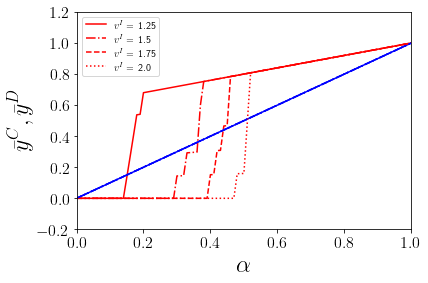

In [80]:
# plt.rcParams['text.latex.preamble']=[r"\usepackage{xcolor}"]
plt.rcParams['text.usetex'] = True

line_styles = ['-', '-.', '--', ':']
# marker_styles = ['o', 'o', '^', '^', 's', 's']

# Find better colors
# for vot_idx, _ in reversed(list(enumerate(vots_ineligible_avg))):
for vot_idx, _ in enumerate(vots_ineligible_avg):
    plt.plot(alpha_vals, users_el_d1[:, vot_idx], color = 'r', \
             linestyle = line_styles[vot_idx % 4], label = r'$v^I = \ $' \
                 + str(vot_ineligible_base + in_vot_incr * vot_idx))
    plt.plot(alpha_vals, users_el_b1[:, vot_idx], color = 'b', \
             linestyle = line_styles[vot_idx % 4])
    
#     plt.plot(alpha_vals, users_el_d1[:, vot_idx], \
#              color = (1.0, 0.0 + 0.15*vot_idx, 0.0 + 0.15*vot_idx))
#     plt.plot(alpha_vals, users_el_b1[:, vot_idx], \
#              color = (0.0 + 0.1*vot_idx, 0.0 + 0.1*vot_idx, 1.0))

plt.xlim([0, 1.0])
plt.ylim([-0.2, 1.2])
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel(r'$\displaystyle \alpha$', fontsize=24)
plt.ylabel(r'$\displaystyle \bar y^C, \bar y^D$', fontsize=24)
plt.legend()

In [ ]:
# print("solution_set_array_at_toll_d[users_el]:\n", solution_set_array_at_toll_d1[0]["users_el"])
# print()
# print("solution_set_array_at_toll_b1[users_el]:\n", solution_set_array_at_toll_b1[0]["users_el"])

## Sensitivity 2, w.r.t. demand:

In [ ]:
# num_betas = 4
# # beta_vals = np.linspace(0.0, 2.0, num = num_betas + 1)
# beta_vals

In [51]:
time_1 = time.time()

# \ell(x) = x**4 / 16

T = 1
toll = 0.4
num_alphas = 100 # Should be even
alpha_vals = np.linspace(0.0, 1.0, num = num_alphas + 1)
num_betas = 4
beta_incr = 0.5
beta_vals = - 1 + beta_incr * np.arange(num_betas)

vot_eligible = 1.0
vot_ineligible = 1.25

solution_set_array_at_toll_d1 = []
solution_set_array_at_toll_b1 = []
users_el_d1 = np.zeros((num_alphas + 1, num_betas + 1))
users_in_d1 = np.zeros((num_alphas + 1, num_betas + 1))
users_el_b1 = np.zeros((num_alphas + 1, num_betas + 1))
users_in_b1 = np.zeros((num_alphas + 1, num_betas + 1))

for beta_idx, beta in enumerate(beta_vals):
    for alpha_idx, alpha in enumerate(alpha_vals):
        
# for beta in [0.0]:
#     for alpha in [0.5]:
    
        print()
        print("alpha:", alpha)
        print("beta:", beta)
        print()
    
        solution_set_d1 = m_d1_solve(T, toll, vot_ineligible, vot_eligible, alpha, beta = beta)
        solution_set_b1 = m_b1_solve(T, toll, vot_ineligible, vot_eligible, alpha * toll, beta = beta)

        users_el_d1[alpha_idx][beta_idx] = solution_set_d1["users_el"][0][0]
        users_el_b1[alpha_idx][beta_idx] = solution_set_b1["users_el"][0][0] \
                                            + solution_set_b1["users_el"][1][0]
        
    #     users_in_d1.append(solution_set_d1["users_in"][0][0])
    #     users_in_b1.append(solution_set_b1["users_in"][0][0] + solution_set_b1["users_in"][1][0])
    #     solution_set_array_at_toll_d1.append(solution_set_d1)
    #     solution_set_array_at_toll_b1.append(solution_set_b1)

time_2 = time.time()
print("Time: ", time_2 - time_1)



alpha: 0.0
beta: -1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0xd77cbb09
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 7 rows and 4 columns
Presolve time: 0.01s
Presolved: 1 rows, 2 columns, 2 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 0.000e+00
 Factor NZ  : 1.000e+00
 Factor Ops : 1.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
  

 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.00892321e+05 -5.00500125e+05  2.00e+03 0.00e+00  2.50e+05     0s
   1   8.92843035e-01 -4.99750503e+02  1.00e+00 0.00e+00  2.50e+02     0s
   2   3.20857097e-01 -1.28710094e+02  1.00e-06 0.00e+00  3.23e+01     0s
   3   3.20021733e-01 -2.58662261e-03  1.25e-09 7.31e-14  8.07e-02     0s
   4   2.54693419e-01  2.17844126e-01  5.00e-12 2.78e-16  9.21e-03     0s
   5   2.44677271e-01  2.39904720e-01  0.00e+00 0.00e+00  1.19e-03     0s
   6   2.44170091e-01  2.43940264e-01  0.00e+00 0.00e+00  5.75e-05     0s
   7   2.44168000e-01  2.44167774e-01  0.00e+00 0.00e+00  5.64e-08     0s
   8   2.44168000e-01  2.44168000e-01  0.00e+00 0.00e+00  5.65e-11     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.44168000e-01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)


Optimal objective 2.43272000e-01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0xeff49ffc
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [2e-02, 1e+00]
Presolve removed 11 rows and 4 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.03700220e+05 -1.55005076e+07  2.12e+03 0.00e+00  2.56e+06     0s
   1   5.87481604e+04 -1.31657986e+06  1.40e+02 2.27e-13  2.05e+05     0s
   2   6.15331233e+03 -1.51396995e+05  1.57e+01 0.00e+00  2.40e+04     0s
   3   1.28622908e+00 -3.08383612e+03  2.18e-01 9.09e-13  4.71e+02     0s
   4   5.96880540e-01 -1.23095842e+02  2.18e-07 0.00e+00  1.55e+01     0s
   5   5.96334595e-01 -4.04233817e-01  1.77e-09 9.06e-14  1.25e-01     0s
   6   2.56976247e-01 -3.41579828e-01  1.72e-15 3.55e-15  7.48e-02     0s
   7   2.37000681e-01  1.91836692e-01  2.27e-13 8.88e-16  5.65e-03     0s
   8   2.22206965e-01  2.16489080e-01  0.00e+00 0.00e+00  7.15e-04     0s
   9   2.21038826e-01  2.20592845e-01  2.2

   4   5.96636750e-01 -1.25040082e+02  2.19e-07 1.14e-13  1.57e+01     0s
   5   5.96083991e-01 -4.18081693e-01  1.76e-09 2.15e-13  1.27e-01     0s
   6   2.53552493e-01 -3.46763875e-01  1.78e-15 0.00e+00  7.50e-02     0s
   7   2.30870970e-01  1.75044972e-01  1.11e-16 2.22e-16  6.98e-03     0s
   8   2.14675032e-01  2.09447771e-01  2.27e-13 9.09e-13  6.53e-04     0s
   9   2.13106684e-01  2.12578602e-01  2.27e-13 0.00e+00  6.60e-05     0s
  10   2.13003043e-01  2.12951373e-01  0.00e+00 0.00e+00  6.46e-06     0s
  11   2.13000007e-01  2.12999314e-01  0.00e+00 4.44e-16  8.64e-08     0s
  12   2.13000003e-01  2.12999996e-01  0.00e+00 5.55e-17  8.63e-11     0s

Barrier solved model in 12 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.13000003e-01


alpha: 0.09
beta: -1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up 

  11   2.05005348e-01  2.04994250e-01  0.00e+00 0.00e+00  1.39e-06     0s
  12   2.05000758e-01  2.04999194e-01  2.27e-13 0.00e+00  1.96e-07     0s
  13   2.05000106e-01  2.04999883e-01  1.39e-17 0.00e+00  2.76e-08     0s
  14   2.05000017e-01  2.04999983e-01  0.00e+00 4.44e-16  3.90e-09     0s
  15   2.05000002e-01  2.04999994e-01  0.00e+00 8.88e-16  5.51e-10     0s

Barrier solved model in 15 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.05000002e-01


alpha: 0.11
beta: -1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0x4c3c4277
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+0


CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0x1a071245
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 7 rows and 4 columns
Presolve time: 0.01s
Presolved: 1 rows, 2 columns, 2 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 0.000e+00
 Factor NZ  : 1.000e+00
 Factor Ops : 1.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.00848299e+05 -5.00500125e+05  2.00e+03 5.68e-14  2.50e+05     0s
   1   8.48804547e-01 -4.99750517e+0

 AA' NZ     : 0.000e+00
 Factor NZ  : 1.000e+00
 Factor Ops : 1.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.00840295e+05 -5.00500125e+05  2.00e+03 0.00e+00  2.50e+05     0s
   1   8.40797549e-01 -4.99750519e+02  1.00e+00 0.00e+00  2.50e+02     0s
   2   2.94892574e-01 -1.28724503e+02  1.00e-06 2.53e-14  3.23e+01     0s
   3   2.94252761e-01 -2.74963683e-03  1.15e-09 1.05e-14  7.43e-02     0s
   4   2.42650570e-01  2.14915217e-01  2.10e-11 1.94e-16  6.93e-03     0s
   5   2.37306466e-01  2.34597084e-01  1.11e-16 0.00e+00  6.77e-04     0s
   6   2.37200015e-01  2.37172310e-01  0.00e+00 4.16e-17  6.93e-06     0s
   7   2.37200000e-01  2.37199972e-01  1.11e-16 1.39e-17  6.92e-09     0s
   8   2.37200000e-01  2.37200000e-01  0.00e+00 0.00e+00  6.93e-12     0s

Barrier solved model in 8 iterations and 0.07 seconds (0.00 work units)
Optimal obj

   7   2.35888000e-01  2.35887981e-01  0.00e+00 0.00e+00  4.82e-09     0s
   8   2.35888000e-01  2.35888000e-01  0.00e+00 2.78e-17  4.83e-12     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.35888000e-01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0x0d0c0768
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [7e-02, 1e+00]
Presolve removed 11 rows and 4 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000

Presolve removed 11 rows and 4 columns
Presolve time: 0.02s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.03700202e+05 -1.55005239e+07  2.12e+03 0.00e+00  2.56e+06     0s
   1   5.87479671e+04 -1.31654688e+06  1.40e+02 0.00e+00  2.05e+05     0s
   2   6.15360141e+03 -1.51417493e+05  1.57e+01 9.09e-13  2.40e+04     0s
   3   1.28673503e+00 -3.10109116e+03  2.19e-01 0.00e+00  4.73e+02     0s
   4   5.95439591e-01 -1.34153484e+02  2.19e-07 0.00e+00  1.68e+01     0s
   5   5.94877571e-01 -4.86181460e-01  1.76e-09 4.42e-13  1.35e-01     0s
   6   2.45233681e-01 -3.73748459e-01  1.75e-15 4.44e-16  7.74e-02     0s
   7   2.03869794e-01  1.26614086e-01  1.

   6   2.44300835e-01 -3.77960391e-01  1.78e-15 9.09e-13  7.78e-02     0s
   7   2.00634468e-01  1.16875749e-01  1.39e-16 8.88e-16  1.05e-02     0s
   8   1.70704164e-01  1.65114462e-01  2.27e-13 0.00e+00  6.99e-04     0s
   9   1.67210434e-01  1.67039890e-01  0.00e+00 0.00e+00  2.13e-05     0s
  10   1.67050209e-01  1.67049978e-01  0.00e+00 9.09e-13  2.69e-08     0s
  11   1.67050004e-01  1.67050004e-01  0.00e+00 0.00e+00  2.69e-11     0s

Barrier solved model in 11 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.67050004e-01


alpha: 0.22
beta: -1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0x9b3d0d25
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-01

Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 7 rows and 4 columns
Presolve time: 0.01s
Presolved: 1 rows, 2 columns, 2 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 0.000e+00
 Factor NZ  : 1.000e+00
 Factor Ops : 1.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.00804277e+05 -5.00500125e+05  2.00e+03 0.00e+00  2.50e+05     0s
   1   8.04766058e-01 -4.99750531e+02  1.00e+00 8.33e-14  2.50e+02     0s
   2   2.76914181e-01 -1.28734480e+02  1.00e-06 6.49e-15  3.23e+01     0s
   3   2.76394581e-01 -2.86257911e-03  1.08e-09 2.66e-14  6.98e-02     0s
   4   2.32992858e-01  2.1545857

   3   2.72424082e-01 -2.88768699e-03  1.06e-09 1.87e-14  6.88e-02     0s
   4   2.31672533e-01  2.12213901e-01  1.24e-11 2.78e-16  4.86e-03     0s
   5   2.29206418e-01  2.28020291e-01  0.00e+00 0.00e+00  2.97e-04     0s
   6   2.29192000e-01  2.29190635e-01  0.00e+00 2.78e-17  3.41e-07     0s
   7   2.29192000e-01  2.29191999e-01  0.00e+00 0.00e+00  3.41e-10     0s

Barrier solved model in 7 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.29192000e-01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0xec083412
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e

  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e-01, 1e+00]
Presolve removed 11 rows and 4 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.03700190e+05 -1.55005351e+07  2.12e+03 0.00e+00  2.56e+06     0s
   1   5.87478333e+04 -1.31652405e+06  1.40e+02 0.00e+00  2.05e+05     0s
   2   6.15380153e+03 -1.51431679e+05  1.57e+01 5.68e-13  2.40e+04     0s
   3   1.28708449e+00 -3.11300077e+03  2.19e-01 5.68e-13  4.75e+02     0s
   4   5.94610207e-01 -1.39976479e+02  2.19e-07 0.00e+00  1.76e+01     0s
   5   5.94045922e-01 -5.29644325e-01  1.75e-09 0.00e

   4   5.94441112e-01 -1.41106770e+02  2.19e-07 0.00e+00  1.77e+01     0s
   5   5.93876451e-01 -5.38015578e-01  1.75e-09 9.09e-13  1.41e-01     0s
   6   2.40869544e-01 -3.94399188e-01  1.78e-15 8.88e-16  7.94e-02     0s
   7   1.89412124e-01  8.71305615e-02  2.27e-13 5.55e-17  1.28e-02     0s
   8   1.49243593e-01  1.41718958e-01  0.00e+00 0.00e+00  9.41e-04     0s
   9   1.45048816e-01  1.44994125e-01  2.27e-13 4.44e-16  6.84e-06     0s
  10   1.45000048e-01  1.44999996e-01  0.00e+00 5.55e-17  6.85e-09     0s
  11   1.45000000e-01  1.45000000e-01  0.00e+00 0.00e+00  6.85e-12     0s

Barrier solved model in 11 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.45000000e-01


alpha: 0.31
beta: -1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Mod

Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0x982a36b6
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 7 rows and 4 columns
Presolve time: 0.01s
Presolved: 1 rows, 2 columns, 2 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 0.000e+00
 Factor NZ  : 1.000e+00
 Factor Ops : 1.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.00768259e+05 -5.00500125e+05  2.00e+03 0.00e+00  2.50e+05     0s
   1   7.68734567e-01 -4.99750542e+02  1.00e+00 8.46e-14  2.50e+02     0s
   2   2.589333

   1   7.60727569e-01 -4.99750544e+02  1.00e+00 0.00e+00  2.50e+02     0s
   2   2.54937309e-01 -1.28746677e+02  1.00e-06 1.79e-14  3.23e+01     0s
   3   2.54547768e-01 -3.00071563e-03  9.96e-10 3.90e-14  6.44e-02     0s
   4   2.23302847e-01  2.03403966e-01  9.77e-12 3.89e-16  4.97e-03     0s
   5   2.21206870e-01  2.20250953e-01  0.00e+00 2.78e-17  2.39e-04     0s
   6   2.21200000e-01  2.21199057e-01  0.00e+00 0.00e+00  2.36e-07     0s
   7   2.21200000e-01  2.21199999e-01  0.00e+00 0.00e+00  2.36e-10     0s

Barrier solved model in 7 iterations and 0.08 seconds (0.00 work units)
Optimal objective 2.21200000e-01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0x45d74740
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix r

Model fingerprint: 0x8e6da417
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e-01, 1e+00]
Presolve removed 11 rows and 4 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.03700178e+05 -1.55005464e+07  2.12e+03 0.00e+00  2.56e+06     0s
   1   5.87476995e+04 -1.31650122e+06  1.40e+02 1.14e-13  2.05e+05     0s
   2   6.15400165e+03 -1.51445859e+05  1.57e+01 2.27e-13  2.40e+04     0s
   3   1.28743327e+00 -3.12488089e+03  2.19e-01 0.00e+00  4.76e+02     0s
 

   3   1.28751068e+00 -3.12751692e+03  2.19e-01 0.00e+00  4.76e+02     0s
   4   5.93738414e-01 -1.45572171e+02  2.19e-07 0.00e+00  1.83e+01     0s
   5   5.93172297e-01 -5.70792731e-01  1.75e-09 0.00e+00  1.45e-01     0s
   6   2.38226991e-01 -4.07294869e-01  1.75e-15 0.00e+00  8.07e-02     0s
   7   1.80592377e-01  7.02868514e-02  2.27e-13 1.11e-16  1.38e-02     0s
   8   1.33774545e-01  1.24412429e-01  2.27e-13 9.09e-13  1.17e-03     0s
   9   1.31061427e-01  1.31041065e-01  1.39e-17 0.00e+00  2.54e-06     0s
  10   1.31050009e-01  1.31049987e-01  0.00e+00 0.00e+00  2.54e-09     0s
  11   1.31049994e-01  1.31050002e-01  0.00e+00 0.00e+00  2.54e-12     0s

Barrier solved model in 11 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.31049994e-01


alpha: 0.4
beta: -1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up t

Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0x4f8b6f14
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 7 rows and 4 columns
Presolve time: 0.01s
Presolved: 1 rows, 2 columns, 2 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 0.000e+00
 Factor NZ  : 1.000e+00
 Factor Ops : 1.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.00732241e+05 -5.00500125e+05  2.00e+03 5.68e-14  2.50e+05     0s
   1   7.32703076e-01 -4.99750553e+02  1.00e+00 2.91e-14  2.50e+02     0s
   2   2.409501

   3   2.36664015e-01 -3.13040016e-03  8.61e-10 5.61e-15  5.99e-02     0s
   4   2.13185059e-01  1.96583357e-01  5.31e-12 5.55e-17  4.15e-03     0s
   5   2.11913476e-01  2.11410415e-01  0.00e+00 2.78e-17  1.26e-04     0s
   6   2.11912000e-01  2.11911500e-01  0.00e+00 0.00e+00  1.25e-07     0s
   7   2.11912000e-01  2.11911999e-01  0.00e+00 5.55e-17  1.25e-10     0s

Barrier solved model in 7 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.11912000e-01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0x29399d58
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [2e

  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [2e-01, 1e+00]
Presolve removed 11 rows and 4 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.03700166e+05 -1.55005576e+07  2.12e+03 0.00e+00  2.56e+06     0s
   1   5.87475656e+04 -1.31647839e+06  1.40e+02 0.00e+00  2.05e+05     0s
   2   6.15420177e+03 -1.51460035e+05  1.57e+01 1.14e-13  2.40e+04     0s
   3   1.28778139e+00 -3.13673160e+03  2.20e-01 3.41e-13  4.78e+02     0s
   4   5.93249172e-01 -1.48439516e+02  2.20e-07 1.14e-13  1.86e+01     0s
   5   5.92682082e-01 -5.91521293e-01  1.74e-09 1.60e

   4   5.93117390e-01 -1.49174877e+02  2.20e-07 0.00e+00  1.87e+01     0s
   5   5.92550036e-01 -5.96786007e-01  1.74e-09 1.63e-13  1.49e-01     0s
   6   2.36087345e-01 -4.17337306e-01  1.72e-15 8.88e-16  8.17e-02     0s
   7   1.74351651e-01  6.07989356e-02  1.39e-16 0.00e+00  1.42e-02     0s
   8   1.26874000e-01  1.17563009e-01  0.00e+00 4.44e-16  1.16e-03     0s
   9   1.25362288e-01  1.25089478e-01  2.27e-13 4.44e-16  3.41e-05     0s
  10   1.25210408e-01  1.25199545e-01  2.27e-13 3.05e-16  1.36e-06     0s
  11   1.25200011e-01  1.25200000e-01  0.00e+00 0.00e+00  1.52e-09     0s

Barrier solved model in 11 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.25200011e-01


alpha: 0.49
beta: -1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Mod


Barrier solved model in 14 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.25000004e-01


alpha: 0.51
beta: -1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0x670ee809
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 7 rows and 4 columns
Presolve time: 0.01s
Presolved: 1 rows, 2 columns, 2 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 0.000e+00
 Factor NZ  : 1.000e+00
 Factor Ops : 1.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  O

Presolve time: 0.01s
Presolved: 1 rows, 2 columns, 2 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 0.000e+00
 Factor NZ  : 1.000e+00
 Factor Ops : 1.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.00688219e+05 -5.00500125e+05  2.00e+03 0.00e+00  2.50e+05     0s
   1   6.88664586e-01 -4.99750567e+02  1.00e+00 5.68e-14  2.50e+02     0s
   2   2.18967365e-01 -1.28766641e+02  1.00e-06 6.47e-14  3.22e+01     0s
   3   2.18763290e-01 -3.26085589e-03  7.23e-10 3.00e-15  5.55e-02     0s
   4   2.02045177e-01  1.88665599e-01  2.71e-12 0.00e+00  3.34e-03     0s
   5   2.01328245e-01  2.01098786e-01  0.00e+00 0.00e+00  5.74e-05     0s
   6   2.01328000e-01  2.01327771e-01  2.22e-16 0.00e+00  5.73e-08     0s
   7   2.01328000e-01  2.01328000e-01  0.00e+00 2.78e-17  5.73e-11     0s

Barri

   7   1.98800000e-01  1.98800000e-01  0.00e+00 2.78e-17  4.70e-11     0s

Barrier solved model in 7 iterations and 0.12 seconds (0.00 work units)
Optimal objective 1.98800000e-01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0x27249172
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [2e-01, 1e+00]
Presolve removed 11 rows and 4 columns
Presolve time: 0.03s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second p

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.03700152e+05 -1.55005714e+07  2.12e+03 0.00e+00  2.56e+06     0s
   1   5.87474021e+04 -1.31645049e+06  1.40e+02 0.00e+00  2.05e+05     0s
   2   6.15444636e+03 -1.51477354e+05  1.57e+01 0.00e+00  2.40e+04     0s
   3   1.28820597e+00 -3.15117599e+03  2.20e-01 0.00e+00  4.80e+02     0s
   4   5.92562880e-01 -1.52084011e+02  2.20e-07 9.09e-13  1.91e+01     0s
   5   5.91994405e-01 -6.17352501e-01  1.74e-09 0.00e+00  1.51e-01     0s
   6   2.34313957e-01 -4.25081987e-01  1.78e-15 8.88e-16  8.24e-02     0s
   7   1.69915225e-01  5.58831133e-02  2.27e-13 0.00e+00  1.43e-02     0s
   8   1.25696711e-01  1.15615591e-01  0.00e+00 2.50e-16  1.26e-03     0s
   9   1.25002816e-01  1.24784384e-01  0.0

   8   1.25610512e-01  1.15569539e-01  1.39e-17 0.00e+00  1.26e-03     0s
   9   1.25001159e-01  1.24838889e-01  0.00e+00 0.00e+00  2.03e-05     0s
  10   1.25000000e-01  1.24999844e-01  2.27e-13 0.00e+00  2.02e-08     0s
  11   1.25000000e-01  1.25000000e-01  2.27e-13 4.44e-16  2.02e-11     0s

Barrier solved model in 11 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.25000000e-01


alpha: 0.6
beta: -1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0x9e7dc5ea
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 7 rows and 4 columns


  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 7 rows and 4 columns
Presolve time: 0.01s
Presolved: 1 rows, 2 columns, 2 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 0.000e+00
 Factor NZ  : 1.000e+00
 Factor Ops : 1.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.00652201e+05 -5.00500125e+05  2.00e+03 0.00e+00  2.50e+05     0s
   1   6.52633094e-01 -4.99750578e+02  1.00e+00 1.32e-14  2.50e+02     0s
   2   2.00978767e-01 -1.28776626e+02  1.00e-06 1.06e-13  3.22e+01     0s
   3   2.00845238e-01 -3.39141467e-03  5.85e-10 0.00e+00  5.11e-02     0s
   4   1.89813958e-01  1.79538366e-01  1.43e-12 0.00e+00  2.57e-03     0s
   5   1.89448029e-01  1.89360624e-01  0.00e+00 2.78e-17  2.19e-05     0s
   6   1.89448

   5   1.86632017e-01  1.86563596e-01  0.00e+00 0.00e+00  1.71e-05     0s
   6   1.86632000e-01  1.86631932e-01  0.00e+00 0.00e+00  1.71e-08     0s
   7   1.86632000e-01  1.86632000e-01  0.00e+00 0.00e+00  1.71e-11     0s

Barrier solved model in 7 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.86632000e-01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0x5131ef3d
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [3e-01, 1e+00]
Presolve removed 11 rows and 4 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic obj

Presolve removed 11 rows and 4 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.03700140e+05 -1.55005826e+07  2.12e+03 0.00e+00  2.56e+06     0s
   1   5.87472683e+04 -1.31642766e+06  1.40e+02 4.55e-13  2.05e+05     0s
   2   6.15464647e+03 -1.51491519e+05  1.57e+01 1.14e-13  2.40e+04     0s
   3   1.28855260e+00 -3.16296168e+03  2.20e-01 2.27e-13  4.81e+02     0s
   4   5.92062939e-01 -1.54431745e+02  2.20e-07 1.14e-12  1.94e+01     0s
   5   5.91493391e-01 -6.33552175e-01  1.74e-09 0.00e+00  1.53e-01     0s
   6   2.32824638e-01 -4.30968191e-01  1.75e-15 4.44e-16  8.30e-02     0s
   7   1.66654401e-01  5.34843393e-02  1.

   6   2.32526299e-01 -4.32060346e-01  1.72e-15 0.00e+00  8.31e-02     0s
   7   1.66047111e-01  5.31710088e-02  1.11e-16 0.00e+00  1.41e-02     0s
   8   1.25469118e-01  1.16041474e-01  2.27e-13 8.88e-16  1.18e-03     0s
   9   1.25000391e-01  1.24954447e-01  0.00e+00 8.88e-16  5.74e-06     0s
  10   1.25000000e-01  1.24999952e-01  2.78e-17 1.27e-16  5.74e-09     0s
  11   1.25000004e-01  1.24999993e-01  2.27e-13 9.09e-13  5.74e-12     0s

Barrier solved model in 11 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.25000004e-01


alpha: 0.6900000000000001
beta: -1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0x522ce5e4
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective

Model fingerprint: 0x6c1287fa
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 7 rows and 4 columns
Presolve time: 0.01s
Presolved: 1 rows, 2 columns, 2 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 0.000e+00
 Factor NZ  : 1.000e+00
 Factor Ops : 1.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.00616183e+05 -5.00500125e+05  2.00e+03 0.00e+00  2.50e+05     0s
   1   6.16601602e-01 -4.99750589e+02  1.00e+00 1.45e-14  2.50e+02     0s
   2   1.82987752e-01 -1.28786612e+02  1.00e-06 2.32e-14  3.22e+01     0s
   3   1.82909849e-01 -3.52207656e-03  4.46e-10 2.19e-14  4.66e-02     0s
  

   3   1.78921852e-01 -3.55112655e-03  4.16e-10 0.00e+00  4.56e-02     0s
   4   1.73278779e-01  1.67093459e-01  8.37e-13 0.00e+00  1.55e-03     0s
   5   1.73168001e-01  1.73153001e-01  0.00e+00 0.00e+00  3.75e-06     0s
   6   1.73168000e-01  1.73167985e-01  0.00e+00 0.00e+00  3.75e-09     0s
   7   1.73168000e-01  1.73168000e-01  0.00e+00 5.55e-17  3.75e-12     0s

Barrier solved model in 7 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.73168000e-01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0xc9c986d8
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [3e

  Bounds range     [1e+04, 1e+04]
  RHS range        [3e-01, 1e+00]
Presolve removed 11 rows and 4 columns
Presolve time: 0.06s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.03700128e+05 -1.55005939e+07  2.12e+03 0.00e+00  2.56e+06     0s
   1   5.87471345e+04 -1.31640484e+06  1.40e+02 2.27e-13  2.05e+05     0s
   2   6.15484658e+03 -1.51505680e+05  1.57e+01 0.00e+00  2.40e+04     0s
   3   1.28889859e+00 -3.17471825e+03  2.20e-01 6.82e-13  4.83e+02     0s
   4   5.91608066e-01 -1.56322321e+02  2.20e-07 0.00e+00  1.96e+01     0s
   5   5.91037504e-01 -6.46217797e-01  1.74e-09 0.00e+00  1.55e-01     0s
   6   2.31563579e-01 -4.35343754e-01  1.72e-15

   7   1.63712297e-01  5.24157211e-02  1.11e-16 5.55e-17  1.39e-02     0s
   8   1.25456903e-01  1.16877612e-01  2.27e-13 8.33e-17  1.07e-03     0s
   9   1.25000417e-01  1.24980230e-01  2.27e-13 0.00e+00  2.52e-06     0s
  10   1.25000004e-01  1.24999974e-01  2.27e-13 9.09e-13  2.53e-09     0s
  11   1.25000004e-01  1.25000000e-01  1.39e-17 0.00e+00  2.52e-12     0s

Barrier solved model in 11 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.25000004e-01


alpha: 0.78
beta: -1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0x6cb96f57
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [9e-02, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+0

Presolved: 1 rows, 2 columns, 2 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 0.000e+00
 Factor NZ  : 1.000e+00
 Factor Ops : 1.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.00580165e+05 -5.00500125e+05  2.00e+03 0.00e+00  2.50e+05     0s
   1   5.80570109e-01 -4.99750600e+02  1.00e+00 1.30e-13  2.50e+02     0s
   2   1.64994318e-01 -1.28796600e+02  1.00e-06 0.00e+00  3.22e+01     0s
   3   1.64957114e-01 -3.65284165e-03  3.08e-10 0.00e+00  4.22e-02     0s
   4   1.61847629e-01  1.57524256e-01  2.97e-13 0.00e+00  1.08e-03     0s
   5   1.61800000e-01  1.61795760e-01  0.00e+00 0.00e+00  1.06e-06     0s
   6   1.61800000e-01  1.61799996e-01  0.00e+00 5.55e-17  1.06e-09     0s

Barrier solved model in 6 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.61800000


Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0x9c536c6c
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [3e-01, 1e+00]
Presolve removed 11 rows and 4 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.03700118e+05 -

   2   6.15504669e+03 -1.51519836e+05  1.57e+01 0.00e+00  2.40e+04     0s
   3   1.28924392e+00 -3.18644579e+03  2.21e-01 4.55e-13  4.84e+02     0s
   4   5.91190618e-01 -1.57838640e+02  2.21e-07 1.14e-13  1.98e+01     0s
   5   5.90619106e-01 -6.56008422e-01  1.74e-09 0.00e+00  1.56e-01     0s
   6   2.30490070e-01 -4.38485637e-01  2.27e-13 1.11e-16  8.36e-02     0s
   7   1.62252121e-01  5.23494855e-02  8.33e-17 9.09e-13  1.37e-02     0s
   8   1.25457976e-01  1.17513426e-01  0.00e+00 5.55e-17  9.93e-04     0s
   9   1.25000432e-01  1.24986641e-01  0.00e+00 4.44e-16  1.72e-06     0s
  10   1.24999996e-01  1.24999993e-01  0.00e+00 0.00e+00  1.73e-09     0s

Barrier solved model in 10 iterations and 0.03 seconds (0.00 work units)
Optimal objective 1.24999996e-01


alpha: 0.85
beta: -1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up 

Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e-02, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 7 rows and 4 columns
Presolve time: 0.01s
Presolved: 1 rows, 2 columns, 2 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 0.000e+00
 Factor NZ  : 1.000e+00
 Factor Ops : 1.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.00552151e+05 -5.00500125e+05  2.00e+03 0.00e+00  2.50e+05     0s
   1   5.52545615e-01 -4.99750609e+02  1.00e+00 1.14e-13  2.50e+02     0s
   2   1.50997753e-01 -1.28804369e+02  1.00e-06 2.30e-14  3.22e+01     0s
   3   1.50981878e-01 -3.75461922e-03  2.00e-10 2.58e-14  3.87e-02     0s
   4   1.49662803e-01  1.4706660

   6   1.46032000e-01  1.46031998e-01  0.00e+00 2.78e-17  5.31e-10     0s

Barrier solved model in 6 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.46032000e-01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0x97701ff7
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [4e-01, 1e+00]
Presolve removed 11 rows and 4 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second p

Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.03700106e+05 -1.55006139e+07  2.12e+03 0.00e+00  2.56e+06     0s
   1   5.87468966e+04 -1.31636425e+06  1.40e+02 0.00e+00  2.05e+05     0s
   2   6.15520232e+03 -1.51530842e+05  1.57e+01 0.00e+00  2.40e+04     0s
   3   1.28951205e+00 -3.19554720e+03  2.21e-01 1.14e-13  4.85e+02     0s
   4   5.90887841e-01 -1.58802261e+02  2.21e-07 0.00e+00  1.99e+01     0s
   5   5.90315599e-01 -6.61975924e-01  1.73e-09 0.00e+00  1.57e-01     0s
   6   2.29764692e-01 -4.40220118e-01  1.75e-15 0.00e+00  8.37e-02     0s
   7   1.61024399e-01  5.25717586e-02  1.11e-16 1.94e-15  1.36e-02     0s
   8   1.25455853e-01  1.18080940e-01  5.55e-17 1.35e-16  9.22e-04     0s
   9   1.25000436e-01  1.24989681e-01  2.27e-13 1.39e-17  1.35e-06     0s
  10   1.25000000e-01  1.24999989e-01  0.00e+00 4.44e-16  1.35e-09     0s

Barrier solved model in 10 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.25000000e-01


alp

Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0x2947e9e9
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-02, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 7 rows and 4 columns
Presolve time: 0.01s
Presolved: 1 rows, 2 columns, 2 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 0.000e+00
 Factor NZ  : 1.000e+00
 Factor Ops : 1.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.00524137e+05 -5.00500125e+05  2.00e+03 0.00e+00  2.50e+05     0s
   1   5.24521121e-01 -4.99750618e+02  1.00e+00 1.70e-13  2.50e+02     0s
   2   1.369997

   5   1.32872000e-01  1.32871280e-01  2.22e-16 2.78e-17  1.80e-07     0s
   6   1.32872000e-01  1.32871999e-01  0.00e+00 2.78e-17  1.80e-10     0s

Barrier solved model in 6 iterations and 0.15 seconds (0.00 work units)
Optimal objective 1.32872000e-01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0x1fe93e33
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [4e-01, 1e+00]
Presolve removed 11 rows and 4 columns
Presolve time: 0.05s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000

Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.03700097e+05 -1.55006226e+07  2.12e+03 0.00e+00  2.56e+06     0s
   1   5.87467926e+04 -1.31634650e+06  1.40e+02 0.00e+00  2.05e+05     0s
   2   6.15535796e+03 -1.51541846e+05  1.57e+01 5.68e-13  2.40e+04     0s
   3   1.28977978e+00 -3.20463114e+03  2.21e-01 0.00e+00  4.87e+02     0s
   4   5.90601567e-01 -1.59605676e+02  2.21e-07 0.00e+00  2.00e+01     0s
   5   5.90028629e-01 -6.66726857e-01  1.73e-09 0.00e+00  1.57e-01     0s
   6   2.29122184e-01 -4.41429470e-01  1.69e-15 0.00e+00  8.38e-02     0s
   7   1.59978077e-01  5.29854782e-02  1.11e-16 0.00e+00  1.34e-02     0s
   8   1.25449467e-01  1.18574265e-01  0.00e+00 8.33e-17  8.59e-04     0s
   9   1.25000432e-01  1.24991383e-01  0.00e+00 1.80e-16  1.13e-06     0s
  10   1.25000000e-01  1.24999993e-01  0.00e+00 6.13e-18  1.13e-09     0s

Barrier solved model in 10 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.25000000e-01


alp

Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [5e-01, 1e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   3.50429971e+06 -2.99886626e+07  7.94e+03 3.24e+02  4.49e+06     0s
   1   3.50738864e+00 -9.12536036e+05  7.19e+00 2.93e-01  1.15e+05     0s
   2   5.61185104e-01 -2.00259819e+03  7.19e-06 2.93e-07  2.50e+02     0s
   3   5.60963978e-01 -2.02365574e+00  2.09e-09 8.55e-11  3.23e-01     0s
   4   5.04044501e-01  3.8161466

   6   4.70102466e-01  4.68659884e-01  1.82e-12 1.11e-16  1.80e-04     0s
   7   4.70050051e-01  4.70048590e-01  0.00e+00 9.09e-13  1.83e-07     0s
   8   4.70050006e-01  4.70049999e-01  0.00e+00 0.00e+00  1.83e-10     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 4.70050006e-01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0xa4bbe622
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [8e-03, 1e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic ob

Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47188528e+06 -3.48847878e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.45783108e+03 -2.45061792e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.07038880e+01 -2.52736685e+04  2.14e+00 1.10e-01  2.31e+03     0s
   3   5.07800508e-01 -1.94438888e+02  2.14e-06 1.10e-07  1.62e+01     0s
   4   5.07665764e-01 -1.55491691e-01  5.15e-09 2.65e-10  5.53e-02     0s
   5   4.80824467e-01  2.37453598e-01  1.33e-09 6.82e-11  2.03e-02     0s
   6   4.68590695e-01  4.30718314e-01  1.36e-12 2.66e-15  3.16e-03     0s
   7   4.58561029e-01  4.50883563e-01  2

   6   4.52570248e-01  4.21893496e-01  2.27e-13 0.00e+00  2.56e-03     0s
   7   4.50960819e-01  4.50390104e-01  5.83e-16 8.76e-17  4.76e-05     0s
   8   4.50850103e-01  4.50849537e-01  8.33e-17 6.06e-16  4.80e-08     0s
   9   4.50849999e-01  4.50849999e-01  8.33e-17 9.09e-13  4.80e-11     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 4.50849999e-01


alpha: 0.07
beta: -0.5

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0x44cfb544
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [5e-01, 1e+00]
Presolve removed 6 rows and 2 columns


Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   3.68269024e+06 -3.08321185e+07  8.14e+03 3.57e+02  4.54e+06     0s
   1   3.74178079e+00 -9.48513845e+05  7.39e+00 3.24e-01  1.19e+05     0s
   2   5.43194245e-01 -2.04658088e+03  7.39e-06 3.24e-07  2.56e+02     0s
   3   5.43004583e-01 -2.03985501e+00  1.94e-09 8.46e-11  3.23e-01     0s
   4   4.93840035e-01  3.76481037e-01  4.00e-11 2.73e-12  1.47e-02     0s
   5   4.80187494e-01  4.68671549e-01  1.82e-12 5.55e-17  1.44e-03     0s
   6   4.70089491e-01  4.69803657e-01  1.82e-12 9.09e-13  3.57e-05     0s
   7   4.70050033e-01  4.70049750e-01  1.82e-12 9.09e-13  3.67e-08     0s
   8   4.70050003e-01  4.70


Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 4.70050004e-01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0x983b5372
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [4e-02, 1e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective               

Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47185769e+06 -3.48845893e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.45762647e+03 -2.45056991e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.06993926e+01 -2.52551638e+04  2.14e+00 1.10e-01  2.31e+03     0s
   3   5.07581595e-01 -2.03112194e+02  2.14e-06 1.10e-07  1.70e+01     0s
   4   5.07443849e-01 -2.08538432e-01  5.39e-09 2.76e-10  5.97e-02     0s
   5   4.45620756e-01  2.10319672e-01  2.27e-13 0.00e+00  1.96e-02     0s
   6   4.37344868e-01  4.06901825e-01  5.83e-16 9.09e-13  2.54e-03     0s
   7   4.28665187e-01  4.24520586e-01  5.55e-17 4.09e-16  3.45e-04     0s
   8   4.28450245e-01  4.28446036e-01  2.27e-13 4.44e-16  3.52e-07     0s
   9   4.28449992e-01  4.28449992e-01  0.00e+00 9.09e-13  3.52e-10     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 4.28449992e-01


alpha: 0.14
beta: -0.5

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac6


CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0x52a05286
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [5e-01, 1e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   3.84273791e+06 -3.15753048e+07  8.32e+03 3.86e+02  4.58e+06     0s
   1   3.94766629e+00 -9.80309643e+0

   2   5.25202455e-01 -2.09690029e+03  7.62e-06 3.60e-07  2.62e+02     0s
   3   5.25041038e-01 -2.06201581e+00  1.78e-09 8.46e-11  3.23e-01     0s
   4   4.82763590e-01  3.70697619e-01  3.27e-11 9.09e-13  1.40e-02     0s
   5   4.72279022e-01  4.66846997e-01  0.00e+00 0.00e+00  6.79e-04     0s
   6   4.70499525e-01  4.69951974e-01  1.82e-12 9.09e-13  6.84e-05     0s
   7   4.70050464e-01  4.70044436e-01  1.82e-12 5.55e-17  7.52e-07     0s
   8   4.70050002e-01  4.70049994e-01  1.82e-12 9.09e-13  7.53e-10     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 4.70050002e-01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0xa421ff67
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix r

  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [8e-02, 1e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47183623e+06 -3.48844349e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.45746733e+03 -2.45053257e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.06959619e+01 -2.52411369e+04  2.14e+00 1.10e-01  2.31e+03     0s
   3   5.07456113e-01 -2.09674840e+02  2.14e-06 1.10e-07  1.75e+01     0s
   4   5.07316772e-01 -2.38066029e-01  5.45e-09 2.80e-10  6.21e-02     0s
   5   4.40922994e-01  1.88743349e-01  2.27e-13 1.78

   6   4.06318907e-01  3.91209576e-01  1.11e-16 0.00e+00  1.26e-03     0s
   7   3.99742450e-01  3.98723524e-01  2.27e-13 4.44e-16  8.49e-05     0s
   8   3.99650100e-01  3.99649072e-01  1.39e-17 7.57e-17  8.54e-08     0s
   9   3.99650011e-01  3.99649996e-01  2.27e-13 0.00e+00  8.54e-11     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.99650011e-01


alpha: 0.23
beta: -0.5

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0x3a54d834
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [5e-01, 1e+00]
Presolve removed 6 rows and 2 columns


Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   3.94423583e+06 -3.20400980e+07  8.43e+03 4.04e+02  4.61e+06     0s
   1   4.11752524e+00 -1.00023473e+06  7.68e+00 3.68e-01  1.25e+05     0s
   2   5.11208086e-01 -2.10909407e+03  7.68e-06 3.68e-07  2.64e+02     0s
   3   5.11065691e-01 -2.04791360e+00  1.64e-09 7.82e-11  3.20e-01     0s
   4   4.73470277e-01  3.66007864e-01  3.09e-11 1.82e-12  1.34e-02     0s
   5   4.63781676e-01  4.58887576e-01  0.00e+00 0.00e+00  6.12e-04     0s
   6   4.61252517e-01  4.61201481e-01  0.00e+00 0.00e+00  6.38e-06     0s
   7   4.61249999e-01  4.61249947e-01  0.00e+00 9.09e-13  6.38e-09     0s
   8   4.61249999e-01  4.61


Barrier solved model in 8 iterations and 0.11 seconds (0.00 work units)
Optimal objective 4.57617991e-01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0x23dcbeaf
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e-01, 1e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective               

Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47181016e+06 -3.48842482e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.45726534e+03 -2.45048549e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.06916602e+01 -2.52235642e+04  2.14e+00 1.10e-01  2.31e+03     0s
   3   5.07294837e-01 -2.17874408e+02  2.14e-06 1.10e-07  1.82e+01     0s
   4   5.07153492e-01 -2.73518276e-01  5.51e-09 2.83e-10  6.51e-02     0s
   5   4.36335016e-01  1.66370693e-01  5.50e-15 1.33e-15  2.25e-02     0s
   6   3.82528413e-01  3.58195636e-01  0.00e+00 1.11e-16  2.03e-03     0s
   7   3.78035445e-01  3.75623371e-01  2.78e-17 9.09e-13  2.01e-04     0s
   8   3.77250854e-01  3.77248224e-01  0.00e+00 0.00e+00  2.18e-07     0s
   9   3.77250004e-01  3.77249990e-01  0.00e+00 9.09e-13  2.18e-10     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.77250004e-01


alpha: 0.3
beta: -0.5

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64


CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0xd079009f
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [5e-01, 1e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   3.94431445e+06 -3.20400980e+07  8.43e+03 4.04e+02  4.61e+06     0s
   1   4.17517811e+00 -1.00023477e+0

   2   4.93214530e-01 -2.10911239e+03  7.68e-06 3.68e-07  2.64e+02     0s
   3   4.93093674e-01 -2.02077531e+00  1.47e-09 7.09e-11  3.14e-01     0s
   4   4.60639273e-01  3.57087215e-01  2.91e-11 1.82e-12  1.29e-02     0s
   5   4.49839716e-01  4.43622706e-01  1.82e-12 5.55e-17  7.77e-04     0s
   6   4.44407997e-01  4.44366564e-01  0.00e+00 0.00e+00  5.18e-06     0s
   7   4.44402014e-01  4.44401955e-01  0.00e+00 9.09e-13  5.18e-09     0s
   8   4.44402014e-01  4.44401999e-01  0.00e+00 0.00e+00  5.19e-12     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 4.44402014e-01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0x0f415267
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix r

  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e-01, 1e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47181019e+06 -3.48842588e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.45714302e+03 -2.45046130e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.06887343e+01 -2.52103008e+04  2.14e+00 1.10e-01  2.31e+03     0s
   3   5.07169288e-01 -2.24071653e+02  2.14e-06 1.10e-07  1.87e+01     0s
   4   5.07026423e-01 -3.00111767e-01  5.54e-09 2.85e-10  6.73e-02     0s
   5   4.35548510e

   6   3.54599152e-01  2.80487973e-01  9.91e-13 0.00e+00  6.18e-03     0s
   7   3.49325131e-01  3.47247269e-01  2.27e-13 0.00e+00  1.73e-04     0s
   8   3.48468784e-01  3.48447282e-01  2.27e-13 5.74e-16  1.79e-06     0s
   9   3.48450016e-01  3.48449994e-01  5.55e-17 0.00e+00  1.79e-09     0s
  10   3.48450009e-01  3.48449994e-01  2.27e-13 9.09e-13  1.80e-12     0s

Barrier solved model in 10 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.48450009e-01


alpha: 0.39
beta: -0.5

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0x1fed9952
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+0

Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [5e-01, 1e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   3.94441554e+06 -3.20400980e+07  8.43e+03 4.04e+02  4.61e+06     0s
   1   4.24930297e+00 -1.00023481e+06  7.68e+00 3.68e-01  1.25e+05     0s
   2   4.79218940e-01 -2.10912664e+03  7.68e-06 3.68e-07  2.64e+02     0s
   3   4.79112985e-01 -2.03480490e+00  1.47e-09 7.00e-11  3.14e-01     0s
   4   4.50078951e-01  3.47172739e-01  2.91e-11 1.82e-12  1.29e-02    

   2   4.75220117e-01 -2.10913071e+03  7.68e-06 3.68e-07  2.64e+02     0s
   3   4.75118089e-01 -2.03881377e+00  1.47e-09 7.09e-11  3.14e-01     0s
   4   4.46947630e-01  3.44232086e-01  3.27e-11 1.82e-12  1.28e-02     0s
   5   4.33116246e-01  4.23836585e-01  0.00e+00 1.94e-16  1.16e-03     0s
   6   4.26265333e-01  4.26221024e-01  0.00e+00 0.00e+00  5.54e-06     0s
   7   4.26258016e-01  4.26257957e-01  0.00e+00 0.00e+00  5.54e-09     0s
   8   4.26258016e-01  4.26257994e-01  1.82e-12 9.09e-13  5.55e-12     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 4.26258016e-01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0x91e55a4a
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix r

Optimal objective 4.22049997e-01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0x8a526a82
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [2e-01, 1e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Comp

 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47181024e+06 -3.48842755e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.45695081e+03 -2.45042329e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.06842432e+01 -2.51900551e+04  2.13e+00 1.09e-01  2.30e+03     0s
   3   5.06972108e-01 -2.33501548e+02  2.13e-06 1.09e-07  1.95e+01     0s
   4   5.06826836e-01 -3.40729963e-01  5.60e-09 2.87e-10  7.06e-02     0s
   5   4.35681175e-01  6.36514312e-02  8.07e-10 4.09e-11  3.10e-02     0s
   6   3.27615697e-01  2.59625155e-01  7.03e-12 9.09e-13  5.67e-03     0s
   7   3.21619589e-01  3.19930512e-01  2.27e-13 8.88e-16  1.41e-04     0s
   8   3.20523713e-01  3.20444885e-01  1.14e-15 9.09e-13  6.57e-06     0s
   9   3.20450175e-01  3.20449997e-01  2.33e-15 8.52e-13  1.49e-08     0s
  10   3.20449997e-01  3.20449997e-01  6.38e-15 0.00e+00  1.49e-11     0s

Barrier solved model in 10 iterations and 

  10   3.15050009e-01  3.15050002e-01  2.27e-13 9.09e-13  2.55e-12     0s

Barrier solved model in 10 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.15050009e-01


alpha: 0.5
beta: -0.5

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0xf5f1c6e6
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [5e-01, 1e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+0

 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   3.94453909e+06 -3.20400981e+07  8.43e+03 4.04e+02  4.61e+06     0s
   1   4.33989966e+00 -1.00023486e+06  7.68e+00 3.68e-01  1.25e+05     0s
   2   4.57224892e-01 -2.10914903e+03  7.68e-06 3.68e-07  2.64e+02     0s
   3   4.57138905e-01 -2.05685583e+00  1.47e-09 7.09e-11  3.14e-01     0s
   4   4.32223411e-01  3.30386328e-01  3.27e-11 1.82e-12  1.27e-02     0s
   5   4.11552580e-01  4.02475232e-01  3.64e-12 3.89e-16  1.13e-03     0s
   6   4.06822795e-01  4.06804645e-01  0.00e+00 0.00e+00  2.27e-06     0s
   7   4.06818019e-01  4.06817982e-01  0.00e+00 0.00e+00  2.27e-09     0s
   8   4.06817997e-01  4.06818004e-01  1.82e-12 9.09e-13  2.27e-12     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 4.06817997e-01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)



Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0x0b618ac0
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [2e-01, 1e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47181027e+06 -3.48842861e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.45682850e+03 -2.45039910e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.06814511e+01 -2.51775416e+04  2.13e+00 1.09e-01  2.30e+03     0s
   3   5.0684669

   5   4.33956805e-01  3.05007657e-02  9.69e-10 5.00e-11  3.36e-02     0s
   6   3.10278538e-01  2.29833443e-01  9.44e-16 2.22e-16  6.70e-03     0s
   7   2.99836669e-01  2.96268362e-01  5.55e-17 0.00e+00  2.97e-04     0s
   8   2.99300726e-01  2.99296964e-01  0.00e+00 0.00e+00  3.13e-07     0s
   9   2.99300004e-01  2.99299996e-01  0.00e+00 8.88e-16  3.13e-10     0s

Barrier solved model in 9 iterations and 0.10 seconds (0.00 work units)
Optimal objective 2.99300004e-01


alpha: 0.5700000000000001
beta: -0.5

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0x4898fbdc
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range    

Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   3.94461772e+06 -3.20400981e+07  8.43e+03 4.04e+02  4.61e+06     0s
   1   4.39755187e+00 -1.00023490e+06  7.68e+00 3.68e-01  1.25e+05     0s
   2   4.43228050e-01 -2.10916328e+03  7.68e-06 3.68e-07  2.64e+02     0s
   3   4.43152598e-01 -2.07089103e+00  1.47e-09 7.09e-11  3.14e-01     0s
   4   4.20049458e-01  3.18903907e-01  3.64e-11 1.82e-12  1.26e-02     0s
   5   3.93932923e-01  3.86472537e-01  3.64e-12 1.11e-16  9.33e-04     0s
   6   3.90805176e-01  3.90795550e-01  0.00e+00 9.09e-13  1.20e-06     0s
   7   3.90801995e-01  3.90801995e-01  0.00e+00 5.55e-17  1.20e-09     0s

Barrier solved model in 7 iterations and 0.03 seconds (0.00 work un

Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0xf1a6c98f
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [2e-01, 1e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47181030e+06 -3.48842968e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.45670620e+03 -2.45037491e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.067

   5   4.31963179e-01  1.10113880e-02  1.02e-09 5.28e-11  3.51e-02     0s
   6   2.98320565e-01  1.54953431e-01  1.03e-15 9.09e-13  1.19e-02     0s
   7   2.88616497e-01  2.88031164e-01  0.00e+00 8.88e-16  4.88e-05     0s
   8   2.88450155e-01  2.88449582e-01  0.00e+00 9.09e-13  4.89e-08     0s
   9   2.88450006e-01  2.88449999e-01  0.00e+00 3.65e-17  4.89e-11     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.88450006e-01


alpha: 0.64
beta: -0.5

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0x8edde9d8
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   3.94469634e+06 -3.20400981e+07  8.43e+03 4.04e+02  4.61e+06     0s
   1   4.45520393e+00 -1.00023493e+06  7.68e+00 3.68e-01  1.25e+05     0s
   2   4.29230686e-01 -2.10917753e+03  7.68e-06 3.68e-07  2.64e+02     0s
   3   4.29164108e-01 -2.08492840e+00  1.47e-09 7.09e-11  3.14e-01     0s
   4   4.07239016e-01  3.06776326e-01  3.82e-11 1.82e-12  1.26e-02     0s
   5   3.74767493e-01  3.70433982e-01  1.82e-12 2.22e-16  5.42e-04     0s
   6   3.74002803e-01  3.73998355e-01  0.00e+00 0.00e+00  5.55e-07     0s
   7   3.74002006e-01  3.74001991e-01  1.82e-12 5.55e-17  5.55e-10     0s

Barrier solved model in 7 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.74002006e-01

Gurobi Op


Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0x704466c0
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [3e-01, 1e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47181033e+06 -3.48843074e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.45658389e+03 -2.45035072e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.06760154e+01 -2.51533500e+04  2.13e+00 1.09e-01  2.30e+03     0s
   3   5.0659606

   3   5.06560284e-01 -2.52056997e+02  2.13e-06 1.09e-07  2.10e+01     0s
   4   5.06410021e-01 -4.22037777e-01  5.70e-09 2.92e-10  7.74e-02     0s
   5   4.29566447e-01 -4.68306631e-03  1.02e-09 5.28e-11  3.62e-02     0s
   6   2.93691669e-01  1.43132161e-01  2.27e-13 4.44e-16  1.25e-02     0s
   7   2.83644978e-01  2.81158637e-01  0.00e+00 4.44e-16  2.07e-04     0s
   8   2.82569799e-01  2.82486755e-01  0.00e+00 8.88e-16  6.92e-06     0s
   9   2.82500151e-01  2.82499987e-01  8.33e-17 8.88e-16  1.34e-08     0s
  10   2.82500002e-01  2.82500002e-01  1.39e-16 1.11e-16  1.34e-11     0s

Barrier solved model in 10 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.82500002e-01


alpha: 0.71
beta: -0.5

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Mod

Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [5e-01, 1e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   3.94477497e+06 -3.20400981e+07  8.43e+03 4.04e+02  4.61e+06     0s
   1   4.51285581e+00 -1.00023496e+06  7.68e+00 3.68e-01  1.25e+05     0s
   2   4.15232816e-01 -2.10919178e+03  7.68e-06 3.68e-07  2.64e+02     0s
   3   4.15173457e-01 -2.09896796e+00  1.47e-09 7.09e-11  3.14e-01     0s
   4   3.93773802e-01  2.8728672

   3   4.11175737e-01 -2.10297966e+00  1.47e-09 7.09e-11  3.14e-01     0s
   4   3.89798338e-01  2.82517957e-01  4.55e-11 1.82e-12  1.34e-02     0s
   5   3.51294363e-01  3.44780321e-01  0.00e+00 2.22e-16  8.14e-04     0s
   6   3.51250047e-01  3.51243461e-01  0.00e+00 5.55e-17  8.22e-07     0s
   7   3.51250010e-01  3.51249987e-01  1.82e-12 0.00e+00  8.22e-10     0s

Barrier solved model in 7 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.51250010e-01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0x013a8f73
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [3e


Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0x268fb10d
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [3e-01, 1e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47181036e+06 -3.48843211e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.45642665e+03 -2.45031962e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.06726219e+01 -2.51383687e+04  2.12e+00 1.09e-01  2.30e+03     0s
   3   5.0643511

   3   5.06399359e-01 -2.58911185e+02  2.12e-06 1.09e-07  2.16e+01     0s
   4   5.06247151e-01 -4.52679563e-01  5.73e-09 2.94e-10  7.99e-02     0s
   5   4.26027592e-01 -2.05173084e-02  9.78e-10 5.09e-11  3.72e-02     0s
   6   2.90359851e-01  1.37524273e-01  9.71e-16 4.44e-16  1.27e-02     0s
   7   2.81778831e-01  2.78190385e-01  0.00e+00 9.09e-13  2.99e-04     0s
   8   2.81266365e-01  2.81012151e-01  0.00e+00 9.09e-13  2.12e-05     0s
   9   2.81250018e-01  2.81246658e-01  6.94e-17 9.09e-13  2.81e-07     0s
  10   2.81250004e-01  2.81249996e-01  1.11e-16 4.44e-16  2.80e-10     0s

Barrier solved model in 10 iterations and 0.07 seconds (0.00 work units)
Optimal objective 2.81250004e-01


alpha: 0.8
beta: -0.5

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Mode

Model fingerprint: 0xe66916e4
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [7e-02, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [5e-01, 1e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   3.94487605e+06 -3.20400981e+07  8.43e+03 4.04e+02  4.61e+06     0s
   1   4.58697940e+00 -1.00023501e+06  7.68e+00 3.68e-01  1.25e+05     0s
   2   3.97234819e-01 -2.10921010e+03  7.68e-06 3.68e-07  2.64e+02     0s
   3   3.97182300e-01 -2.11702201e+00  1.47e-09 7.09e-11  3.14e-01     0s
  

   4   3.71267148e-01  2.61075020e-01  4.73e-11 2.73e-12  1.38e-02     0s
   5   3.27286579e-01  3.21402856e-01  0.00e+00 5.55e-17  7.35e-04     0s
   6   3.27202045e-01  3.27195168e-01  0.00e+00 0.00e+00  8.60e-07     0s
   7   3.27202000e-01  3.27201993e-01  0.00e+00 1.11e-16  8.60e-10     0s

Barrier solved model in 7 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.27202000e-01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0xb4085602
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [3e-01, 1e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Pr

Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47181040e+06 -3.48843348e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.45626941e+03 -2.45028853e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.06693047e+01 -2.51238196e+04  2.12e+00 1.09e-01  2.30e+03     0s
   3   5.06274316e-01 -2.64091213e+02  2.12e-06 1.09e-07  2.20e+01     0s
   4   5.06120551e-01 -4.76084318e-01  5.76e-09 2.96e-10  8.18e-02     0s
   5   4.22984350e-01 -2.99664700e-02  9.14e-10 4.73e-11  3.77e-02     0s
   6   2.88958635e-01  1.38791356e-01  2.27e-13 8.88e-16  1.25e-02     0s
   7   2.81402912e-01  2.78456014e-01  0.00e+00 0.00e+00  2.46e-04     0s
   8   2.81250920e-01  2.81201307e-01  2.78e-17 4.44e-16  4.13e-06  

   9   2.81250004e-01  2.81249974e-01  2.27e-13 8.85e-13  2.57e-09     0s
  10   2.81250004e-01  2.81249996e-01  0.00e+00 9.09e-13  2.57e-12     0s

Barrier solved model in 10 iterations and 0.03 seconds (0.00 work units)
Optimal objective 2.81250004e-01


alpha: 0.89
beta: -0.5

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0xae09e674
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [4e-02, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [5e-01, 1e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.04s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statist

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   3.94497714e+06 -3.20400981e+07  8.43e+03 4.04e+02  4.61e+06     0s
   1   4.66110273e+00 -1.00023505e+06  7.68e+00 3.68e-01  1.25e+05     0s
   2   3.79236018e-01 -2.10922842e+03  7.68e-06 3.68e-07  2.64e+02     0s
   3   3.79187515e-01 -2.13507965e+00  1.47e-09 7.19e-11  3.14e-01     0s
   4   3.56103545e-01  2.37127458e-01  5.09e-11 2.73e-12  1.49e-02     0s
   5   3.07746728e-01  2.99124768e-01  1.82e-12 9.09e-13  1.08e-03     0s
   6   3.07602247e-01  3.07582637e-01  0.00e+00 6.94e-18  2.45e-06     0s
   7   3.07602008e-01  3.07601979e-01  1.82e-12 9.09e-13  2.45e-09     0s
   8   3.07602008e-01  3.07601993e-01  0.00e+00 6.94e-18  2.45e-12     0s

Barrier solved model in 8 iterations and 


Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.01857999e-01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0x907bba3a
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [4e-01, 1e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective               

Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47181044e+06 -3.48843484e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.45611218e+03 -2.45025743e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.06660614e+01 -2.51096912e+04  2.12e+00 1.09e-01  2.30e+03     0s
   3   5.06113659e-01 -2.70562720e+02  2.12e-06 1.09e-07  2.26e+01     0s
   4   5.05957927e-01 -5.05641837e-01  5.80e-09 2.97e-10  8.43e-02     0s
   5   4.18757360e-01 -3.87844706e-02  7.97e-10 4.09e-11  3.81e-02     0s
   6   2.87911091e-01  1.45638894e-01  2.27e-13 1.11e-16  1.19e-02     0s
   7   2.81298686e-01  2.79018495e-01  2.27e-13 4.44e-16  1.90e-04     0s
   8   2.81250093e-01  2.81244296e-01  0.00e+00 2.24e-17  4.81e-07     0s
   9   2.81250004e-01  2.81249989e-01  0.00e+00 9.09e-13  4.81e-10     0s

Barrier solved model in 9 iterations and 0.05 seconds (0.00 work units)
Optimal objective 2.81250004e-01


alpha: 0.96
beta: -0.5

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac6


CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0x9194f2a7
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [8e-03, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [5e-01, 1e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   3.94505577e+06 -3.20400982e+07  8.43e+03 4.04e+02  4.61e+06     0s
   1   4.71875403e+00 -1.00023508e+0

   2   3.61236397e-01 -2.10924675e+03  7.68e-06 3.68e-07  2.64e+02     0s
   3   3.61189160e-01 -2.15314088e+00  1.47e-09 7.09e-11  3.14e-01     0s
   4   3.35491020e-01  2.07894739e-01  5.46e-11 2.73e-12  1.59e-02     0s
   5   2.81416986e-01  2.69094054e-01  3.64e-12 4.44e-16  1.54e-03     0s
   6   2.81250153e-01  2.81214889e-01  0.00e+00 9.09e-13  4.41e-06     0s
   7   2.81250004e-01  2.81249974e-01  0.00e+00 0.00e+00  4.41e-09     0s
   8   2.81250004e-01  2.81250004e-01  0.00e+00 9.09e-13  4.41e-12     0s

Barrier solved model in 8 iterations and 0.15 seconds (0.00 work units)
Optimal objective 2.81250004e-01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0x9620f0e4
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix r

Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47234472e+06 -3.48883741e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.47763268e+03 -2.45096540e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.13802551e+01 -2.47045519e+04  2.08e+00 1.07e-01  2.26e+03     0s
   3   8.87027032e-01 -2.53204656e+02  7.85e-04 4.03e-05  2.12e+01     0s
   4   8.83361973e-01 -3.90494556e-01  2.85e-06 1.46e-07  1.06e-01     0s
   5   7.93861739e-01  3.01871068e-01  2.85e-12 9.09e-13  4.10e-02     0s
   6   7.81795695e-01  7.50891424e-01  1.03e-13 0.00e+00  2.58e-03     0s
   7   7.65668332e-01  7.61333704e-01  6.69e-15 4.44e-16  3.61e-04     0s
   8   7.65600972e-01  7.65595428e-01  0.00e+00 0.00e+00  4.62e-07  

   8   7.59360648e-01  7.58673899e-01  2.27e-13 0.00e+00  5.72e-05     0s
   9   7.59200163e-01  7.59199470e-01  2.78e-17 4.44e-16  5.80e-08     0s
  10   7.59199999e-01  7.59199999e-01  2.27e-13 4.00e-17  5.81e-11     0s

Barrier solved model in 10 iterations and 0.02 seconds (0.00 work units)
Optimal objective 7.59199999e-01


alpha: 0.04
beta: 0.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0xd39f8121
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved mo

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   4.22126465e+06 -3.32882742e+07  8.72e+03 4.53e+02  4.68e+06     0s
   1   4.47338880e+00 -1.05190171e+06  7.22e+00 3.75e-01  1.32e+05     0s
   2   8.47925147e-01 -2.41665285e+03  7.22e-06 3.75e-07  3.02e+02     0s
   3   8.47659250e-01 -2.22817964e+00  1.97e-09 1.03e-10  3.84e-01     0s
   4   7.93746149e-01  6.79657353e-01  2.55e-11 1.82e-12  1.43e-02     0s
   5   7.80976584e-01  7.66321329e-01  1.82e-12 3.33e-16  1.83e-03     0s
   6   7.68818175e-01  7.68623126e-01  0.00e+00 1.11e-16  2.44e-05     0s
   7   7.68800025e-01  7.68799809e-01  0.00e+00 9.09e-13  2.44e-08     0s
   8   7.68800010e-01  7.68799996e-01  0.00e+00 5.55e-17  2.44e-11     0s

Barrier solved model in 8 iterations and 

Optimal objective 7.68799997e-01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0x0759af43
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [3e-02, 1e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Comp

   0   1.47231712e+06 -3.48881756e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.47742743e+03 -2.45091739e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.13752446e+01 -2.46843238e+04  2.08e+00 1.07e-01  2.26e+03     0s
   3   8.84115636e-01 -2.52814070e+02  2.48e-06 1.27e-07  2.11e+01     0s
   4   8.83264661e-01 -3.21614266e-01  9.29e-09 4.77e-10  1.00e-01     0s
   5   7.71612987e-01  5.03090419e-01  9.30e-15 0.00e+00  2.24e-02     0s
   6   7.42031403e-01  7.19644703e-01  2.78e-16 4.44e-16  1.87e-03     0s
   7   7.37057298e-01  7.36513696e-01  2.27e-13 0.00e+00  4.53e-05     0s
   8   7.36800261e-01  7.36799702e-01  2.27e-13 9.09e-13  4.58e-08     0s
   9   7.36799992e-01  7.36800000e-01  0.00e+00 0.00e+00  4.58e-11     0s

Barrier solved model in 9 iterations and 0.07 seconds (0.00 work units)
Optimal objective 7.36799992e-01


alpha: 0.11
beta: 0.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 

Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0xa7333373
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   4.39987150e+06 -3.40748903e+07  8.90e+03 4.83e+02  4.73e+06     0s
   1   4.69506288e+00 -1.08578696e+06  7.40e+00 4.02e-01  1.36e+05     0s
   2   8.339318

   3   8.29698320e-01 -2.24971731e+00  1.82e-09 1.00e-10  3.85e-01     0s
   4   7.81879041e-01  6.74206432e-01  2.18e-11 1.82e-12  1.35e-02     0s
   5   7.74515781e-01  7.68037591e-01  0.00e+00 0.00e+00  8.10e-04     0s
   6   7.68825490e-01  7.68705431e-01  0.00e+00 0.00e+00  1.50e-05     0s
   7   7.68800016e-01  7.68799905e-01  0.00e+00 9.09e-13  1.51e-08     0s
   8   7.68799994e-01  7.68800001e-01  0.00e+00 9.07e-13  1.51e-11     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 7.68799994e-01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0x2eac5d2b
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective ran

  Bounds range     [1e+04, 1e+04]
  RHS range        [7e-02, 1e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47229566e+06 -3.48880213e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.47726779e+03 -2.45088004e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.13714240e+01 -2.46689956e+04  2.08e+00 1.07e-01  2.26e+03     0s
   3   8.84363509e-01 -2.59428086e+02  2.47e-06 1.27e-07  2.17e+01     0s
   4   8.83510358e-01 -3.51943709e-01  9.25e-09 4.76e-10  1.03e-01     0s
   5   7.48491130e-01  2.05958605e-01  2.27e-13 1.33e-15  4.52e-02     0s
   6   7.25489892e-01  7.07649626e-01  1.39e-1

   7   7.08040282e-01  7.07733750e-01  0.00e+00 2.02e-16  2.55e-05     0s
   8   7.08000041e-01  7.07999736e-01  2.78e-17 6.04e-16  2.56e-08     0s
   9   7.08000011e-01  7.07999997e-01  0.00e+00 4.44e-16  2.56e-11     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 7.08000011e-01


alpha: 0.2
beta: 0.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0x94ff1035
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 6 rows and 3 columns
Presolve time: 0.01s
Presolved: 2 rows, 3 columns, 4 nonzeros
Presolved mode

 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   4.60123380e+06 -3.49470369e+07  9.10e+03 5.17e+02  4.78e+06     0s
   1   4.95826244e+00 -1.12341173e+06  7.60e+00 4.32e-01  1.41e+05     0s
   2   8.15939651e-01 -2.51136946e+03  7.60e-06 4.32e-07  3.14e+02     0s
   3   8.15725193e-01 -2.26861226e+00  1.73e-09 9.91e-11  3.86e-01     0s
   4   7.71904752e-01  6.68609180e-01  1.82e-11 9.09e-13  1.29e-02     0s
   5   7.65878917e-01  7.62980536e-01  0.00e+00 5.55e-17  3.62e-04     0s
   6   7.63332695e-01  7.63181419e-01  0.00e+00 9.09e-13  1.89e-05     0s
   7   7.63328002e-01  7.63327868e-01  0.00e+00 5.55e-17  1.90e-08     0s
   8   7.63328002e-01  7.63327994e-01  1.82e-12 0.00e+00  1.90e-11     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 7.63328002e-01

G


CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0x2feae2a5
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e-01, 1e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47227420e+06 -3.48878669e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.47710816e+03 -2.45084269

   2   9.13666070e+01 -2.46497941e+04  2.08e+00 1.07e-01  2.25e+03     0s
   3   8.84678982e-01 -2.67684970e+02  2.46e-06 1.26e-07  2.24e+01     0s
   4   8.83823238e-01 -3.87520753e-01  9.19e-09 4.71e-10  1.06e-01     0s
   5   7.41832561e-01  1.45285912e-01  9.19e-15 8.88e-16  4.97e-02     0s
   6   6.93364836e-01  6.65191531e-01  1.11e-16 1.11e-16  2.35e-03     0s
   7   6.86293684e-01  6.85070842e-01  2.78e-17 0.00e+00  1.02e-04     0s
   8   6.85600713e-01  6.85599461e-01  2.78e-17 0.00e+00  1.05e-07     0s
   9   6.85600005e-01  6.85599997e-01  0.00e+00 5.38e-16  1.05e-10     0s

Barrier solved model in 9 iterations and 0.01 seconds (0.00 work units)
Optimal objective 6.85600005e-01


alpha: 0.27
beta: 0.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model

Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.00s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   4.60131871e+06 -3.49470369e+07  9.10e+03 5.17e+02  4.78e+06     0s
   1   5.01521435e+00 -1.12341176e+06  7.60e+00 4.32e-01  1.41e+05     0s
   2   8.01944827e-01 -2.51138385e+03  7.60e-06 4.32e-07  3.14e+02     0s
   3   8.01748140e-01 -2.28265843e+00  1.73e-09 9.82e-11  3.86e-01     0s
   4   7.61270305e-01  6.5824287


Barrier solved model in 9 iterations and 0.03 seconds (0.00 work units)
Optimal objective 6.69600002e-01


alpha: 0.32
beta: 0.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0x56195b1d
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Obj

Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   4.60137937e+06 -3.49470369e+07  9.10e+03 5.17e+02  4.78e+06     0s
   1   5.05589417e+00 -1.12341179e+06  7.60e+00 4.32e-01  1.41e+05     0s
   2   7.91948215e-01 -2.51139413e+03  7.60e-06 4.32e-07  3.14e+02     0s
   3   7.91763180e-01 -2.29269274e+00  1.73e-09 9.82e-11  3.86e-01     0s
   4   7.53253126e-01  6.50480078e-01  2.18e-11 1.82e-12  1.28e-02     0s
   5   7.41448493e-01  7.25963340e-01  3.64e-12 9.09e-13  1.94e-03     0s
   6   7.29169809e-01  7.28793965e-01  0.00e+00 0.00e+00  4.70e-05     0s
   7   7.29152025e-01  7.29151645e-01  0.00e+00 0.00e+00  4.74e-08     0s
   8   7.29151995e-01  7.29151995e-01  1.82e-12 9.09e-13  4.74e-11     0s

Barrier solved model in 8 iterations and 0.11 seconds (0.00 work units)
Optimal objective 7.29151995e-01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 


Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0xdc8f8dc3
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e-01, 1e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47226042e+06 -3.48877790e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.47687406e+03 -2.45079276e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.13617823e+01 -2.46291726e+04  2.07e+00 1.06e-01  2.25e+03     0s
   3   8.8502530

   4   8.84234897e-01 -4.33745489e-01  9.11e-09 4.68e-10  1.10e-01     0s
   5   7.33957015e-01  6.85401705e-02  2.27e-13 0.00e+00  5.55e-02     0s
   6   6.55011110e-01  5.91266781e-01  3.05e-16 0.00e+00  5.31e-03     0s
   7   6.48892633e-01  6.46248713e-01  2.78e-17 4.44e-16  2.20e-04     0s
   8   6.47201702e-01  6.47198692e-01  2.78e-17 9.09e-13  2.50e-07     0s
   9   6.47199996e-01  6.47200003e-01  2.27e-13 8.97e-13  2.50e-10     0s

Barrier solved model in 9 iterations and 0.09 seconds (0.00 work units)
Optimal objective 6.47199996e-01


alpha: 0.39
beta: 0.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0x5b8e4a80
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 

  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   4.60146428e+06 -3.49470369e+07  9.10e+03 5.17e+02  4.78e+06     0s
   1   5.11284580e+00 -1.12341182e+06  7.60e+00 4.32e-01  1.41e+05     0s
   2   7.77952528e-01 -2.51140852e+03  7.60e-06 4.32e-07  3.14e+02     0s
   3   7.77782386e-01 -2.30674264e+00  1.73e-09 9.82e-11  3.86e-01     0s
   4   7.41433224e-01  6.39094694e-01  2.36e-11 1.82e-12  1.28e-02     0s
   5   7.19169608e-01  7.03611573e-01  5.46e-12 9.09e-13  1.94e-03     0s
   6   7.08165

   5   7.00902017e-01  6.88146928e-01  3.64e-12 0.00e+00  1.59e-03     0s
   6   6.92680241e-01  6.92609669e-01  0.00e+00 9.09e-13  8.82e-06     0s
   7   6.92672016e-01  6.92671934e-01  0.00e+00 6.45e-13  8.83e-09     0s
   8   6.92671993e-01  6.92671993e-01  0.00e+00 9.09e-13  8.84e-12     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 6.92671993e-01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0x83bf0fe9
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [2e-01, 1e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Pr

Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47226047e+06 -3.48877972e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.47666373e+03 -2.45075129e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.13563183e+01 -2.46053243e+04  2.07e+00 1.06e-01  2.25e+03     0s
   3   8.85435141e-01 -2.86751880e+02  2.43e-06 1.25e-07  2.40e+01     0s
   4   8.84573213e-01 -4.71945010e-01  9.06e-09 4.65e-10  1.13e-01     0s
   5   7.27845393e-01  5.45532972e-03  9.05e-15 3.11e-15  6.02e-02     0s
   6   6.28826461e-01  5.56848496e-01  2.22e-16 4.44e-16  6.00e-03     0s
   7   6.16908587e-01  6.10584698e-01  0

   6   6.24978110e-01  5.49445711e-01  2.78e-16 8.88e-16  6.29e-03     0s
   7   6.10386423e-01  6.03527814e-01  5.55e-17 8.88e-16  5.72e-04     0s
   8   6.08877949e-01  6.08790680e-01  9.16e-16 0.00e+00  7.27e-06     0s
   9   6.08800083e-01  6.08799994e-01  5.55e-17 4.44e-16  7.28e-09     0s
  10   6.08800001e-01  6.08800001e-01  2.27e-13 9.09e-13  7.29e-12     0s

Barrier solved model in 10 iterations and 0.02 seconds (0.00 work units)
Optimal objective 6.08800001e-01


alpha: 0.51
beta: 0.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0xff2f8d77
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04

  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   4.60160985e+06 -3.49470369e+07  9.10e+03 5.17e+02  4.78e+06     0s
   1   5.21047676e+00 -1.12341188e+06  7.60e+00 4.32e-01  1.41e+05     0s
   2   7.53958760e-01 -2.51143319e+03  7.60e-06 4.32e-07  3.14e+02     0s
   3   7.53810255e-01 -2.33083329e+00  1.74e-09 9.91e-11  3.86e-01     0s
   4   7.19530775e-01  6.14912658e-01  2.91e-11 1.82e-12  1.31e-02     0s
   5   6.70395075e-01  6.66612840e-01  0.00e+00 0.00e+00  4.73e-04     0s
   6   6.70328

   7   6.63800001e-01  6.63799994e-01  0.00e+00 8.10e-13  9.55e-10     0s

Barrier solved model in 7 iterations and 0.02 seconds (0.00 work units)
Optimal objective 6.63800001e-01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0xcf3349ea
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [2e-01, 1e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second 

 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47226051e+06 -3.48878109e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.47650599e+03 -2.45072018e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.13523329e+01 -2.45880415e+04  2.07e+00 1.06e-01  2.25e+03     0s
   3   8.85738499e-01 -2.94116691e+02  2.43e-06 1.24e-07  2.46e+01     0s
   4   8.84874113e-01 -5.06147087e-01  9.02e-09 4.63e-10  1.16e-01     0s
   5   7.22602352e-01 -5.13016957e-02  8.97e-15 0.00e+00  6.45e-02     0s
   6   6.14104159e-01  5.27222164e-01  3.05e-16 4.44e-16  7.24e-03     0s
   7   5.89710198e-01  5.78612946e-01  0.00e+00 0.00e+00  9.25e-04     0s
   8   5.86496688e-01  5.86227394e-01  1.03e-15 4.44e-16  2.24e-05     0s
   9   5.86400129e-01  5.86399831e-01  8.60e-16 8.88e-16  2.62e-08     0s
  10   5.86400009e-01  5.86399994e-01  2.22e-16 0.00e+00  2.63e-11     0s

Barrier solved model in 10 iterations and 

   3   7.35826929e-01 -2.34890546e+00  1.74e-09 9.91e-11  3.86e-01     0s
   4   7.01647949e-01  5.90836693e-01  3.27e-11 1.82e-12  1.39e-02     0s
   5   6.41029608e-01  6.36106019e-01  0.00e+00 1.11e-16  6.15e-04     0s
   6   6.40448530e-01  6.40424912e-01  0.00e+00 1.11e-16  2.95e-06     0s
   7   6.40448001e-01  6.40447971e-01  0.00e+00 0.00e+00  2.96e-09     0s
   8   6.40447994e-01  6.40447994e-01  0.00e+00 5.55e-17  2.96e-12     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 6.40447994e-01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0xd1b81a1a
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective ran

Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [3e-01, 1e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47226054e+06 -3.48878215e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.47638330e+03 -2.45069599e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.13492979e+01 -2.45749463e+04  2.07e+00 1.06e-01  2.25e+03     0s
   3   8.85972097e-01 -2.99678012e+02  2.42e-06 1.24e-07  2.50e+01     0s
   4   8.85105796e-01 -5.32621

   1   3.47634825e+03 -2.45068908e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.13484409e+01 -2.45712595e+04  2.07e+00 1.06e-01  2.25e+03     0s
   3   8.86038467e-01 -3.01240721e+02  2.42e-06 1.24e-07  2.52e+01     0s
   4   8.85171614e-01 -5.40163487e-01  8.99e-09 4.62e-10  1.19e-01     0s
   5   7.17579089e-01 -1.08250000e-01  8.99e-15 3.11e-15  6.88e-02     0s
   6   6.04992501e-01  5.06390392e-01  2.27e-13 4.44e-16  8.22e-03     0s
   7   5.61989501e-01  5.45382708e-01  5.55e-17 9.09e-13  1.38e-03     0s
   8   5.58102719e-01  5.56621253e-01  1.39e-17 4.86e-17  1.23e-04     0s
   9   5.57623006e-01  5.57482943e-01  1.08e-15 0.00e+00  1.17e-05     0s
  10   5.57600163e-01  5.57595163e-01  2.27e-13 3.42e-16  4.17e-07     0s
  11   5.57599991e-01  5.57599991e-01  2.27e-13 9.09e-13  4.13e-10     0s

Barrier solved model in 11 iterations and 0.02 seconds (0.00 work units)
Optimal objective 5.57599991e-01


alpha: 0.67
beta: 0.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac6

  10   5.51212333e-01  5.51186867e-01  3.72e-15 0.00e+00  2.12e-06     0s
  11   5.51201701e-01  5.51198162e-01  3.17e-14 0.00e+00  2.96e-07     0s
  12   5.51200241e-01  5.51199741e-01  2.27e-13 5.29e-13  4.17e-08     0s
  13   5.51200017e-01  5.51199957e-01  2.27e-13 9.09e-13  5.88e-09     0s
  14   5.51200010e-01  5.51200002e-01  3.37e-13 9.02e-13  8.29e-10     0s

Barrier solved model in 14 iterations and 0.02 seconds (0.00 work units)
Optimal objective 5.51200010e-01


alpha: 0.6900000000000001
beta: 0.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0x2ea4c94e
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range    

Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0x1983c1fd
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   4.60182820e+06 -3.49470370e+07  9.10e+03 5.17e+02  4.78e+06     0s
   1   5.35692235e+00 -1.12341197e+06  7.60e+00 4.32e-01  1.41e+05     0s
   2   7.179653

  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [3e-01, 1e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47226060e+06 -3.48878428e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.47613794e+03 -2.45064761e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.13433916e+01 -2.45496384e+04  2.06e+00 1.06e-01  2.24e+03     0s
   3   8.86433221e-01 -3.10378193e+02  2.40e-06 1.23e-07  2.59e+01     0s
   4   8.85563098e-01 -5.85185856e-01  8.96e-09 4.60e-10  1.23e-01     0s
   5   7.11217008e-01 -1.84600100e-01  2.27e-13 1.33e-15  7.47e-02     0s
   6   5.981

   5   7.10194632e-01 -1.97373122e-01  8.97e-15 0.00e+00  7.56e-02     0s
   6   5.97349606e-01  4.90623638e-01  5.00e-16 0.00e+00  8.89e-03     0s
   7   5.27203820e-01  5.10099247e-01  5.55e-17 9.09e-13  1.43e-03     0s
   8   5.20699396e-01  5.19591719e-01  0.00e+00 9.09e-13  9.23e-05     0s
   9   5.20001180e-01  5.19999593e-01  5.55e-17 0.00e+00  1.32e-07     0s
  10   5.20000003e-01  5.20000003e-01  2.27e-13 0.00e+00  1.32e-10     0s

Barrier solved model in 10 iterations and 0.14 seconds (0.00 work units)
Optimal objective 5.20000003e-01


alpha: 0.81
beta: 0.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0xab7c4907
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [8e-02,

Model fingerprint: 0xc05ad30c
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [7e-02, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   4.60197377e+06 -3.49470370e+07  9.10e+03 5.17e+02  4.78e+06     0s
   1   5.45455215e+00 -1.12341203e+06  7.60e+00 4.32e-01  1.41e+05     0s
   2   6.93967927e-01 -2.51149486e+03  7.60e-06 4.32e-07  3.14e+02     0s
   3   6.93851847e-01 -2.39108789e+00  1.74e-09 9.91e-11  3.86e-01     0s
  

   3   6.89853189e-01 -2.39510627e+00  1.74e-09 9.82e-11  3.86e-01     0s
   4   6.50332351e-01  5.12987715e-01  4.55e-11 2.73e-12  1.72e-02     0s
   5   5.59151431e-01  5.46115664e-01  1.82e-12 9.09e-13  1.63e-03     0s
   6   5.58223863e-01  5.57802540e-01  1.82e-12 0.00e+00  5.27e-05     0s
   7   5.58200036e-01  5.58195104e-01  0.00e+00 2.78e-17  6.17e-07     0s
   8   5.58200006e-01  5.58200006e-01  0.00e+00 9.06e-13  6.16e-10     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 5.58200006e-01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0x7602ea0d
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective ran


Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0x433024ef
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [3e-01, 1e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47226064e+06 -3.48878564e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.47598022e+03 -2.45061651e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.13397061e+01 -2.45339711e+04  2.06e+00 1.06e-01  2.24e+03     0s
   3   8.8672542

   6   5.94333730e-01  4.76347588e-01  2.27e-13 3.33e-16  9.83e-03     0s
   7   5.06498456e-01  4.96974893e-01  0.00e+00 9.09e-13  7.94e-04     0s
   8   5.04081659e-01  5.03981948e-01  0.00e+00 4.44e-16  8.31e-06     0s
   9   5.04050031e-01  5.04049927e-01  0.00e+00 9.09e-13  8.32e-09     0s
  10   5.04050009e-01  5.04050001e-01  2.27e-13 9.09e-13  8.33e-12     0s

Barrier solved model in 10 iterations and 0.02 seconds (0.00 work units)
Optimal objective 5.04050009e-01


alpha: 0.92
beta: 0.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0x66077924
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-02, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04


Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0xd33d1f6b
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-02, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   4.60210721e+06 -3.49470370e+07  9.10e+03 5.17e+02  4.78e+06     0s
   1   5.54404572e+00 -1.12341208e+06  7.60e+00 4.32e-01  1.41e+05     0s
   2   6.71968970e-01 -2.51151747e+03  7.60e-06 4.32e-07  3.14e+02     0s
   3   6.71857062e-

   0   4.60213147e+06 -3.49470370e+07  9.10e+03 5.17e+02  4.78e+06     0s
   1   5.56031725e+00 -1.12341209e+06  7.60e+00 4.32e-01  1.41e+05     0s
   2   6.67969030e-01 -2.51152158e+03  7.60e-06 4.32e-07  3.14e+02     0s
   3   6.67857435e-01 -2.41721065e+00  1.74e-09 9.91e-11  3.86e-01     0s
   4   6.23049249e-01  4.53698431e-01  6.18e-11 3.64e-12  2.12e-02     0s
   5   5.18278633e-01  5.05252522e-01  1.82e-12 0.00e+00  1.63e-03     0s
   6   5.16120610e-01  5.15249190e-01  0.00e+00 0.00e+00  1.09e-04     0s
   7   5.15884568e-01  5.15779477e-01  1.82e-12 9.09e-13  1.31e-05     0s
   8   5.15872096e-01  5.15867052e-01  1.82e-12 9.09e-13  6.28e-07     0s
   9   5.15872006e-01  5.15871999e-01  0.00e+00 9.09e-13  6.18e-10     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 5.15872006e-01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 

   8   5.07969013e-01  5.07955915e-01  0.00e+00 5.55e-17  1.64e-06     0s
   9   5.07967999e-01  5.07967679e-01  1.82e-12 9.09e-13  4.01e-08     0s
  10   5.07967992e-01  5.07968007e-01  1.82e-12 9.09e-13  3.99e-11     0s

Barrier solved model in 10 iterations and 0.02 seconds (0.00 work units)
Optimal objective 5.07967992e-01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0x4771507e
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [4e-01, 1e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic o

Optimal objective 5.00000007e-01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0x088fd496
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [4e-01, 1e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.04s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Comp

 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47279982e+06 -3.48919312e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.49743858e+03 -2.45129977e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.21084454e+01 -2.41316966e+04  2.02e+00 1.04e-01  2.21e+03     0s
   3   1.38039499e+00 -2.95174257e+02  7.25e-04 3.72e-05  2.48e+01     0s
   4   1.37434028e+00 -7.82780465e-01  4.34e-06 2.23e-07  1.79e-01     0s
   5   1.18885725e+00 -2.62173955e-01  4.34e-12 9.09e-13  1.21e-01     0s
   6   1.14225488e+00  1.10134066e+00  1.61e-14 2.04e-14  3.41e-03     0s
   7   1.12804479e+00  1.12496934e+00  1.22e-15 9.09e-13  2.56e-04     0s
   8   1.12685123e+00  1.12684805e+00  0.00e+00 5.36e-16  2.67e-07     0s
   9   1.12685000e+00  1.12685000e+00  0.00e+00 8.88e-16  2.67e-10     0s

Barrier solved model in 9 iterations and 0.05 seconds (0.00 work units)
Optimal objective 1.12685000e+00


alpha: 0.

Optimal objective 1.13005001e+00

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0xbd39f01f
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [3e-02, 2e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Comp

   0   1.47277529e+06 -3.48917547e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.49725556e+03 -2.45125708e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.21035063e+01 -2.41121653e+04  2.02e+00 1.04e-01  2.20e+03     0s
   3   1.37698939e+00 -2.94457237e+02  2.32e-06 1.19e-07  2.47e+01     0s
   4   1.37454606e+00 -6.93325151e-01  1.39e-08 7.16e-10  1.72e-01     0s
   5   1.13040469e+00  3.93927123e-01  2.27e-13 0.00e+00  6.14e-02     0s
   6   1.11706776e+00  1.08029656e+00  3.61e-16 9.09e-13  3.06e-03     0s
   7   1.10144034e+00  1.09969233e+00  2.78e-17 0.00e+00  1.46e-04     0s
   8   1.10125018e+00  1.10124843e+00  2.27e-13 8.88e-16  1.47e-07     0s
   9   1.10125000e+00  1.10125000e+00  0.00e+00 9.09e-13  1.47e-10     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.10125000e+00


alpha: 0.1
beta: 0.5

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2

Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0x9304a230
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   4.92350944e+06 -3.63147936e+07  9.41e+03 5.69e+02  4.86e+06     0s
   1   6.20132555e+00 -1.18297445e+06  7.91e+00 4.78e-01  1.48e+05     0s
   2   1.197163

   3   1.19285135e+00 -2.34651486e+00  2.08e-09 1.27e-10  4.42e-01     0s
   4   1.14290844e+00  1.02909104e+00  2.18e-11 9.09e-13  1.42e-02     0s
   5   1.13685501e+00  1.12866267e+00  0.00e+00 0.00e+00  1.02e-03     0s
   6   1.13005972e+00  1.12994151e+00  0.00e+00 5.55e-17  1.48e-05     0s
   7   1.13005000e+00  1.13004988e+00  0.00e+00 9.09e-13  1.48e-08     0s
   8   1.13005000e+00  1.13005000e+00  0.00e+00 0.00e+00  1.48e-11     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.13005000e+00

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0x5abcdff8
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective ran

  Bounds range     [1e+04, 1e+04]
  RHS range        [6e-02, 2e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47275382e+06 -3.48916004e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.49709543e+03 -2.45121973e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.20992672e+01 -2.40954942e+04  2.02e+00 1.04e-01  2.20e+03     0s
   3   1.37761154e+00 -3.01059825e+02  2.31e-06 1.19e-07  2.52e+01     0s
   4   1.37516836e+00 -7.43236486e-01  1.39e-08 7.15e-10  1.77e-01     0s
   5   1.15384979e+00 -3.69224664e-01  1.39e-14 0.00e+00  1.27e-01     0s
   6   1.09624161e+00  1.02717074e+00  1.11e-1


                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47273235e+06 -3.48914460e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.49693530e+03 -2.45118238e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.20951031e+01 -2.40792041e+04  2.02e+00 1.04e-01  2.20e+03     0s
   3   1.37822753e+00 -3.07489023e+02  2.31e-06 1.18e-07  2.57e+01     0s
   4   1.37578480e+00 -7.92083007e-01  1.39e-08 7.13e-10  1.81e-01     0s
   5   1.15456308e+00 -4.14142352e-01  1.39e-14 0.00e+00  1.31e-01     0s
   6   1.08886559e+00  9.31087244e-01  8.33e-16 9.09e-13  1.31e-02     0s
   7   1.06268411e+00  1.05197785e+00  0.00e+00 0.00e+00  8.92e-04     0s
   8   1.05645643e+00  1.05644183e+00  5.55e-16 9.09e-13  1.22e-06     0s
   9   1.05645001e+00  1.05645000e+00  1.39e-17 8.54e-13  1.22e-09     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.05645001e+00


alpha: 0.24
beta: 0.5

Gu


CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0xd997f400
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.17377666e+06 -3.73520271e+07  9.65e+03 6.08e+02  4.91e+06     0s
   1   6.58164883e+00 -1.22782854e+0

   0   5.17380239e+06 -3.73520271e+07  9.65e+03 6.08e+02  4.91e+06     0s
   1   6.59937762e+00 -1.22782853e+06  8.15e+00 5.14e-01  1.54e+05     0s
   2   1.16517651e+00 -2.85330078e+03  8.15e-06 5.14e-07  3.57e+02     0s
   3   1.16490188e+00 -2.42736579e+00  2.11e-09 1.33e-10  4.49e-01     0s
   4   1.12073096e+00  1.02284382e+00  1.82e-11 1.82e-12  1.22e-02     0s
   5   1.11315319e+00  1.09742607e+00  1.82e-12 1.11e-16  1.97e-03     0s
   6   1.09983478e+00  1.09887795e+00  0.00e+00 0.00e+00  1.20e-04     0s
   7   1.09977806e+00  1.09977703e+00  0.00e+00 9.09e-13  1.27e-07     0s
   8   1.09977800e+00  1.09977800e+00  0.00e+00 0.00e+00  1.27e-10     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.09977800e+00

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a 


CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0x954f286f
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e-01, 2e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47271548e+06 -3.48913269e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.49678310e+03 -2.45114784

   0   1.47271549e+06 -3.48913299e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.49674794e+03 -2.45114093e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.20900455e+01 -2.40588350e+04  2.01e+00 1.03e-01  2.20e+03     0s
   3   1.37901058e+00 -3.15507577e+02  2.30e-06 1.18e-07  2.64e+01     0s
   4   1.37656851e+00 -8.53361574e-01  1.39e-08 7.13e-10  1.86e-01     0s
   5   1.15606944e+00 -4.70870402e-01  2.27e-13 9.09e-13  1.36e-01     0s
   6   1.08013281e+00  8.49171008e-01  1.44e-15 3.11e-15  1.92e-02     0s
   7   1.03501868e+00  1.00897778e+00  0.00e+00 2.22e-16  2.17e-03     0s
   8   1.02766688e+00  1.02758568e+00  2.78e-17 8.88e-16  6.77e-06     0s
   9   1.02765001e+00  1.02764994e+00  2.27e-13 9.09e-13  6.77e-09     0s
  10   1.02765001e+00  1.02764999e+00  2.27e-13 9.09e-13  6.77e-12     0s

Barrier solved model in 10 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.02765001e+00


alpha: 0.33
beta: 0.5

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac6

   1   3.49666002e+03 -2.45112365e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.20874519e+01 -2.40478040e+04  2.01e+00 1.03e-01  2.20e+03     0s
   3   1.37944129e+00 -3.19845111e+02  2.29e-06 1.18e-07  2.68e+01     0s
   4   1.37699961e+00 -8.86680048e-01  1.39e-08 7.11e-10  1.89e-01     0s
   5   1.15707945e+00 -5.02207298e-01  1.39e-14 1.51e-14  1.38e-01     0s
   6   1.07649937e+00  8.11419066e-01  2.27e-13 9.09e-13  2.21e-02     0s
   7   1.01666985e+00  9.76639535e-01  4.16e-17 0.00e+00  3.34e-03     0s
   8   1.01166428e+00  1.01154426e+00  2.78e-17 6.21e-16  1.00e-05     0s
   9   1.01165002e+00  1.01164989e+00  1.39e-17 8.85e-17  1.00e-08     0s
  10   1.01165001e+00  1.01164999e+00  2.27e-13 9.09e-13  1.00e-11     0s

Barrier solved model in 10 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.01165001e+00


alpha: 0.38
beta: 0.5

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0xe5b939cb
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.02s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.17395674e+06 -3.7


Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.17398246e+06 -3.73520271e+07  9.65e+03 6.08e+02  4.91e+06     0s
   1   6.72347792e+00 -1.22782847e+06  8.15e+00 5.14e-01  1.54e+05     0s
   2   1.13718523e+00 -2.85332649e+03  8.15e-06 5.14e-07  3.57e+02     0s
   3   1.13694081e+00 -2.45549849e+00  2.11e-09 1.33e-10  4.49e-01     0s
   4   1.09566924e+00  9.95568390e-01  2.18e-11 1.82e-12  1.25e-02     0s
   5   1.04826404e+00  1.04104357e+00  1.82e-12 9.09e-13  9.03e-04     0s
   6   1.04495377e+00  1.04409521e+00  0.00e+00 0.00e+00  1.07e-04     0s
   7   1.04451670e+00  1.04448362e+00  1.82e-12 5.55e-17  4.13e-06     0s
   8   1.04450002e+00  1.04449998e+00  0.00e+00 0.00e+00  4.17e-09     0s
   9   1.04450001e+00  1.04450000e+00  1.82e-12 9.09e-13  4.18e

   6   1.03725644e+00  1.03583903e+00  0.00e+00 5.55e-17  1.77e-04     0s
   7   1.03653098e+00  1.03649833e+00  0.00e+00 0.00e+00  4.08e-06     0s
   8   1.03650009e+00  1.03650000e+00  1.82e-12 9.09e-13  1.17e-08     0s
   9   1.03650000e+00  1.03650000e+00  1.82e-12 9.09e-13  1.17e-11     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.03650000e+00

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0x4c26aa82
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [2e-01, 2e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Pr

Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [2e-01, 2e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47271555e+06 -3.48913512e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.49650179e+03 -2.45109254e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.20828721e+01 -2.40284019e+04  2.01e+00 1.03e-01  2.20e+03     0s
   3   1.38020901e+00 -3.27447499e+02  2.28e-06 1.17e-07  2.74e+01     0s
   4   1.37776809e+00 -9.45378

  10   9.66850008e-01  9.66849993e-01  2.27e-13 9.09e-13  4.30e-10     0s

Barrier solved model in 10 iterations and 0.02 seconds (0.00 work units)
Optimal objective 9.66850008e-01


alpha: 0.52
beta: 0.5

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0x691aa28e
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+0

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.17413681e+06 -3.73520272e+07  9.65e+03 6.08e+02  4.91e+06     0s
   1   6.82987919e+00 -1.22782850e+06  8.15e+00 5.14e-01  1.54e+05     0s
   2   1.11319109e+00 -2.85335066e+03  8.15e-06 5.14e-07  3.57e+02     0s
   3   1.11296738e+00 -2.47962064e+00  2.11e-09 1.33e-10  4.49e-01     0s
   4   1.07168322e+00  9.64086692e-01  2.73e-11 1.82e-12  1.34e-02     0s
   5   1.00094860e+00  9.86942831e-01  1.82e-12 1.11e-16  1.75e-03     0s
   6   9.98428944e-01  9.95106797e-01  0.00e+00 9.09e-13  4.15e-04     0s
   7   9.96509488e-01  9.96498431e-01  0.00e+00 1.11e-16  1.39e-06     0s
   8   9.96500011e-01  9.96500003e-01  0.00e+00 2.78e-17  1.38e-09     0s

Barrier solved model in 8 iterations and 

   8   9.88500003e-01  9.88500003e-01  0.00e+00 8.66e-13  6.87e-10     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 9.88500003e-01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0x01eb4dfa
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [2e-01, 2e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second 

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47271560e+06 -3.48913694e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.49629081e+03 -2.45105106e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.20769380e+01 -2.40034140e+04  2.01e+00 1.03e-01  2.19e+03     0s
   3   1.38121780e+00 -3.37186654e+02  2.27e-06 1.16e-07  2.82e+01     0s
   4   1.37877795e+00 -1.02115770e+00  1.38e-08 7.09e-10  2.00e-01     0s
   5   1.16226404e+00 -6.33593832e-01  2.27e-13 0.00e+00  1.50e-01     0s
   6   1.06707157e+00  7.22615193e-01  2.11e-15 2.22e-16  2.87e-02     0s
   7   9.56431325e-01  8.01903542e-01  6.66e-16 3.89e-16  1.29e-02     0s
   8   9.47812017e-01  9.38103769e-01  0.00e+00 0.00e+00  8.09e-04     0s
   9   9.44454561e-01  9.44442104e-01  2.7

   6   1.06650815e+00  7.17621963e-01  2.05e-15 6.66e-16  2.91e-02     0s
   7   9.53929837e-01  8.42398617e-01  6.38e-16 9.09e-13  9.29e-03     0s
   8   9.43916153e-01  9.22813255e-01  2.27e-13 8.88e-16  1.76e-03     0s
   9   9.38121985e-01  9.38031863e-01  1.39e-17 2.05e-16  7.51e-06     0s
  10   9.38050065e-01  9.38049975e-01  0.00e+00 9.09e-13  7.52e-09     0s
  11   9.38050013e-01  9.38049998e-01  0.00e+00 4.44e-16  7.52e-12     0s

Barrier solved model in 11 iterations and 0.02 seconds (0.00 work units)
Optimal objective 9.38050013e-01


alpha: 0.61
beta: 0.5

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0xfe57f6a0
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01,


CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0xd73ea53e
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.03s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.17425257e+06 -3.73520272e+07  9.65e+03 6.08e+02  4.91e+06     0s
   1   6.90969970e+00 -1.22782858e+0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0x0edbaedb
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.17431689e+06 -3.7

Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.17434261e+06 -3.73520272e+07  9.65e+03 6.08e+02  4.91e+06     0s
   1   6.97178230e+00 -1.22782864e+06  8.15e+00 5.14e-01  1.54e+05     0s
   2   1.08119669e+00 -2.85338527e+03  8.15e-06 5.14e-07  3.57e+02     0s
   3   1.08099302e+00 -2.51179509e+00  2.11e-09 1.33e-10  4.49e-01     0s
   4   1.03624274e+00  8.84866899e-01  5.09e-11 3.64e-12  1.89e-02     0s
   5   9.39487717e-01  9.19579959e-01  3.64e-12 9.09e-13  2.49e-03     0s
   6   9.33934590e-01  9.31681520e-01  0.00e+00 9.71e-17  2.82e-04     0s
   7   9.32529224e-01  9.32498685e-01  0.0

   2   1.07719721e+00 -2.85338960e+03  8.15e-06 5.14e-07  3.57e+02     0s
   3   1.07699546e+00 -2.51581768e+00  2.11e-09 1.33e-10  4.49e-01     0s
   4   1.03151681e+00  8.71148825e-01  5.46e-11 3.64e-12  2.00e-02     0s
   5   9.31831993e-01  9.10862841e-01  5.46e-12 3.33e-16  2.62e-03     0s
   6   9.25973423e-01  9.23686221e-01  0.00e+00 9.09e-13  2.86e-04     0s
   7   9.24533211e-01  9.24498454e-01  0.00e+00 5.55e-17  4.34e-06     0s
   8   9.24500041e-01  9.24500003e-01  0.00e+00 8.70e-13  4.32e-09     0s
   9   9.24500011e-01  9.24499996e-01  1.82e-12 9.09e-13  4.33e-12     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 9.24500011e-01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0xc682ec3


Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 9.16500011e-01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0xafbdc892
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [3e-01, 2e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective               

  Bounds range     [1e+04, 1e+04]
  RHS range        [3e-01, 2e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47271568e+06 -3.48913968e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.49597437e+03 -2.45098885e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.20683888e+01 -2.39677414e+04  2.00e+00 1.03e-01  2.19e+03     0s
   3   1.38270001e+00 -3.50983946e+02  2.25e-06 1.15e-07  2.94e+01     0s
   4   1.38026182e+00 -1.12971861e+00  1.38e-08 7.08e-10  2.09e-01     0s
   5   1.16772680e+00 -7.46514854e-01  2.27e-13 0.00e+00  1.60e-01     0s
   6   1.06324239e+00  6.87996272e-01  2.27e-1

   6   8.82187716e-01  8.79712201e-01  0.00e+00 9.09e-13  3.09e-04     0s
   7   8.80556717e-01  8.80496725e-01  0.00e+00 9.09e-13  7.50e-06     0s
   8   8.80500048e-01  8.80499996e-01  0.00e+00 9.09e-13  7.43e-09     0s
   9   8.80500011e-01  8.80500003e-01  1.82e-12 9.09e-13  7.44e-12     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 8.80500011e-01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0x3de90763
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [3e-01, 2e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Pr


Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0x3322da03
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [3e-01, 2e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.02s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47271571e+06 -3.48914104e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.49581616e+03 -2.45095774e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.20642655e+01 -2.39506853e+04  2.00e+00 1.03e-01  2.19e+03     0s
   3   1.3834274

 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47271572e+06 -3.48914135e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.49578100e+03 -2.45095083e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.20633624e+01 -2.39469635e+04  2.00e+00 1.03e-01  2.19e+03     0s
   3   1.38358794e+00 -3.58960008e+02  2.23e-06 1.15e-07  3.00e+01     0s
   4   1.38115086e+00 -1.19320282e+00  1.37e-08 7.06e-10  2.15e-01     0s
   5   1.17150361e+00 -8.15829102e-01  1.38e-14 9.09e-13  1.66e-01     0s
   6   1.06217665e+00  6.75242211e-01  2.08e-15 0.00e+00  3.22e-02     0s
   7   8.74033030e-01  7.66079258e-01  3.33e-16 1.11e-16  9.00e-03     0s
   8   8.65044470e-01  8.29762060e-01  0.00e+00 4.00e-15  2.94e-03     0s
   9   8.51950865e-01  8.50817445e-01  0.00e+00 4.44e-16  9.45e-05     0s
  10   8.51653192e-01  8.51635340e-01  1.35e-15 4.44e-16  

   3   1.38374795e+00 -3.60374470e+02  2.23e-06 1.15e-07  3.01e+01     0s
   4   1.38131107e+00 -1.20451402e+00  1.37e-08 7.05e-10  2.15e-01     0s
   5   1.17222414e+00 -8.28451712e-01  1.37e-14 9.09e-13  1.67e-01     0s
   6   1.06208488e+00  6.74156945e-01  2.05e-15 6.66e-16  3.23e-02     0s
   7   8.68137713e-01  7.64882732e-01  3.05e-16 0.00e+00  8.60e-03     0s
   8   8.59473202e-01  8.24023012e-01  0.00e+00 4.44e-16  2.95e-03     0s
   9   8.45610436e-01  8.44423871e-01  0.00e+00 0.00e+00  9.89e-05     0s
  10   8.45258105e-01  8.45201116e-01  1.50e-15 0.00e+00  4.75e-06     0s
  11   8.45250006e-01  8.45249909e-01  2.78e-17 0.00e+00  8.92e-09     0s
  12   8.45250006e-01  8.45249999e-01  1.25e-16 9.09e-13  8.93e-12     0s

Barrier solved model in 12 iterations and 0.02 seconds (0.00 work units)
Optimal objective 8.45250006e-01


alpha: 0.9
beta: 0.5

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 

   9   8.39292164e-01  8.38101688e-01  2.78e-17 8.88e-16  9.92e-05     0s
  10   8.38867928e-01  8.38755484e-01  2.78e-17 4.44e-16  9.37e-06     0s
  11   8.38850092e-01  8.38846970e-01  2.27e-13 9.09e-13  2.61e-07     0s
  12   8.38850002e-01  8.38850002e-01  2.50e-16 9.08e-13  2.59e-10     0s

Barrier solved model in 12 iterations and 0.02 seconds (0.00 work units)
Optimal objective 8.38850002e-01


alpha: 0.92
beta: 0.5

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0x2b8b5669
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-02, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 6 rows and 2 columns


  14   8.32450036e-01  8.32449976e-01  1.76e-15 4.44e-16  4.25e-09     0s
  15   8.32450013e-01  8.32449991e-01  9.51e-15 8.88e-16  5.99e-10     0s

Barrier solved model in 15 iterations and 0.12 seconds (0.00 work units)
Optimal objective 8.32450013e-01


alpha: 0.9400000000000001
beta: 0.5

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47271576e+06 -3.48914256e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.49564037e+03 -2.45092318e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.20597972e+01 -2.39323200e+04  2.00e+00 1.03e-01  2.19e+03     0s
   3   1.38422538e+00 -3.64553426e+02  2.23e-06 1.14e-07  3.05e+01     0s
   4   1.38178908e+00 -1.23801184e+00  1.37e-08 7.04e-10  2.18e-

 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47271577e+06 -3.48914287e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.49560521e+03 -2.45091627e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.20589175e+01 -2.39287194e+04  2.00e+00 1.02e-01  2.19e+03     0s
   3   1.38438366e+00 -3.65925198e+02  2.22e-06 1.14e-07  3.06e+01     0s
   4   1.38194757e+00 -1.24904077e+00  1.37e-08 7.04e-10  2.19e-01     0s
   5   1.17520368e+00 -8.78978003e-01  1.37e-14 9.09e-13  1.71e-01     0s
   6   1.06182086e+00  6.71803135e-01  2.03e-15 4.44e-16  3.25e-02     0s
   7   8.44300966e-01  7.62177389e-01  1.67e-16 4.44e-16  6.84e-03     0s
   8   8.39066278e-01  8.02296530e-01  0.00e+00 2.44e-15  3.06e-03     0s
   9   8.21112904e-01  8.20268172e-01  2.78e-17 0.00e+00  7.04e-05     0s
  10   8.20482689e-01  8.20448074e

   3   1.38454151e+00 -3.67286494e+02  2.22e-06 1.14e-07  3.07e+01     0s
   4   1.38210561e+00 -1.26000189e+00  1.37e-08 7.04e-10  2.20e-01     0s
   5   1.17597463e+00 -8.91628463e-01  1.37e-14 6.22e-15  1.72e-01     0s
   6   1.06177812e+00  6.71664152e-01  2.27e-13 1.11e-15  3.25e-02     0s
   7   8.41912414e-01  7.60435115e-01  1.67e-16 9.09e-13  6.79e-03     0s
   8   8.20097532e-01  8.10237694e-01  1.39e-17 0.00e+00  8.22e-04     0s
   9   8.15753381e-01  8.14775008e-01  0.00e+00 0.00e+00  8.15e-05     0s
  10   8.15062005e-01  8.15048169e-01  2.78e-17 3.04e-16  1.15e-06     0s
  11   8.15050017e-01  8.15050002e-01  0.00e+00 9.09e-13  1.17e-09     0s
  12   8.15050009e-01  8.15050002e-01  0.00e+00 9.09e-13  1.17e-12     0s

Barrier solved model in 12 iterations and 0.01 seconds (0.00 work units)
Optimal objective 8.15050009e-01


alpha: 1.0
beta: 0.5

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 

In [54]:
# for vot_idx, _ in enumerate(vots_ineligible_avg):
#     plt.plot(alpha_vals, users_el_d1[:, vot_idx], color = 'r', \
#              linestyle = line_styles[vot_idx % 4], label = r'$\Delta v = \ $' \
#                  + str(in_vot_incr * vot_idx))
#     plt.plot(alpha_vals, users_el_b1[:, vot_idx], color = 'b', \
#              linestyle = line_styles[vot_idx % 4])

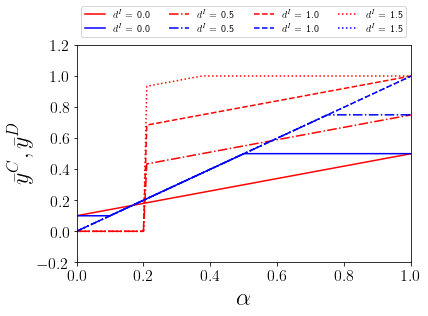

In [76]:
plt.rcParams['text.usetex'] = True

line_styles = ['-', '-.', '--', ':']
# marker_styles = ['o', 'o', '^', '^', 's', 's']

# Find better colors:
for beta_idx, _ in enumerate(beta_vals):
# for beta_idx in [0]:
    plt.plot(alpha_vals, users_el_d1[:, beta_idx], color = 'r', \
             linestyle = line_styles[beta_idx % 4], label = r'$d^I = \ $' \
                 + str(0.0 + beta_incr * beta_idx))
    plt.plot(alpha_vals, users_el_b1[:, beta_idx], color = 'b', \
             linestyle = line_styles[beta_idx % 4], label = r'$d^I = \ $' \
                 + str(0.0 + beta_incr * beta_idx))

plt.xlim([0, 1.0])
plt.ylim([-0.2, 1.2])
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel(r'$\displaystyle \alpha$', fontsize=24)
plt.ylabel(r'$\displaystyle \bar y^C, \bar y^D$', fontsize=24)
plt.legend(bbox_to_anchor=(1.0, 1.2), ncol=4)

In [ ]:
# plt.plot(alpha_vals, y_star_vals_discount, 'red')
# plt.plot(alpha_vals, y_star_vals_budget, 'blue')
# # plt.scatter(alpha_vals, y_star_vals_discount, marker = 'o', s = 0.5, color = 'purple')
# # plt.scatter(alpha_vals, y_star_vals_budget, marker = 'o', s = 0.5, color = 'black')
# plt.xlim([0, 1.0])
# plt.ylim([-0.2, 1.2])

# plt.xticks(fontsize = 16)
# plt.yticks(fontsize = 16)
# plt.xlabel(r'$\displaystyle \alpha$', fontsize=24)
# plt.ylabel(r'$\displaystyle y^C, y^D$', fontsize=24)
# # plt.ylabel(r'$\displaystyle \ln(L^t - L^\star)$', fontsize=16)

## Old code below:

In [ ]:
time_1 = time.time()

theta = np.array([[a_1, b_1], [a_2, b_2]])
T = 5
# toll = 1.0
# budget = 0.25
toll_array = (np.arange(20) + 1)/20
budget_array = (np.arange(20) + 1)*T/20

vot_ineligible = 1
vot_eligible = 1

solution_set_array_d1 = {}
solution_set_array_bpure_1 = {}
solution_set_array_b1 = {}

# Return solution:

for toll_idx, toll in enumerate(toll_array):
    
    solution_set_array_at_toll_d1 = {}
    solution_set_array_at_toll_bpure_1 = {}
    solution_set_array_at_toll_b1 = {}
    
    for budget_idx, budget in enumerate(budget_array):
        
        if budget > toll * T:
            continue
        
        discount_ratio = budget / (toll * T)
        
        print()
        print("Toll:", toll)
        print("Budget:", budget)
        print("Discount Ratio:", discount_ratio)
        print()
        
        solution_set_d1 = m_d1_solve(theta, T, toll, vot_ineligible, vot_eligible, discount_ratio)
        solution_set_bpure_1 = m_bpure_1_solve(theta, T, toll, vot_ineligible, vot_eligible, budget)
        solution_set_b1 = m_bpure_1_solve(theta, T, toll, vot_ineligible, vot_eligible, budget)
        
        solution_set_array_at_toll_d1[budget] = solution_set_d1
        solution_set_array_at_toll_bpure_1[budget] = solution_set_bpure_1
        solution_set_array_at_toll_b1[budget] = solution_set_b1
    
    solution_set_array_d1[toll] = solution_set_array_at_toll_d1
    solution_set_array_bpure_1[toll] = solution_set_array_at_toll_bpure_1
    solution_set_array_b1[toll] = solution_set_array_at_toll_b1

time_2 = time.time()
print("Time: ", time_2 - time_1)

In [ ]:
# Average travel times, discount minus budget:

avg_travel_time_discount_minus_budget = np.zeros((toll_array.shape[0], budget_array.shape[0], 6))
# 0: in
# 1: el
# 2: all
# 3: in (pure)
# 4: el (pure)
# 5: all (pure)

for toll_idx, toll in enumerate(toll_array):    
    for budget_idx, budget in enumerate(budget_array):        
        if budget > toll * T:
            continue
            
#         print("toll:", toll)
#         print("budget:", budget)
#         print()

#         diff_in = avg_travel_times_1(solution_set_array_d1[toll][budget], theta)["users_in"] \
#             - avg_travel_times_1(solution_set_array_bpure_1[toll][budget], theta)["users_in"]
#         diff_el = avg_travel_times_1(solution_set_array_d1[toll][budget], theta)["users_el"] \
#             - avg_travel_times_1(solution_set_array_bpure_1[toll][budget], theta)["users_el"]
#         diff_all = avg_travel_times_1(solution_set_array_d1[toll][budget], theta)["users_all"] \
#             - avg_travel_times_1(solution_set_array_bpure_1[toll][budget], theta)["users_all"]

        diff_in = avg_travel_times_1(solution_set_array_d1[toll][budget], theta)["users_in"] \
            - avg_travel_times_1(solution_set_array_b1[toll][budget], theta)["users_in"]
        diff_el = avg_travel_times_1(solution_set_array_d1[toll][budget], theta)["users_el"] \
            - avg_travel_times_1(solution_set_array_b1[toll][budget], theta)["users_el"]
        diff_all = avg_travel_times_1(solution_set_array_d1[toll][budget], theta)["users_all"] \
            - avg_travel_times_1(solution_set_array_b1[toll][budget], theta)["users_all"]
        
        diff_in_pure = avg_travel_times_1(solution_set_array_d1[toll][budget], theta)["users_in"] \
            - avg_travel_times_1(solution_set_array_bpure_1[toll][budget], theta)["users_in"]
        diff_el_pure = avg_travel_times_1(solution_set_array_d1[toll][budget], theta)["users_el"] \
            - avg_travel_times_1(solution_set_array_bpure_1[toll][budget], theta)["users_el"]
        diff_all_pure = avg_travel_times_1(solution_set_array_d1[toll][budget], theta)["users_all"] \
            - avg_travel_times_1(solution_set_array_bpure_1[toll][budget], theta)["users_all"]
    
        avg_travel_time_discount_minus_budget[toll_idx][budget_idx][0] = diff_in
        avg_travel_time_discount_minus_budget[toll_idx][budget_idx][1] = diff_el
        avg_travel_time_discount_minus_budget[toll_idx][budget_idx][2] = diff_all
        
        avg_travel_time_discount_minus_budget[toll_idx][budget_idx][3] = diff_in_pure
        avg_travel_time_discount_minus_budget[toll_idx][budget_idx][4] = diff_el_pure
        avg_travel_time_discount_minus_budget[toll_idx][budget_idx][5] = diff_all_pure

# avg_travel_time_discount_minus_budget

In [ ]:
print("Users_in:")
print("Max average time difference, discount minus budget, value:", \
          np.max(avg_travel_time_discount_minus_budget[:, :, 0]))
print("Min average time difference, discount minus budget, value:", \
          np.min(avg_travel_time_discount_minus_budget[:, :, 0]))
print()

print("Users_el:")
print("Max average time difference, discount minus budget, value:", \
          np.max(avg_travel_time_discount_minus_budget[:, :, 1]))
print("Min average time difference, discount minus budget, value:", \
          np.min(avg_travel_time_discount_minus_budget[:, :, 1]))
print()

print("Users_all:")
print("Max average time difference, discount minus budget, value:", \
          np.max(avg_travel_time_discount_minus_budget[:, :, 2]))
print("Min average time difference, discount minus budget, value:", \
          np.min(avg_travel_time_discount_minus_budget[:, :, 2]))
print()
print()

print("Users_in (pure):")
print("Max average time difference, discount minus budget, value:", \
          np.max(avg_travel_time_discount_minus_budget[:, :, 3]))
print("Min average time difference, discount minus budget, value:", \
          np.min(avg_travel_time_discount_minus_budget[:, :, 3]))
print()

print("Users_el (pure):")
print("Max average time difference, discount minus budget, value:", \
          np.max(avg_travel_time_discount_minus_budget[:, :, 4]))
print("Min average time difference, discount minus budget, value:", \
          np.min(avg_travel_time_discount_minus_budget[:, :, 4]))
print()

print("Users_all (pure):")
print("Max average time difference, discount minus budget, value:", \
          np.max(avg_travel_time_discount_minus_budget[:, :, 5]))
print("Min average time difference, discount minus budget, value:", \
          np.min(avg_travel_time_discount_minus_budget[:, :, 5]))

In [ ]:
# avg_travel_time_discount_minus_budget[:, :, 2]

In [ ]:
# edge_flows_d1 = solution_set_d1["edge_flows"]
# users_el_d1 = solution_set_d1["users_el"]
# users_in_d1 = solution_set_d1["users_in"]

# edge_flows_bpure_1 = solution_set_bpure_1["edge_flows"]
# users_el_bpure_1 = solution_set_bpure_1["users_el"]
# users_in_bpure_1 = solution_set_bpure_1["users_in"]

# print("edge_flows_d1:\n", edge_flows_d1)
# print()
# print("users_el_d1:\n", users_el_d1)
# print()
# print("users_in_d1:\n", users_in_d1)
# print()

# print()
# print("edge_flows_bpure_1:\n", edge_flows_bpure_1)
# print()
# print("users_el_bpure_1:\n", users_el_bpure_1)
# print()
# print("users_in_bpure_1:\n", users_in_bpure_1)
# print()

# avg_travel_times_d1 = avg_travel_times_1(solution_set_d1, theta)
# avg_travel_times_bpure_1 = avg_travel_times_1(solution_set_bpure_1, theta)

# print()
# print("avg_travel_times_d1:\n", avg_travel_times_d1)
# print()
# print("avg_travel_times_bpure_1:\n", avg_travel_times_bpure_1)
# print()

# From other files:

In [ ]:
# # Solver 2, Discount:

# def OptPL_discount(toll, discount_ratio, T = T, num_eligible = num_eligible, num_ineligible = num_ineligible, 
#             vot_ineligible = vot_ineligible, alpha = bpr_true_alpha, fftt_1 = bpr_true_fftt, 
#               fftt_2 = bpr_true_fftt, c_1 = bpr_true_capacity, c_2 = bpr_true_capacity, 
#              a = const_multiplier, cap_thresh = cap_thresh_multiplier, b_1 = apx_slope, b_2 = apx_slope):
#     """
#     Function to solve convex optimization problem given a particular toll and budget value
#     """
    
#     # Initialize model
#     m1 = gp.Model()
#     # Add variables to model
# #     users_in = m1.addVars(num_ineligible, 3, T, name = 'ineligible_val', lb = 0.0, ub = 2.0)
# #     edge_flows = m1.addVars(2, T, name = 'edge_flows', lb = 0.0, ub = num_ineligible * 2.0)
# #     users_el = m1.addVars(3, T, name = 'eligible_allocation', lb = 0.0, ub = 2.0)
#     # Add variables for piecewise affine approximation
# #     eps_flows = m1.addVars(2, T, name = 'eps_flows', lb = 0.0, ub = num_ineligible * 2.0)
    
# #     # Add variables for piecewise affine approximation
# #     eps_flows = m1.addVars(2, T, name = 'eps_flows', lb = 0.0, ub = num_ineligible * 2.0)
#     users_in = m1.addVars(num_ineligible, 2, T, name = 'ineligible_val', lb = -10000.0, ub = 10000.0)
#     edge_flows = m1.addVars(2, T, name = 'edge_flows', lb = -10000.0, ub = 10000.0)
#     users_el = m1.addVars(2, T, name = 'eligible_allocation', lb = -10000.0, ub = 10000.0)
#     eps_flows = m1.addVars(2, T, name = 'eps_flows', lb = -10000.0, ub = 10000.0)   

#     ## Add constraints to Model 
    
#     # Total edge flow, express and general purpose lanes:
#     m1.addConstrs((edge_flows[j, t] == sum(users_in[i, j, t] for i in range(num_ineligible)) + \
#                   users_el[j, t] for j in range(2) for t in range(T)))
    
#     # Non-negativity of flows, and zero flow for "eligible users in ineligible groups":
#     m1.addConstrs((users_in[i, j, t]>=0 for i in range(num_ineligible) for j in range(2) for t in range(T)))
#     m1.addConstrs((users_el[j, t]>=0 for j in range(2) for t in range(T)))
    
#     # Every eligible and ineligible user is assigned to one of three options: \
#     # (express paying, express with credit, non-express)
#     m1.addConstrs((sum(users_in[i, j, t] for j in range(2)) == 1 for i in range(num_ineligible) for t in range(T)))
#     m1.addConstrs((sum(users_el[j, t] for j in range(2)) == num_eligible for t in range(T)))
        
#     # Piecewise affine approximation:
#     m1.addConstrs((eps_flows[j, t] >= 0 for j in range(2) for t in range(T))) # Must be at least 0
#     m1.addConstrs((eps_flows[0, t] >= edge_flows[0, t] - cap_thresh*c_1 for t in range(T))) # Must be at least flow - capacity
#     m1.addConstrs((eps_flows[1, t] >= edge_flows[1, t] - cap_thresh*c_2 for t in range(T))) # Must be at least flow - capacity
    
    
#     ## To edit below:
#     # Set Objective
#     m1.setObjective(sum( a*fftt_1*(edge_flows[0, t]) + b_1*(eps_flows[0, t]**2)/2  
#                         + a*fftt_2*(edge_flows[1, t]) + b_2*(eps_flows[1, t]**2)/2 
#                         + sum( toll*users_in[i,0,t]/vot_ineligible[i,t] for i in range(num_ineligible))
#                         + sum( (1 - discount_ratio)*toll*users_el[0,t]/vot_eligible[i,t] for i in range(num_eligible))
#         for t in range(T)), GRB.MINIMIZE)
    
#     m1.update()
    
#     return m1

# Scratch Work:

In [ ]:
# m_sample = gp.Model()


# Plotting code (Old, fill_between):

In [ ]:
# x = np.arange(0.0, 2, 0.01)
# y1 = np.sin(2 * np.pi * x)
# y2 = 0.8 * np.sin(4 * np.pi * x)

# fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(6, 6))

# ax1.fill_between(x, y1)
# ax1.set_title('fill between y1 and 0')

In [ ]:
# _, ax = plt.subplots()

# plt.plot(alpha_vals, y_star_vals_discount, 'r')
# plt.plot(alpha_vals, y_star_vals_budget, 'k')
# plt.plot(alpha_vals, alpha_vals, 'k')
# plt.xlim([0, 1])
# plt.ylim([0, 1.2])
# # axe.Axes.fill_between(alpha_vals, y_star_vals_budget, y_star_vals_discount)
# # axe.Axes.fill_between(alpha_vals, y_star_vals_budget, 1)
# ax.fill_between(alpha_vals, y_star_vals_budget, alpha_vals, color = 'k')